In [4]:
import os
import torch
import pandas as pd
import h5py
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import SimpleITK as sitk

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()



In [5]:
Comp = 'Poli'
if Comp == 'FabioPC':
    df = pd.read_csv('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_TOT_1_10_2020.csv')
else:
    df = pd.read_csv('D:/ADNI/Dati/ADNI1_T1_2_11_2020.csv')

In [6]:
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,63898,941_S_1363,MCI,F,70,1,MRI,MPR; GradWarp; B1 Correction,Processed,3/12/2007,NiFTI,NaN
1,63899,941_S_1363,MCI,F,70,1,MRI,MPR; GradWarp,Processed,3/12/2007,NiFTI,NaN
2,63900,941_S_1363,MCI,F,70,1,MRI,MPR-R; GradWarp; B1 Correction; Mask,Processed,3/12/2007,NiFTI,NaN
3,63901,941_S_1363,MCI,F,70,1,MRI,MPR-R; GradWarp; B1 Correction; N3,Processed,3/12/2007,NiFTI,NaN
4,63902,941_S_1363,MCI,F,70,1,MRI,MPR-R; GradWarp; B1 Correction,Processed,3/12/2007,NiFTI,NaN


In [7]:
interpolator = sitk.sitkLinear
default_value = 0
print('*Translation Transform*')
transform = sitk.TranslationTransform(3)

*Translation Transform*


In [8]:
if Comp == 'FabioPC':
    IMG_Folder = '/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_Prova/'
else:
    IMG_Folder = 'D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/'

In [9]:
dati_img = os.listdir(IMG_Folder)
cwd = os.getcwd()

In [10]:
cwd

'D:\\Alzheimer\\ADNI\\LeNet5_CNN'

In [26]:
dati_img[424]

'registrata_ADNI_052_S_1346_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727115157792_S28024_I62298.nii'

In [12]:
if Comp == 'FabioPC':
    dati_img[2].split('_')[1:4]
else:
    dati_img[2].split('_')[2:5]

In [13]:
if Comp == 'FabioPC':
    ID = '_'.join(dati_img[2].split('_')[1:4])
else:
    ID = '_'.join(dati_img[2].split('_')[2:5])

In [14]:
ID

'002_S_0295'

In [15]:
df.loc[df['Subject'] == ID]['Modality'].values[0]

'MRI'

In [16]:
reference_image = sitk.ReadImage(IMG_Folder + dati_img[1])

RuntimeError: Exception thrown in SimpleITK ReadImage: C:\Users\dashboard\Miniconda3\conda-bld\simpleitk_1546533074085\work\Code\IO\src\sitkImageReaderBase.cxx:104:
sitk::ERROR: Unable to open "D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette" for reading.

In [17]:
img_tot = []
y = []
try:
    os.makedirs('ADNI1_PROC')
except:
    print("Already Created")
count_AD = 0
count_CN = 0
count_MCI = 0
for data_img in tqdm(dati_img[2:]):
    if 'nii' in str(data_img):
        sitk_t1 = sitk.ReadImage(IMG_Folder + data_img)
        #print(sitk_t1.GetDirection())
        #t2 = sitk.Resample(sitk_t1, reference_image, transform,interpolator, default_value)
        t1 = sitk.GetArrayFromImage(sitk_t1)
        
        print()
        if Comp == 'FabioPC':
            Subject = df.loc[df['Subject'] == '_'.join(data_img.split('_')[1:4])]['Group'].values[0]
            Subject_txt = df.loc[df['Subject'] == '_'.join(data_img.split('_')[1:4])]['Group']
            print(Subject_txt)
        else:
            Subject = df.loc[df['Subject'] == '_'.join(data_img.split('_')[2:5])]['Group'].values[0]
            Subject_txt = df.loc[df['Subject'] == '_'.join(data_img.split('_')[2:5])]['Group']
            print(Subject_txt)
        print(Subject)
        if Subject=='CN':
            count_CN += 1
        else:
            if Subject=='AD':
                count_AD +=1
            else:
                count_MCI +=1
        # Seleziono solamente 200 MCI per bilanciare le classi
        if (Subject == 'MCI') and (count_MCI <200):
            img_tot.append(t1)
            y.append(Subject)
        if (Subject in ['AD', 'CN']):
            img_tot.append(t1)
            y.append(Subject)
        #sitk.WriteImage(t2,'ADNI1_PROC/'+ str(data_img))

        print(t1.shape)

Already Created


  0%|                                                                                          | 0/823 [00:00<?, ?it/s]


8892    CN
8893    CN
8894    CN
8895    CN
8896    CN
8897    CN
8898    CN
8899    CN
8900    CN
8901    CN
8902    CN
8903    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  0%|                                                                                  | 1/823 [00:00<06:06,  2.24it/s]


8874    CN
8875    CN
8876    CN
8877    CN
8878    CN
8879    CN
8880    CN
8881    CN
8882    CN
8883    CN
8884    CN
8885    CN
8886    CN
8887    CN
8888    CN
8889    CN
8890    CN
8891    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  0%|▏                                                                                 | 2/823 [00:00<05:56,  2.30it/s]


8856    CN
8857    CN
8858    CN
8859    CN
8860    CN
8861    CN
8862    CN
8863    CN
8864    CN
8865    CN
8866    CN
8867    CN
8868    CN
8869    CN
8870    CN
8871    CN
8872    CN
8873    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  0%|▎                                                                                 | 3/823 [00:01<05:44,  2.38it/s]


8839    CN
8840    CN
8841    CN
8842    CN
8843    CN
8844    CN
8845    CN
8846    CN
8847    CN
8848    CN
8849    CN
8850    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  0%|▍                                                                                 | 4/823 [00:01<05:44,  2.38it/s]


8823    MCI
8824    MCI
8825    MCI
8826    MCI
8827    MCI
8828    MCI
8829    MCI
8830    MCI
8831    MCI
8832    MCI
8833    MCI
8834    MCI
8835    MCI
8836    MCI
8837    MCI
8838    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  1%|▍                                                                                 | 5/823 [00:02<05:39,  2.41it/s]


8811    MCI
8812    MCI
8813    MCI
8814    MCI
8815    MCI
8816    MCI
8817    MCI
8818    MCI
8819    MCI
8820    MCI
8821    MCI
8822    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  1%|▌                                                                                 | 6/823 [00:02<05:39,  2.41it/s]


8795    AD
8796    AD
8797    AD
8798    AD
8799    AD
8800    AD
8801    AD
8802    AD
8803    AD
8804    AD
8805    AD
8806    AD
8807    AD
8808    AD
8809    AD
8810    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  1%|▋                                                                                 | 7/823 [00:02<05:35,  2.43it/s]


8783    AD
8784    AD
8785    AD
8786    AD
8787    AD
8788    AD
8789    AD
8790    AD
8791    AD
8792    AD
8793    AD
8794    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  1%|▊                                                                                 | 8/823 [00:03<05:32,  2.45it/s]


8767    MCI
8768    MCI
8769    MCI
8770    MCI
8771    MCI
8772    MCI
8773    MCI
8774    MCI
8775    MCI
8776    MCI
8777    MCI
8778    MCI
8779    MCI
8780    MCI
8781    MCI
8782    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  1%|▉                                                                                 | 9/823 [00:03<05:38,  2.41it/s]


8757    AD
8758    AD
8759    AD
8760    AD
8761    AD
8762    AD
8763    AD
8764    AD
8765    AD
8766    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  1%|▉                                                                                | 10/823 [00:04<05:35,  2.43it/s]


8743    AD
8744    AD
8745    AD
8746    AD
8747    AD
8748    AD
8749    AD
8750    AD
8751    AD
8752    AD
8753    AD
8754    AD
8755    AD
8756    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  1%|█                                                                                | 11/823 [00:04<05:32,  2.44it/s]


8729    MCI
8730    MCI
8731    MCI
8732    MCI
8733    MCI
8734    MCI
8735    MCI
8736    MCI
8737    MCI
8738    MCI
8739    MCI
8740    MCI
8741    MCI
8742    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  1%|█▏                                                                               | 12/823 [00:04<05:26,  2.49it/s]


8720    MCI
8721    MCI
8722    MCI
8723    MCI
8724    MCI
8725    MCI
8726    MCI
8727    MCI
8728    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  2%|█▎                                                                               | 13/823 [00:05<05:35,  2.41it/s]


8704    CN
8705    CN
8706    CN
8707    CN
8708    CN
8709    CN
8710    CN
8711    CN
8712    CN
8713    CN
8714    CN
8715    CN
8716    CN
8717    CN
8718    CN
8719    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  2%|█▍                                                                               | 14/823 [00:05<05:37,  2.39it/s]


8687    MCI
8688    MCI
8689    MCI
8690    MCI
8691    MCI
8692    MCI
8693    MCI
8694    MCI
8695    MCI
8696    MCI
8697    MCI
8698    MCI
8699    MCI
8700    MCI
8701    MCI
8702    MCI
8703    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  2%|█▍                                                                               | 15/823 [00:06<05:33,  2.42it/s]


8670    CN
8671    CN
8672    CN
8673    CN
8674    CN
8675    CN
8676    CN
8677    CN
8678    CN
8679    CN
8680    CN
8681    CN
8682    CN
8683    CN
8684    CN
8685    CN
8686    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  2%|█▌                                                                               | 16/823 [00:06<05:36,  2.40it/s]


8659    CN
8660    CN
8661    CN
8662    CN
8663    CN
8664    CN
8665    CN
8666    CN
8667    CN
8668    CN
8669    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  2%|█▋                                                                               | 17/823 [00:06<05:27,  2.46it/s]


8646    MCI
8647    MCI
8648    MCI
8649    MCI
8650    MCI
8651    MCI
8652    MCI
8653    MCI
8654    MCI
8655    MCI
8656    MCI
8657    MCI
8658    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  2%|█▊                                                                               | 18/823 [00:07<05:31,  2.43it/s]


8635    CN
8636    CN
8637    CN
8638    CN
8639    CN
8640    CN
8641    CN
8642    CN
8643    CN
8644    CN
8645    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  2%|█▊                                                                               | 19/823 [00:07<05:26,  2.47it/s]


8626    CN
8627    CN
8628    CN
8629    CN
8630    CN
8631    CN
8632    CN
8633    CN
8634    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  2%|█▉                                                                               | 20/823 [00:08<05:25,  2.47it/s]


8617    CN
8618    CN
8619    CN
8620    CN
8621    CN
8622    CN
8623    CN
8624    CN
8625    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  3%|██                                                                               | 21/823 [00:08<05:30,  2.42it/s]


8606    MCI
8607    MCI
8608    MCI
8609    MCI
8610    MCI
8611    MCI
8612    MCI
8613    MCI
8614    MCI
8615    MCI
8616    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  3%|██▏                                                                              | 22/823 [00:09<05:28,  2.44it/s]


8595    AD
8596    AD
8597    AD
8598    AD
8599    AD
8600    AD
8601    AD
8602    AD
8603    AD
8604    AD
8605    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  3%|██▎                                                                              | 23/823 [00:09<05:39,  2.36it/s]


8584    MCI
8585    MCI
8586    MCI
8587    MCI
8588    MCI
8589    MCI
8590    MCI
8591    MCI
8592    MCI
8593    MCI
8594    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  3%|██▎                                                                              | 24/823 [00:09<05:35,  2.38it/s]


8569    MCI
8570    MCI
8571    MCI
8572    MCI
8573    MCI
8574    MCI
8575    MCI
8576    MCI
8577    MCI
8578    MCI
8579    MCI
8580    MCI
8581    MCI
8582    MCI
8583    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  3%|██▍                                                                              | 25/823 [00:10<05:29,  2.43it/s]


8558    AD
8559    AD
8560    AD
8561    AD
8562    AD
8563    AD
8564    AD
8565    AD
8566    AD
8567    AD
8568    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  3%|██▌                                                                              | 26/823 [00:10<05:22,  2.47it/s]


8543    AD
8544    AD
8545    AD
8546    AD
8547    AD
8548    AD
8549    AD
8550    AD
8551    AD
8552    AD
8553    AD
8554    AD
8555    AD
8556    AD
8557    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  3%|██▋                                                                              | 27/823 [00:11<05:31,  2.40it/s]


8532    MCI
8533    MCI
8534    MCI
8535    MCI
8536    MCI
8537    MCI
8538    MCI
8539    MCI
8540    MCI
8541    MCI
8542    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  3%|██▊                                                                              | 28/823 [00:11<05:27,  2.43it/s]


8523    CN
8524    CN
8525    CN
8526    CN
8527    CN
8528    CN
8529    CN
8530    CN
8531    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  4%|██▊                                                                              | 29/823 [00:11<05:26,  2.43it/s]


8505    MCI
8506    MCI
8507    MCI
8508    MCI
8509    MCI
8510    MCI
8511    MCI
8512    MCI
8513    MCI
8514    MCI
8515    MCI
8516    MCI
8517    MCI
8518    MCI
8519    MCI
8520    MCI
8521    MCI
8522    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  4%|██▉                                                                              | 30/823 [00:12<05:29,  2.41it/s]


8487    MCI
8488    MCI
8489    MCI
8490    MCI
8491    MCI
8492    MCI
8493    MCI
8494    MCI
8495    MCI
8496    MCI
8497    MCI
8498    MCI
8499    MCI
8500    MCI
8501    MCI
8502    MCI
8503    MCI
8504    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  4%|███                                                                              | 31/823 [00:12<05:27,  2.42it/s]


8478    MCI
8479    MCI
8480    MCI
8481    MCI
8482    MCI
8483    MCI
8484    MCI
8485    MCI
8486    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  4%|███▏                                                                             | 32/823 [00:13<05:24,  2.44it/s]


8460    CN
8461    CN
8462    CN
8463    CN
8464    CN
8465    CN
8466    CN
8467    CN
8468    CN
8469    CN
8470    CN
8471    CN
8472    CN
8473    CN
8474    CN
8475    CN
8476    CN
8477    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  4%|███▏                                                                             | 33/823 [00:13<05:25,  2.43it/s]


8442    MCI
8443    MCI
8444    MCI
8445    MCI
8446    MCI
8447    MCI
8448    MCI
8449    MCI
8450    MCI
8451    MCI
8452    MCI
8453    MCI
8454    MCI
8455    MCI
8456    MCI
8457    MCI
8458    MCI
8459    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  4%|███▎                                                                             | 34/823 [00:14<05:25,  2.42it/s]


8424    CN
8425    CN
8426    CN
8427    CN
8428    CN
8429    CN
8430    CN
8431    CN
8432    CN
8433    CN
8434    CN
8435    CN
8436    CN
8437    CN
8438    CN
8439    CN
8440    CN
8441    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  4%|███▍                                                                             | 35/823 [00:14<05:25,  2.42it/s]


8415    CN
8416    CN
8417    CN
8418    CN
8419    CN
8420    CN
8421    CN
8422    CN
8423    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  4%|███▌                                                                             | 36/823 [00:14<05:27,  2.40it/s]


8397    AD
8398    AD
8399    AD
8400    AD
8401    AD
8402    AD
8403    AD
8404    AD
8405    AD
8406    AD
8407    AD
8408    AD
8409    AD
8410    AD
8411    AD
8412    AD
8413    AD
8414    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  4%|███▋                                                                             | 37/823 [00:15<05:29,  2.39it/s]


8388    AD
8389    AD
8390    AD
8391    AD
8392    AD
8393    AD
8394    AD
8395    AD
8396    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  5%|███▋                                                                             | 38/823 [00:15<05:32,  2.36it/s]


8378    MCI
8379    MCI
8380    MCI
8381    MCI
8382    MCI
8383    MCI
8384    MCI
8385    MCI
8386    MCI
8387    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  5%|███▊                                                                             | 39/823 [00:16<05:26,  2.40it/s]


8366    AD
8367    AD
8368    AD
8369    AD
8370    AD
8371    AD
8372    AD
8373    AD
8374    AD
8375    AD
8376    AD
8377    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  5%|███▉                                                                             | 40/823 [00:16<05:26,  2.39it/s]


8355    MCI
8356    MCI
8357    MCI
8358    MCI
8359    MCI
8360    MCI
8361    MCI
8362    MCI
8363    MCI
8364    MCI
8365    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  5%|████                                                                             | 41/823 [00:16<05:22,  2.43it/s]


8346    CN
8347    CN
8348    CN
8349    CN
8350    CN
8351    CN
8352    CN
8353    CN
8354    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  5%|████▏                                                                            | 42/823 [00:17<05:19,  2.44it/s]


8332    CN
8333    CN
8334    CN
8335    CN
8336    CN
8337    CN
8338    CN
8339    CN
8340    CN
8341    CN
8342    CN
8343    CN
8344    CN
8345    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  5%|████▏                                                                            | 43/823 [00:17<05:16,  2.46it/s]


8319    MCI
8320    MCI
8321    MCI
8322    MCI
8323    MCI
8324    MCI
8325    MCI
8326    MCI
8327    MCI
8328    MCI
8329    MCI
8330    MCI
8331    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  5%|████▎                                                                            | 44/823 [00:18<05:17,  2.46it/s]


8301    AD
8302    AD
8303    AD
8304    AD
8305    AD
8306    AD
8307    AD
8308    AD
8309    AD
8310    AD
8311    AD
8312    AD
8313    AD
8314    AD
8315    AD
8316    AD
8317    AD
8318    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  5%|████▍                                                                            | 45/823 [00:18<05:22,  2.41it/s]


8283    AD
8284    AD
8285    AD
8286    AD
8287    AD
8288    AD
8289    AD
8290    AD
8291    AD
8292    AD
8293    AD
8294    AD
8295    AD
8296    AD
8297    AD
8298    AD
8299    AD
8300    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  6%|████▌                                                                            | 46/823 [00:18<05:23,  2.41it/s]


8274    MCI
8275    MCI
8276    MCI
8277    MCI
8278    MCI
8279    MCI
8280    MCI
8281    MCI
8282    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  6%|████▋                                                                            | 47/823 [00:19<05:19,  2.43it/s]


8265    CN
8266    CN
8267    CN
8268    CN
8269    CN
8270    CN
8271    CN
8272    CN
8273    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  6%|████▋                                                                            | 48/823 [00:19<05:16,  2.45it/s]


8256    CN
8257    CN
8258    CN
8259    CN
8260    CN
8261    CN
8262    CN
8263    CN
8264    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  6%|████▊                                                                            | 49/823 [00:20<05:18,  2.43it/s]


8247    MCI
8248    MCI
8249    MCI
8250    MCI
8251    MCI
8252    MCI
8253    MCI
8254    MCI
8255    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  6%|████▉                                                                            | 50/823 [00:20<05:17,  2.44it/s]


8237    MCI
8238    MCI
8239    MCI
8240    MCI
8241    MCI
8242    MCI
8243    MCI
8244    MCI
8245    MCI
8246    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  6%|█████                                                                            | 51/823 [00:21<05:15,  2.44it/s]


8227    CN
8228    CN
8229    CN
8230    CN
8231    CN
8232    CN
8233    CN
8234    CN
8235    CN
8236    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  6%|█████                                                                            | 52/823 [00:21<05:17,  2.43it/s]


8217    CN
8218    CN
8219    CN
8220    CN
8221    CN
8222    CN
8223    CN
8224    CN
8225    CN
8226    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  6%|█████▏                                                                           | 53/823 [00:21<05:13,  2.46it/s]


8205    MCI
8206    MCI
8207    MCI
8208    MCI
8209    MCI
8210    MCI
8211    MCI
8212    MCI
8213    MCI
8214    MCI
8215    MCI
8216    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  7%|█████▎                                                                           | 54/823 [00:22<05:18,  2.41it/s]


8193    MCI
8194    MCI
8195    MCI
8196    MCI
8197    MCI
8198    MCI
8199    MCI
8200    MCI
8201    MCI
8202    MCI
8203    MCI
8204    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  7%|█████▍                                                                           | 55/823 [00:22<05:13,  2.45it/s]


8183    MCI
8184    MCI
8185    MCI
8186    MCI
8187    MCI
8188    MCI
8189    MCI
8190    MCI
8191    MCI
8192    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  7%|█████▌                                                                           | 56/823 [00:23<05:12,  2.45it/s]


8173    MCI
8174    MCI
8175    MCI
8176    MCI
8177    MCI
8178    MCI
8179    MCI
8180    MCI
8181    MCI
8182    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  7%|█████▌                                                                           | 57/823 [00:23<05:16,  2.42it/s]


8163    AD
8164    AD
8165    AD
8166    AD
8167    AD
8168    AD
8169    AD
8170    AD
8171    AD
8172    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  7%|█████▋                                                                           | 58/823 [00:23<05:13,  2.44it/s]


8153    MCI
8154    MCI
8155    MCI
8156    MCI
8157    MCI
8158    MCI
8159    MCI
8160    MCI
8161    MCI
8162    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  7%|█████▊                                                                           | 59/823 [00:24<05:11,  2.45it/s]


8143    MCI
8144    MCI
8145    MCI
8146    MCI
8147    MCI
8148    MCI
8149    MCI
8150    MCI
8151    MCI
8152    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  7%|█████▉                                                                           | 60/823 [00:24<05:11,  2.45it/s]


8133    MCI
8134    MCI
8135    MCI
8136    MCI
8137    MCI
8138    MCI
8139    MCI
8140    MCI
8141    MCI
8142    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  7%|██████                                                                           | 61/823 [00:25<05:15,  2.42it/s]


8115    CN
8116    CN
8117    CN
8118    CN
8119    CN
8120    CN
8121    CN
8122    CN
8123    CN
8124    CN
8125    CN
8126    CN
8127    CN
8128    CN
8129    CN
8130    CN
8131    CN
8132    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  8%|██████                                                                           | 62/823 [00:25<05:19,  2.38it/s]


8097    CN
8098    CN
8099    CN
8100    CN
8101    CN
8102    CN
8103    CN
8104    CN
8105    CN
8106    CN
8107    CN
8108    CN
8109    CN
8110    CN
8111    CN
8112    CN
8113    CN
8114    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  8%|██████▏                                                                          | 63/823 [00:25<05:17,  2.39it/s]


8088    AD
8089    AD
8090    AD
8091    AD
8092    AD
8093    AD
8094    AD
8095    AD
8096    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  8%|██████▎                                                                          | 64/823 [00:26<05:11,  2.43it/s]


8070    AD
8071    AD
8072    AD
8073    AD
8074    AD
8075    AD
8076    AD
8077    AD
8078    AD
8079    AD
8080    AD
8081    AD
8082    AD
8083    AD
8084    AD
8085    AD
8086    AD
8087    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  8%|██████▍                                                                          | 65/823 [00:26<05:06,  2.47it/s]


8061    AD
8062    AD
8063    AD
8064    AD
8065    AD
8066    AD
8067    AD
8068    AD
8069    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  8%|██████▍                                                                          | 66/823 [00:27<05:02,  2.50it/s]


8054    CN
8055    CN
8056    CN
8057    CN
8058    CN
8059    CN
8060    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  8%|██████▌                                                                          | 67/823 [00:27<05:01,  2.51it/s]


8045    CN
8046    CN
8047    CN
8048    CN
8049    CN
8050    CN
8051    CN
8052    CN
8053    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  8%|██████▋                                                                          | 68/823 [00:27<05:01,  2.50it/s]


8033    CN
8034    CN
8035    CN
8036    CN
8037    CN
8038    CN
8039    CN
8040    CN
8041    CN
8042    CN
8043    CN
8044    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  8%|██████▊                                                                          | 69/823 [00:28<05:01,  2.50it/s]


8021    MCI
8022    MCI
8023    MCI
8024    MCI
8025    MCI
8026    MCI
8027    MCI
8028    MCI
8029    MCI
8030    MCI
8031    MCI
8032    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  9%|██████▉                                                                          | 70/823 [00:28<05:00,  2.51it/s]


8011    MCI
8012    MCI
8013    MCI
8014    MCI
8015    MCI
8016    MCI
8017    MCI
8018    MCI
8019    MCI
8020    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  9%|██████▉                                                                          | 71/823 [00:29<05:09,  2.43it/s]


7990    AD
7991    AD
7992    AD
7993    AD
7994    AD
7995    AD
7996    AD
7997    AD
7998    AD
7999    AD
8000    AD
Name: Group, dtype: object
AD
(166, 256, 256)


  9%|███████                                                                          | 72/823 [00:29<05:11,  2.41it/s]


7982    CN
7983    CN
7984    CN
7985    CN
7986    CN
7987    CN
7988    CN
7989    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  9%|███████▏                                                                         | 73/823 [00:30<05:09,  2.42it/s]


7976    MCI
7977    MCI
7978    MCI
7979    MCI
7980    MCI
7981    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  9%|███████▎                                                                         | 74/823 [00:30<05:08,  2.43it/s]


7968    CN
7969    CN
7970    CN
7971    CN
7972    CN
7973    CN
7974    CN
7975    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  9%|███████▍                                                                         | 75/823 [00:30<05:05,  2.45it/s]


7962    CN
7963    CN
7964    CN
7965    CN
7966    CN
7967    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  9%|███████▍                                                                         | 76/823 [00:31<05:04,  2.45it/s]


7950    MCI
7951    MCI
7952    MCI
7953    MCI
7954    MCI
7955    MCI
7956    MCI
7957    MCI
7958    MCI
7959    MCI
7960    MCI
7961    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


  9%|███████▌                                                                         | 77/823 [00:31<05:03,  2.46it/s]


7938    CN
7939    CN
7940    CN
7941    CN
7942    CN
7943    CN
7944    CN
7945    CN
7946    CN
7947    CN
7948    CN
7949    CN
Name: Group, dtype: object
CN
(166, 256, 256)


  9%|███████▋                                                                         | 78/823 [00:32<05:05,  2.44it/s]


7932    MCI
7933    MCI
7934    MCI
7935    MCI
7936    MCI
7937    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 10%|███████▊                                                                         | 79/823 [00:32<05:02,  2.46it/s]


7926    AD
7927    AD
7928    AD
7929    AD
7930    AD
7931    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 10%|███████▊                                                                         | 80/823 [00:32<05:00,  2.47it/s]


7921    MCI
7922    MCI
7923    MCI
7924    MCI
7925    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 10%|███████▉                                                                         | 81/823 [00:33<05:05,  2.43it/s]


7914    AD
7915    AD
7916    AD
7917    AD
7918    AD
7919    AD
7920    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 10%|████████                                                                         | 82/823 [00:33<05:06,  2.42it/s]


7908    MCI
7909    MCI
7910    MCI
7911    MCI
7912    MCI
7913    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 10%|████████▏                                                                        | 83/823 [00:34<05:12,  2.37it/s]


7897    CN
7898    CN
7899    CN
7900    CN
7901    CN
7902    CN
7903    CN
7904    CN
7905    CN
7906    CN
7907    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 10%|████████▎                                                                        | 84/823 [00:34<05:09,  2.39it/s]


7888    AD
7889    AD
7890    AD
7891    AD
7892    AD
7893    AD
7894    AD
7895    AD
7896    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 10%|████████▎                                                                        | 85/823 [00:34<05:08,  2.40it/s]


7877    CN
7878    CN
7879    CN
7880    CN
7881    CN
7882    CN
7883    CN
7884    CN
7885    CN
7886    CN
7887    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 10%|████████▍                                                                        | 86/823 [00:35<05:11,  2.37it/s]


7868    CN
7869    CN
7870    CN
7871    CN
7872    CN
7873    CN
7874    CN
7875    CN
7876    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 11%|████████▌                                                                        | 87/823 [00:35<05:09,  2.38it/s]


7857    AD
7858    AD
7859    AD
7860    AD
7861    AD
7862    AD
7863    AD
7864    AD
7865    AD
7866    AD
7867    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 11%|████████▋                                                                        | 88/823 [00:36<05:08,  2.38it/s]


7846    CN
7847    CN
7848    CN
7849    CN
7850    CN
7851    CN
7852    CN
7853    CN
7854    CN
7855    CN
7856    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 11%|████████▊                                                                        | 89/823 [00:36<05:04,  2.41it/s]


7837    CN
7838    CN
7839    CN
7840    CN
7841    CN
7842    CN
7843    CN
7844    CN
7845    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 11%|████████▊                                                                        | 90/823 [00:37<04:58,  2.45it/s]


7828    CN
7829    CN
7830    CN
7831    CN
7832    CN
7833    CN
7834    CN
7835    CN
7836    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 11%|████████▉                                                                        | 91/823 [00:37<04:56,  2.47it/s]


7818    CN
7819    CN
7820    CN
7821    CN
7822    CN
7823    CN
7824    CN
7825    CN
7826    CN
7827    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 11%|█████████                                                                        | 92/823 [00:37<04:54,  2.48it/s]


7809    AD
7810    AD
7811    AD
7812    AD
7813    AD
7814    AD
7815    AD
7816    AD
7817    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 11%|█████████▏                                                                       | 93/823 [00:38<04:54,  2.48it/s]


7800    MCI
7801    MCI
7802    MCI
7803    MCI
7804    MCI
7805    MCI
7806    MCI
7807    MCI
7808    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 11%|█████████▎                                                                       | 94/823 [00:38<04:50,  2.51it/s]


7791    AD
7792    AD
7793    AD
7794    AD
7795    AD
7796    AD
7797    AD
7798    AD
7799    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 12%|█████████▎                                                                       | 95/823 [00:39<04:55,  2.47it/s]


7780    MCI
7781    MCI
7782    MCI
7783    MCI
7784    MCI
7785    MCI
7786    MCI
7787    MCI
7788    MCI
7789    MCI
7790    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 12%|█████████▍                                                                       | 96/823 [00:39<04:56,  2.45it/s]


7771    MCI
7772    MCI
7773    MCI
7774    MCI
7775    MCI
7776    MCI
7777    MCI
7778    MCI
7779    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 12%|█████████▌                                                                       | 97/823 [00:39<04:56,  2.45it/s]


7762    MCI
7763    MCI
7764    MCI
7765    MCI
7766    MCI
7767    MCI
7768    MCI
7769    MCI
7770    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 12%|█████████▋                                                                       | 98/823 [00:40<04:58,  2.43it/s]


7751    MCI
7752    MCI
7753    MCI
7754    MCI
7755    MCI
7756    MCI
7757    MCI
7758    MCI
7759    MCI
7760    MCI
7761    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 12%|█████████▋                                                                       | 99/823 [00:40<05:00,  2.41it/s]


7742    MCI
7743    MCI
7744    MCI
7745    MCI
7746    MCI
7747    MCI
7748    MCI
7749    MCI
7750    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 12%|█████████▋                                                                      | 100/823 [00:41<05:03,  2.38it/s]


7733    MCI
7734    MCI
7735    MCI
7736    MCI
7737    MCI
7738    MCI
7739    MCI
7740    MCI
7741    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 12%|█████████▊                                                                      | 101/823 [00:41<05:02,  2.39it/s]


7723    MCI
7724    MCI
7725    MCI
7726    MCI
7727    MCI
7728    MCI
7729    MCI
7730    MCI
7731    MCI
7732    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 12%|█████████▉                                                                      | 102/823 [00:41<05:00,  2.40it/s]


7716    MCI
7717    MCI
7718    MCI
7719    MCI
7720    MCI
7721    MCI
7722    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 13%|██████████                                                                      | 103/823 [00:42<04:55,  2.44it/s]


7708    CN
7709    CN
7710    CN
7711    CN
7712    CN
7713    CN
7714    CN
7715    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 13%|██████████                                                                      | 104/823 [00:42<04:52,  2.46it/s]


7696    AD
7697    AD
7698    AD
7699    AD
7700    AD
7701    AD
7702    AD
7703    AD
7704    AD
7705    AD
7706    AD
7707    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 13%|██████████▏                                                                     | 105/823 [00:43<04:52,  2.45it/s]


7690    AD
7691    AD
7692    AD
7693    AD
7694    AD
7695    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 13%|██████████▎                                                                     | 106/823 [00:43<04:52,  2.45it/s]


7684    AD
7685    AD
7686    AD
7687    AD
7688    AD
7689    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 13%|██████████▍                                                                     | 107/823 [00:44<04:56,  2.42it/s]


7678    AD
7679    AD
7680    AD
7681    AD
7682    AD
7683    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 13%|██████████▍                                                                     | 108/823 [00:44<04:57,  2.41it/s]


7672    MCI
7673    MCI
7674    MCI
7675    MCI
7676    MCI
7677    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 13%|██████████▌                                                                     | 109/823 [00:44<04:56,  2.41it/s]


7666    MCI
7667    MCI
7668    MCI
7669    MCI
7670    MCI
7671    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 13%|██████████▋                                                                     | 110/823 [00:45<04:59,  2.38it/s]


7655    CN
7656    CN
7657    CN
7658    CN
7659    CN
7660    CN
7661    CN
7662    CN
7663    CN
7664    CN
7665    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 13%|██████████▊                                                                     | 111/823 [00:45<04:59,  2.37it/s]


7649    MCI
7650    MCI
7651    MCI
7652    MCI
7653    MCI
7654    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 14%|██████████▉                                                                     | 112/823 [00:46<05:01,  2.36it/s]


7643    CN
7644    CN
7645    CN
7646    CN
7647    CN
7648    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 14%|██████████▉                                                                     | 113/823 [00:46<05:02,  2.35it/s]


7637    MCI
7638    MCI
7639    MCI
7640    MCI
7641    MCI
7642    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 14%|███████████                                                                     | 114/823 [00:46<04:59,  2.37it/s]


7631    MCI
7632    MCI
7633    MCI
7634    MCI
7635    MCI
7636    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 14%|███████████▏                                                                    | 115/823 [00:47<05:00,  2.36it/s]


7620    CN
7621    CN
7622    CN
7623    CN
7624    CN
7625    CN
7626    CN
7627    CN
7628    CN
7629    CN
7630    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 14%|███████████▎                                                                    | 116/823 [00:47<04:54,  2.40it/s]


7609    MCI
7610    MCI
7611    MCI
7612    MCI
7613    MCI
7614    MCI
7615    MCI
7616    MCI
7617    MCI
7618    MCI
7619    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 14%|███████████▎                                                                    | 117/823 [00:48<04:52,  2.41it/s]


7597    MCI
7598    MCI
7599    MCI
7600    MCI
7601    MCI
7602    MCI
7603    MCI
7604    MCI
7605    MCI
7606    MCI
7607    MCI
7608    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 14%|███████████▍                                                                    | 118/823 [00:48<04:53,  2.41it/s]


7588    MCI
7589    MCI
7590    MCI
7591    MCI
7592    MCI
7593    MCI
7594    MCI
7595    MCI
7596    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 14%|███████████▌                                                                    | 119/823 [00:49<04:49,  2.43it/s]


7579    MCI
7580    MCI
7581    MCI
7582    MCI
7583    MCI
7584    MCI
7585    MCI
7586    MCI
7587    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 15%|███████████▋                                                                    | 120/823 [00:49<04:57,  2.36it/s]


7570    CN
7571    CN
7572    CN
7573    CN
7574    CN
7575    CN
7576    CN
7577    CN
7578    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 15%|███████████▊                                                                    | 121/823 [00:49<04:50,  2.42it/s]


7561    CN
7562    CN
7563    CN
7564    CN
7565    CN
7566    CN
7567    CN
7568    CN
7569    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 15%|███████████▊                                                                    | 122/823 [00:50<04:53,  2.39it/s]


7550    AD
7551    AD
7552    AD
7553    AD
7554    AD
7555    AD
7556    AD
7557    AD
7558    AD
7559    AD
7560    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 15%|███████████▉                                                                    | 123/823 [00:50<04:48,  2.42it/s]


7540    AD
7541    AD
7542    AD
7543    AD
7544    AD
7545    AD
7546    AD
7547    AD
7548    AD
7549    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 15%|████████████                                                                    | 124/823 [00:51<04:49,  2.42it/s]


7531    MCI
7532    MCI
7533    MCI
7534    MCI
7535    MCI
7536    MCI
7537    MCI
7538    MCI
7539    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 15%|████████████▏                                                                   | 125/823 [00:51<04:51,  2.40it/s]


7509    AD
7510    AD
7511    AD
7512    AD
7513    AD
7514    AD
7515    AD
7516    AD
7517    AD
7518    AD
7519    AD
7520    AD
7521    AD
7522    AD
7523    AD
7524    AD
7525    AD
7526    AD
7527    AD
7528    AD
7529    AD
7530    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 15%|████████████▏                                                                   | 126/823 [00:51<04:44,  2.45it/s]


7493    CN
7494    CN
7495    CN
7496    CN
7497    CN
7498    CN
7499    CN
7500    CN
7501    CN
7502    CN
7503    CN
7504    CN
7505    CN
7506    CN
7507    CN
7508    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 15%|████████████▎                                                                   | 127/823 [00:52<04:44,  2.45it/s]


7484    MCI
7485    MCI
7486    MCI
7487    MCI
7488    MCI
7489    MCI
7490    MCI
7491    MCI
7492    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 16%|████████████▍                                                                   | 128/823 [00:52<04:43,  2.45it/s]


7475    AD
7476    AD
7477    AD
7478    AD
7479    AD
7480    AD
7481    AD
7482    AD
7483    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 16%|████████████▌                                                                   | 129/823 [00:53<04:44,  2.44it/s]


7465    MCI
7466    MCI
7467    MCI
7468    MCI
7469    MCI
7470    MCI
7471    MCI
7472    MCI
7473    MCI
7474    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 16%|████████████▋                                                                   | 130/823 [00:53<04:38,  2.49it/s]


7456    AD
7457    AD
7458    AD
7459    AD
7460    AD
7461    AD
7462    AD
7463    AD
7464    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 16%|████████████▋                                                                   | 131/823 [00:53<04:32,  2.54it/s]


7442    MCI
7443    MCI
7444    MCI
7445    MCI
7446    MCI
7447    MCI
7448    MCI
7449    MCI
7450    MCI
7451    MCI
7452    MCI
7453    MCI
7454    MCI
7455    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 16%|████████████▊                                                                   | 132/823 [00:54<04:36,  2.50it/s]


7423    CN
7424    CN
7425    CN
7426    CN
7427    CN
7428    CN
7429    CN
7430    CN
7431    CN
7432    CN
7433    CN
7434    CN
7435    CN
7436    CN
7437    CN
7438    CN
7439    CN
7440    CN
7441    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 16%|████████████▉                                                                   | 133/823 [00:54<04:35,  2.51it/s]


7414    MCI
7415    MCI
7416    MCI
7417    MCI
7418    MCI
7419    MCI
7420    MCI
7421    MCI
7422    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 16%|█████████████                                                                   | 134/823 [00:55<04:33,  2.52it/s]


7405    AD
7406    AD
7407    AD
7408    AD
7409    AD
7410    AD
7411    AD
7412    AD
7413    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 16%|█████████████                                                                   | 135/823 [00:55<04:37,  2.48it/s]


7396    AD
7397    AD
7398    AD
7399    AD
7400    AD
7401    AD
7402    AD
7403    AD
7404    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 17%|█████████████▏                                                                  | 136/823 [00:55<04:33,  2.51it/s]


7387    AD
7388    AD
7389    AD
7390    AD
7391    AD
7392    AD
7393    AD
7394    AD
7395    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 17%|█████████████▎                                                                  | 137/823 [00:56<04:28,  2.55it/s]


7378    CN
7379    CN
7380    CN
7381    CN
7382    CN
7383    CN
7384    CN
7385    CN
7386    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 17%|█████████████▍                                                                  | 138/823 [00:56<04:24,  2.59it/s]


7369    CN
7370    CN
7371    CN
7372    CN
7373    CN
7374    CN
7375    CN
7376    CN
7377    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 17%|█████████████▌                                                                  | 139/823 [00:57<04:26,  2.57it/s]


7360    CN
7361    CN
7362    CN
7363    CN
7364    CN
7365    CN
7366    CN
7367    CN
7368    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 17%|█████████████▌                                                                  | 140/823 [00:57<04:21,  2.61it/s]


7351    MCI
7352    MCI
7353    MCI
7354    MCI
7355    MCI
7356    MCI
7357    MCI
7358    MCI
7359    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 17%|█████████████▋                                                                  | 141/823 [00:57<04:19,  2.63it/s]


7342    CN
7343    CN
7344    CN
7345    CN
7346    CN
7347    CN
7348    CN
7349    CN
7350    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 17%|█████████████▊                                                                  | 142/823 [00:58<04:26,  2.56it/s]


7333    MCI
7334    MCI
7335    MCI
7336    MCI
7337    MCI
7338    MCI
7339    MCI
7340    MCI
7341    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 17%|█████████████▉                                                                  | 143/823 [00:58<04:25,  2.57it/s]


7324    MCI
7325    MCI
7326    MCI
7327    MCI
7328    MCI
7329    MCI
7330    MCI
7331    MCI
7332    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 17%|█████████████▉                                                                  | 144/823 [00:59<04:29,  2.52it/s]


7315    AD
7316    AD
7317    AD
7318    AD
7319    AD
7320    AD
7321    AD
7322    AD
7323    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 18%|██████████████                                                                  | 145/823 [00:59<04:36,  2.46it/s]


7306    MCI
7307    MCI
7308    MCI
7309    MCI
7310    MCI
7311    MCI
7312    MCI
7313    MCI
7314    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 18%|██████████████▏                                                                 | 146/823 [00:59<04:36,  2.45it/s]


7297    CN
7298    CN
7299    CN
7300    CN
7301    CN
7302    CN
7303    CN
7304    CN
7305    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 18%|██████████████▎                                                                 | 147/823 [01:00<04:43,  2.39it/s]


7279    CN
7280    CN
7281    CN
7282    CN
7283    CN
7284    CN
7285    CN
7286    CN
7287    CN
7288    CN
7289    CN
7290    CN
7291    CN
7292    CN
7293    CN
7294    CN
7295    CN
7296    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 18%|██████████████▍                                                                 | 148/823 [01:00<04:41,  2.40it/s]


7270    MCI
7271    MCI
7272    MCI
7273    MCI
7274    MCI
7275    MCI
7276    MCI
7277    MCI
7278    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 18%|██████████████▍                                                                 | 149/823 [01:01<04:38,  2.42it/s]


7261    MCI
7262    MCI
7263    MCI
7264    MCI
7265    MCI
7266    MCI
7267    MCI
7268    MCI
7269    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 18%|██████████████▌                                                                 | 150/823 [01:01<04:32,  2.47it/s]


7243    MCI
7244    MCI
7245    MCI
7246    MCI
7247    MCI
7248    MCI
7249    MCI
7250    MCI
7251    MCI
7252    MCI
7253    MCI
7254    MCI
7255    MCI
7256    MCI
7257    MCI
7258    MCI
7259    MCI
7260    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 18%|██████████████▋                                                                 | 151/823 [01:01<04:37,  2.42it/s]


7232    AD
7233    AD
7234    AD
7235    AD
7236    AD
7237    AD
7238    AD
7239    AD
7240    AD
7241    AD
7242    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 18%|██████████████▊                                                                 | 152/823 [01:02<04:39,  2.40it/s]


7223    MCI
7224    MCI
7225    MCI
7226    MCI
7227    MCI
7228    MCI
7229    MCI
7230    MCI
7231    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 19%|██████████████▊                                                                 | 153/823 [01:02<04:39,  2.40it/s]


7212    MCI
7213    MCI
7214    MCI
7215    MCI
7216    MCI
7217    MCI
7218    MCI
7219    MCI
7220    MCI
7221    MCI
7222    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 19%|██████████████▉                                                                 | 154/823 [01:03<04:36,  2.42it/s]


7194    MCI
7195    MCI
7196    MCI
7197    MCI
7198    MCI
7199    MCI
7200    MCI
7201    MCI
7202    MCI
7203    MCI
7204    MCI
7205    MCI
7206    MCI
7207    MCI
7208    MCI
7209    MCI
7210    MCI
7211    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 19%|███████████████                                                                 | 155/823 [01:03<04:40,  2.38it/s]


7176    MCI
7177    MCI
7178    MCI
7179    MCI
7180    MCI
7181    MCI
7182    MCI
7183    MCI
7184    MCI
7185    MCI
7186    MCI
7187    MCI
7188    MCI
7189    MCI
7190    MCI
7191    MCI
7192    MCI
7193    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 19%|███████████████▏                                                                | 156/823 [01:04<04:35,  2.42it/s]


7166    MCI
7167    MCI
7168    MCI
7169    MCI
7170    MCI
7171    MCI
7172    MCI
7173    MCI
7174    MCI
7175    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 19%|███████████████▎                                                                | 157/823 [01:04<04:32,  2.44it/s]


7148    MCI
7149    MCI
7150    MCI
7151    MCI
7152    MCI
7153    MCI
7154    MCI
7155    MCI
7156    MCI
7157    MCI
7158    MCI
7159    MCI
7160    MCI
7161    MCI
7162    MCI
7163    MCI
7164    MCI
7165    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 19%|███████████████▎                                                                | 158/823 [01:04<04:36,  2.41it/s]


7137    AD
7138    AD
7139    AD
7140    AD
7141    AD
7142    AD
7143    AD
7144    AD
7145    AD
7146    AD
7147    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 19%|███████████████▍                                                                | 159/823 [01:05<04:35,  2.41it/s]


7119    MCI
7120    MCI
7121    MCI
7122    MCI
7123    MCI
7124    MCI
7125    MCI
7126    MCI
7127    MCI
7128    MCI
7129    MCI
7130    MCI
7131    MCI
7132    MCI
7133    MCI
7134    MCI
7135    MCI
7136    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 19%|███████████████▌                                                                | 160/823 [01:05<04:33,  2.43it/s]


7113    CN
7114    CN
7115    CN
7116    CN
7117    CN
7118    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 20%|███████████████▋                                                                | 161/823 [01:06<04:35,  2.41it/s]


7107    MCI
7108    MCI
7109    MCI
7110    MCI
7111    MCI
7112    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 20%|███████████████▋                                                                | 162/823 [01:06<04:38,  2.37it/s]


7101    MCI
7102    MCI
7103    MCI
7104    MCI
7105    MCI
7106    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 20%|███████████████▊                                                                | 163/823 [01:06<04:35,  2.39it/s]


7095    MCI
7096    MCI
7097    MCI
7098    MCI
7099    MCI
7100    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 20%|███████████████▉                                                                | 164/823 [01:07<04:29,  2.45it/s]


7089    MCI
7090    MCI
7091    MCI
7092    MCI
7093    MCI
7094    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 20%|████████████████                                                                | 165/823 [01:07<04:32,  2.41it/s]


7083    MCI
7084    MCI
7085    MCI
7086    MCI
7087    MCI
7088    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 20%|████████████████▏                                                               | 166/823 [01:08<04:37,  2.37it/s]


7077    MCI
7078    MCI
7079    MCI
7080    MCI
7081    MCI
7082    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 20%|████████████████▏                                                               | 167/823 [01:08<04:37,  2.36it/s]


7072    AD
7073    AD
7074    AD
7075    AD
7076    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 20%|████████████████▎                                                               | 168/823 [01:09<04:37,  2.36it/s]


7066    AD
7067    AD
7068    AD
7069    AD
7070    AD
7071    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 21%|████████████████▍                                                               | 169/823 [01:09<04:35,  2.37it/s]


7055    AD
7056    AD
7057    AD
7058    AD
7059    AD
7060    AD
7061    AD
7062    AD
7063    AD
7064    AD
7065    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 21%|████████████████▌                                                               | 170/823 [01:09<04:31,  2.40it/s]


7043    CN
7044    CN
7045    CN
7046    CN
7047    CN
7048    CN
7049    CN
7050    CN
7051    CN
7052    CN
7053    CN
7054    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 21%|████████████████▌                                                               | 171/823 [01:10<04:30,  2.41it/s]


7032    MCI
7033    MCI
7034    MCI
7035    MCI
7036    MCI
7037    MCI
7038    MCI
7039    MCI
7040    MCI
7041    MCI
7042    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 21%|████████████████▋                                                               | 172/823 [01:10<04:32,  2.39it/s]


7023    CN
7024    CN
7025    CN
7026    CN
7027    CN
7028    CN
7029    CN
7030    CN
7031    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 21%|████████████████▊                                                               | 173/823 [01:11<04:28,  2.42it/s]


7012    MCI
7013    MCI
7014    MCI
7015    MCI
7016    MCI
7017    MCI
7018    MCI
7019    MCI
7020    MCI
7021    MCI
7022    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 21%|████████████████▉                                                               | 174/823 [01:11<04:29,  2.41it/s]


7001    AD
7002    AD
7003    AD
7004    AD
7005    AD
7006    AD
7007    AD
7008    AD
7009    AD
7010    AD
7011    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 21%|█████████████████                                                               | 175/823 [01:11<04:25,  2.44it/s]


6995    AD
6996    AD
6997    AD
6998    AD
6999    AD
7000    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 21%|█████████████████                                                               | 176/823 [01:12<04:22,  2.46it/s]


6986    CN
6987    CN
6988    CN
6989    CN
6990    CN
6991    CN
6992    CN
6993    CN
6994    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 22%|█████████████████▏                                                              | 177/823 [01:12<04:29,  2.40it/s]


6975    AD
6976    AD
6977    AD
6978    AD
6979    AD
6980    AD
6981    AD
6982    AD
6983    AD
6984    AD
6985    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 22%|█████████████████▎                                                              | 178/823 [01:13<04:40,  2.30it/s]


6966    CN
6967    CN
6968    CN
6969    CN
6970    CN
6971    CN
6972    CN
6973    CN
6974    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 22%|█████████████████▍                                                              | 179/823 [01:13<04:39,  2.31it/s]


6957    CN
6958    CN
6959    CN
6960    CN
6961    CN
6962    CN
6963    CN
6964    CN
6965    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 22%|█████████████████▍                                                              | 180/823 [01:14<04:36,  2.33it/s]


6939    CN
6940    CN
6941    CN
6942    CN
6943    CN
6944    CN
6945    CN
6946    CN
6947    CN
6948    CN
6949    CN
6950    CN
6951    CN
6952    CN
6953    CN
6954    CN
6955    CN
6956    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 22%|█████████████████▌                                                              | 181/823 [01:14<04:40,  2.29it/s]


6932    MCI
6933    MCI
6934    MCI
6935    MCI
6936    MCI
6937    MCI
6938    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 22%|█████████████████▋                                                              | 182/823 [01:15<04:46,  2.24it/s]


6925    CN
6926    CN
6927    CN
6928    CN
6929    CN
6930    CN
6931    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 22%|█████████████████▊                                                              | 183/823 [01:15<04:47,  2.23it/s]


6918    MCI
6919    MCI
6920    MCI
6921    MCI
6922    MCI
6923    MCI
6924    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 22%|█████████████████▉                                                              | 184/823 [01:15<04:38,  2.29it/s]


6911    MCI
6912    MCI
6913    MCI
6914    MCI
6915    MCI
6916    MCI
6917    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 22%|█████████████████▉                                                              | 185/823 [01:16<04:35,  2.32it/s]


6904    MCI
6905    MCI
6906    MCI
6907    MCI
6908    MCI
6909    MCI
6910    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 23%|██████████████████                                                              | 186/823 [01:16<04:33,  2.33it/s]


6897    MCI
6898    MCI
6899    MCI
6900    MCI
6901    MCI
6902    MCI
6903    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 23%|██████████████████▏                                                             | 187/823 [01:17<04:25,  2.40it/s]


6881    MCI
6882    MCI
6883    MCI
6884    MCI
6885    MCI
6886    MCI
6887    MCI
6888    MCI
6889    MCI
6890    MCI
6891    MCI
6892    MCI
6893    MCI
6894    MCI
6895    MCI
6896    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 23%|██████████████████▎                                                             | 188/823 [01:17<04:18,  2.46it/s]


6874    CN
6875    CN
6876    CN
6877    CN
6878    CN
6879    CN
6880    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 23%|██████████████████▎                                                             | 189/823 [01:17<04:19,  2.44it/s]


6867    AD
6868    AD
6869    AD
6870    AD
6871    AD
6872    AD
6873    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 23%|██████████████████▍                                                             | 190/823 [01:18<04:12,  2.51it/s]


6860    MCI
6861    MCI
6862    MCI
6863    MCI
6864    MCI
6865    MCI
6866    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 23%|██████████████████▌                                                             | 191/823 [01:18<04:16,  2.46it/s]


6853    MCI
6854    MCI
6855    MCI
6856    MCI
6857    MCI
6858    MCI
6859    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 23%|██████████████████▋                                                             | 192/823 [01:19<04:16,  2.46it/s]


6846    AD
6847    AD
6848    AD
6849    AD
6850    AD
6851    AD
6852    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 23%|██████████████████▊                                                             | 193/823 [01:19<04:12,  2.49it/s]


6839    CN
6840    CN
6841    CN
6842    CN
6843    CN
6844    CN
6845    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 24%|██████████████████▊                                                             | 194/823 [01:20<04:37,  2.27it/s]


6823    AD
6824    AD
6825    AD
6826    AD
6827    AD
6828    AD
6829    AD
6830    AD
6831    AD
6832    AD
6833    AD
6834    AD
6835    AD
6836    AD
6837    AD
6838    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 24%|██████████████████▉                                                             | 195/823 [01:20<04:47,  2.18it/s]


6816    CN
6817    CN
6818    CN
6819    CN
6820    CN
6821    CN
6822    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 24%|███████████████████                                                             | 196/823 [01:21<04:52,  2.15it/s]


6808    AD
6809    AD
6810    AD
6811    AD
6812    AD
6813    AD
6814    AD
6815    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 24%|███████████████████▏                                                            | 197/823 [01:21<04:49,  2.16it/s]


6799    MCI
6800    MCI
6801    MCI
6802    MCI
6803    MCI
6804    MCI
6805    MCI
6806    MCI
6807    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 24%|███████████████████▏                                                            | 198/823 [01:21<04:50,  2.15it/s]


6790    AD
6791    AD
6792    AD
6793    AD
6794    AD
6795    AD
6796    AD
6797    AD
6798    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 24%|███████████████████▎                                                            | 199/823 [01:22<04:56,  2.11it/s]


6781    CN
6782    CN
6783    CN
6784    CN
6785    CN
6786    CN
6787    CN
6788    CN
6789    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 24%|███████████████████▍                                                            | 200/823 [01:22<05:00,  2.07it/s]


6772    MCI
6773    MCI
6774    MCI
6775    MCI
6776    MCI
6777    MCI
6778    MCI
6779    MCI
6780    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 24%|███████████████████▌                                                            | 201/823 [01:23<04:48,  2.16it/s]


6763    CN
6764    CN
6765    CN
6766    CN
6767    CN
6768    CN
6769    CN
6770    CN
6771    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 25%|███████████████████▋                                                            | 202/823 [01:23<04:38,  2.23it/s]


6754    CN
6755    CN
6756    CN
6757    CN
6758    CN
6759    CN
6760    CN
6761    CN
6762    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 25%|███████████████████▋                                                            | 203/823 [01:24<04:30,  2.30it/s]


6745    AD
6746    AD
6747    AD
6748    AD
6749    AD
6750    AD
6751    AD
6752    AD
6753    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 25%|███████████████████▊                                                            | 204/823 [01:24<04:24,  2.34it/s]


6736    CN
6737    CN
6738    CN
6739    CN
6740    CN
6741    CN
6742    CN
6743    CN
6744    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 25%|███████████████████▉                                                            | 205/823 [01:24<04:19,  2.38it/s]


6727    AD
6728    AD
6729    AD
6730    AD
6731    AD
6732    AD
6733    AD
6734    AD
6735    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 25%|████████████████████                                                            | 206/823 [01:25<04:22,  2.35it/s]


6718    AD
6719    AD
6720    AD
6721    AD
6722    AD
6723    AD
6724    AD
6725    AD
6726    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 25%|████████████████████                                                            | 207/823 [01:25<04:32,  2.26it/s]


6709    MCI
6710    MCI
6711    MCI
6712    MCI
6713    MCI
6714    MCI
6715    MCI
6716    MCI
6717    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 25%|████████████████████▏                                                           | 208/823 [01:26<04:37,  2.22it/s]


6700    MCI
6701    MCI
6702    MCI
6703    MCI
6704    MCI
6705    MCI
6706    MCI
6707    MCI
6708    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 25%|████████████████████▎                                                           | 209/823 [01:26<04:37,  2.22it/s]


6691    MCI
6692    MCI
6693    MCI
6694    MCI
6695    MCI
6696    MCI
6697    MCI
6698    MCI
6699    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 26%|████████████████████▍                                                           | 210/823 [01:27<04:31,  2.26it/s]


6682    MCI
6683    MCI
6684    MCI
6685    MCI
6686    MCI
6687    MCI
6688    MCI
6689    MCI
6690    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 26%|████████████████████▌                                                           | 211/823 [01:27<04:38,  2.20it/s]


6673    MCI
6674    MCI
6675    MCI
6676    MCI
6677    MCI
6678    MCI
6679    MCI
6680    MCI
6681    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 26%|████████████████████▌                                                           | 212/823 [01:28<04:46,  2.13it/s]


6664    MCI
6665    MCI
6666    MCI
6667    MCI
6668    MCI
6669    MCI
6670    MCI
6671    MCI
6672    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 26%|████████████████████▋                                                           | 213/823 [01:28<04:48,  2.11it/s]


6651    MCI
6652    MCI
6653    MCI
6654    MCI
6655    MCI
6656    MCI
6657    MCI
6658    MCI
6659    MCI
6660    MCI
6661    MCI
6662    MCI
6663    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 26%|████████████████████▊                                                           | 214/823 [01:29<05:01,  2.02it/s]


6642    MCI
6643    MCI
6644    MCI
6645    MCI
6646    MCI
6647    MCI
6648    MCI
6649    MCI
6650    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 26%|████████████████████▉                                                           | 215/823 [01:29<04:47,  2.11it/s]


6624    MCI
6625    MCI
6626    MCI
6627    MCI
6628    MCI
6629    MCI
6630    MCI
6631    MCI
6632    MCI
6633    MCI
6634    MCI
6635    MCI
6636    MCI
6637    MCI
6638    MCI
6639    MCI
6640    MCI
6641    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 26%|████████████████████▉                                                           | 216/823 [01:30<04:37,  2.19it/s]


6605    CN
6606    CN
6607    CN
6608    CN
6609    CN
6610    CN
6611    CN
6612    CN
6613    CN
6614    CN
6615    CN
6616    CN
6617    CN
6618    CN
6619    CN
6620    CN
6621    CN
6622    CN
6623    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 26%|█████████████████████                                                           | 217/823 [01:30<04:33,  2.22it/s]


6595    MCI
6596    MCI
6597    MCI
6598    MCI
6599    MCI
6600    MCI
6601    MCI
6602    MCI
6603    MCI
6604    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 26%|█████████████████████▏                                                          | 218/823 [01:30<04:21,  2.31it/s]


6575    CN
6576    CN
6577    CN
6578    CN
6579    CN
6580    CN
6581    CN
6582    CN
6583    CN
6584    CN
6585    CN
6586    CN
6587    CN
6588    CN
6589    CN
6590    CN
6591    CN
6592    CN
6593    CN
6594    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 27%|█████████████████████▎                                                          | 219/823 [01:31<04:14,  2.37it/s]


6555    CN
6556    CN
6557    CN
6558    CN
6559    CN
6560    CN
6561    CN
6562    CN
6563    CN
6564    CN
6565    CN
6566    CN
6567    CN
6568    CN
6569    CN
6570    CN
6571    CN
6572    CN
6573    CN
6574    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 27%|█████████████████████▍                                                          | 220/823 [01:31<04:11,  2.40it/s]


6528    CN
6529    CN
6530    CN
6531    CN
6532    CN
6533    CN
6534    CN
6535    CN
6536    CN
6537    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 27%|█████████████████████▍                                                          | 221/823 [01:32<04:08,  2.42it/s]


6518    AD
6519    AD
6520    AD
6521    AD
6522    AD
6523    AD
6524    AD
6525    AD
6526    AD
6527    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 27%|█████████████████████▌                                                          | 222/823 [01:32<04:12,  2.38it/s]


6508    AD
6509    AD
6510    AD
6511    AD
6512    AD
6513    AD
6514    AD
6515    AD
6516    AD
6517    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 27%|█████████████████████▋                                                          | 223/823 [01:33<04:17,  2.33it/s]


6498    AD
6499    AD
6500    AD
6501    AD
6502    AD
6503    AD
6504    AD
6505    AD
6506    AD
6507    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 27%|█████████████████████▊                                                          | 224/823 [01:33<04:24,  2.26it/s]


6488    MCI
6489    MCI
6490    MCI
6491    MCI
6492    MCI
6493    MCI
6494    MCI
6495    MCI
6496    MCI
6497    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 27%|█████████████████████▊                                                          | 225/823 [01:34<04:40,  2.13it/s]


6468    AD
6469    AD
6470    AD
6471    AD
6472    AD
6473    AD
6474    AD
6475    AD
6476    AD
6477    AD
6478    AD
6479    AD
6480    AD
6481    AD
6482    AD
6483    AD
6484    AD
6485    AD
6486    AD
6487    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 27%|█████████████████████▉                                                          | 226/823 [01:34<04:40,  2.13it/s]


6458    MCI
6459    MCI
6460    MCI
6461    MCI
6462    MCI
6463    MCI
6464    MCI
6465    MCI
6466    MCI
6467    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 28%|██████████████████████                                                          | 227/823 [01:34<04:33,  2.18it/s]


6438    MCI
6439    MCI
6440    MCI
6441    MCI
6442    MCI
6443    MCI
6444    MCI
6445    MCI
6446    MCI
6447    MCI
6448    MCI
6449    MCI
6450    MCI
6451    MCI
6452    MCI
6453    MCI
6454    MCI
6455    MCI
6456    MCI
6457    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 28%|██████████████████████▏                                                         | 228/823 [01:35<04:37,  2.15it/s]


6421    MCI
6422    MCI
6423    MCI
6424    MCI
6425    MCI
6426    MCI
6427    MCI
6428    MCI
6429    MCI
6430    MCI
6431    MCI
6432    MCI
6433    MCI
6434    MCI
6435    MCI
6436    MCI
6437    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 28%|██████████████████████▎                                                         | 229/823 [01:35<04:40,  2.12it/s]


6381    MCI
6382    MCI
6383    MCI
6384    MCI
6385    MCI
6386    MCI
6387    MCI
6388    MCI
6389    MCI
6390    MCI
6391    MCI
6392    MCI
6393    MCI
6394    MCI
6395    MCI
6396    MCI
6397    MCI
6398    MCI
6399    MCI
6400    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 28%|██████████████████████▎                                                         | 230/823 [01:36<04:51,  2.03it/s]


6361    MCI
6362    MCI
6363    MCI
6364    MCI
6365    MCI
6366    MCI
6367    MCI
6368    MCI
6369    MCI
6370    MCI
6371    MCI
6372    MCI
6373    MCI
6374    MCI
6375    MCI
6376    MCI
6377    MCI
6378    MCI
6379    MCI
6380    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 28%|██████████████████████▍                                                         | 231/823 [01:36<04:35,  2.15it/s]


6341    MCI
6342    MCI
6343    MCI
6344    MCI
6345    MCI
6346    MCI
6347    MCI
6348    MCI
6349    MCI
6350    MCI
6351    MCI
6352    MCI
6353    MCI
6354    MCI
6355    MCI
6356    MCI
6357    MCI
6358    MCI
6359    MCI
6360    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 28%|██████████████████████▌                                                         | 232/823 [01:37<04:26,  2.22it/s]


6322    MCI
6323    MCI
6324    MCI
6325    MCI
6326    MCI
6327    MCI
6328    MCI
6329    MCI
6330    MCI
6331    MCI
6332    MCI
6333    MCI
6334    MCI
6335    MCI
6336    MCI
6337    MCI
6338    MCI
6339    MCI
6340    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 28%|██████████████████████▋                                                         | 233/823 [01:37<04:17,  2.29it/s]


6314    MCI
6315    MCI
6316    MCI
6317    MCI
6318    MCI
6319    MCI
6320    MCI
6321    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 28%|██████████████████████▋                                                         | 234/823 [01:38<04:11,  2.34it/s]


6298    AD
6299    AD
6300    AD
6301    AD
6302    AD
6303    AD
6304    AD
6305    AD
6306    AD
6307    AD
6308    AD
6309    AD
6310    AD
6311    AD
6312    AD
6313    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 29%|██████████████████████▊                                                         | 235/823 [01:38<04:06,  2.39it/s]


6281    CN
6282    CN
6283    CN
6284    CN
6285    CN
6286    CN
6287    CN
6288    CN
6289    CN
6290    CN
6291    CN
6292    CN
6293    CN
6294    CN
6295    CN
6296    CN
6297    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 29%|██████████████████████▉                                                         | 236/823 [01:38<04:07,  2.37it/s]


6261    CN
6262    CN
6263    CN
6264    CN
6265    CN
6266    CN
6267    CN
6268    CN
6269    CN
6270    CN
6271    CN
6272    CN
6273    CN
6274    CN
6275    CN
6276    CN
6277    CN
6278    CN
6279    CN
6280    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 29%|███████████████████████                                                         | 237/823 [01:39<04:09,  2.35it/s]


6237    MCI
6238    MCI
6239    MCI
6240    MCI
6241    MCI
6242    MCI
6243    MCI
6244    MCI
6245    MCI
6246    MCI
6247    MCI
6248    MCI
6249    MCI
6250    MCI
6251    MCI
6252    MCI
6253    MCI
6254    MCI
6255    MCI
6256    MCI
6257    MCI
6258    MCI
6259    MCI
6260    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 29%|███████████████████████▏                                                        | 238/823 [01:39<04:19,  2.26it/s]


6217    MCI
6218    MCI
6219    MCI
6220    MCI
6221    MCI
6222    MCI
6223    MCI
6224    MCI
6225    MCI
6226    MCI
6227    MCI
6228    MCI
6229    MCI
6230    MCI
6231    MCI
6232    MCI
6233    MCI
6234    MCI
6235    MCI
6236    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 29%|███████████████████████▏                                                        | 239/823 [01:40<04:16,  2.27it/s]


6198    MCI
6199    MCI
6200    MCI
6201    MCI
6202    MCI
6203    MCI
6204    MCI
6205    MCI
6206    MCI
6207    MCI
6208    MCI
6209    MCI
6210    MCI
6211    MCI
6212    MCI
6213    MCI
6214    MCI
6215    MCI
6216    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 29%|███████████████████████▎                                                        | 240/823 [01:40<04:30,  2.16it/s]


6178    CN
6179    CN
6180    CN
6181    CN
6182    CN
6183    CN
6184    CN
6185    CN
6186    CN
6187    CN
6188    CN
6189    CN
6190    CN
6191    CN
6192    CN
6193    CN
6194    CN
6195    CN
6196    CN
6197    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 29%|███████████████████████▍                                                        | 241/823 [01:41<04:26,  2.19it/s]


6158    MCI
6159    MCI
6160    MCI
6161    MCI
6162    MCI
6163    MCI
6164    MCI
6165    MCI
6166    MCI
6167    MCI
6168    MCI
6169    MCI
6170    MCI
6171    MCI
6172    MCI
6173    MCI
6174    MCI
6175    MCI
6176    MCI
6177    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 29%|███████████████████████▌                                                        | 242/823 [01:41<04:28,  2.16it/s]


6137    AD
6138    AD
6139    AD
6140    AD
6141    AD
6142    AD
6143    AD
6144    AD
6145    AD
6146    AD
6147    AD
6148    AD
6149    AD
6150    AD
6151    AD
6152    AD
6153    AD
6154    AD
6155    AD
6156    AD
6157    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 30%|███████████████████████▌                                                        | 243/823 [01:42<04:23,  2.20it/s]


6121    AD
6122    AD
6123    AD
6124    AD
6125    AD
6126    AD
6127    AD
6128    AD
6129    AD
6130    AD
6131    AD
6132    AD
6133    AD
6134    AD
6135    AD
6136    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 30%|███████████████████████▋                                                        | 244/823 [01:42<04:38,  2.08it/s]


6111    CN
6112    CN
6113    CN
6114    CN
6115    CN
6116    CN
6117    CN
6118    CN
6119    CN
6120    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 30%|███████████████████████▊                                                        | 245/823 [01:43<04:40,  2.06it/s]


6102    CN
6103    CN
6104    CN
6105    CN
6106    CN
6107    CN
6108    CN
6109    CN
6110    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 30%|███████████████████████▉                                                        | 246/823 [01:43<04:25,  2.17it/s]


6093    CN
6094    CN
6095    CN
6096    CN
6097    CN
6098    CN
6099    CN
6100    CN
6101    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 30%|████████████████████████                                                        | 247/823 [01:43<04:12,  2.28it/s]


6084    AD
6085    AD
6086    AD
6087    AD
6088    AD
6089    AD
6090    AD
6091    AD
6092    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 30%|████████████████████████                                                        | 248/823 [01:44<04:04,  2.35it/s]


6075    AD
6076    AD
6077    AD
6078    AD
6079    AD
6080    AD
6081    AD
6082    AD
6083    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 30%|████████████████████████▏                                                       | 249/823 [01:44<03:58,  2.40it/s]


6066    MCI
6067    MCI
6068    MCI
6069    MCI
6070    MCI
6071    MCI
6072    MCI
6073    MCI
6074    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 30%|████████████████████████▎                                                       | 250/823 [01:45<03:57,  2.41it/s]


6057    MCI
6058    MCI
6059    MCI
6060    MCI
6061    MCI
6062    MCI
6063    MCI
6064    MCI
6065    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 30%|████████████████████████▍                                                       | 251/823 [01:45<03:56,  2.42it/s]


6039    MCI
6040    MCI
6041    MCI
6042    MCI
6043    MCI
6044    MCI
6045    MCI
6046    MCI
6047    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 31%|████████████████████████▍                                                       | 252/823 [01:46<04:05,  2.32it/s]


6029    CN
6030    CN
6031    CN
6032    CN
6033    CN
6034    CN
6035    CN
6036    CN
6037    CN
6038    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 31%|████████████████████████▌                                                       | 253/823 [01:46<04:13,  2.25it/s]


6010    MCI
6011    MCI
6012    MCI
6013    MCI
6014    MCI
6015    MCI
6016    MCI
6017    MCI
6018    MCI
6019    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 31%|████████████████████████▋                                                       | 254/823 [01:46<04:06,  2.31it/s]


6001    MCI
6002    MCI
6003    MCI
6004    MCI
6005    MCI
6006    MCI
6007    MCI
6008    MCI
6009    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 31%|████████████████████████▊                                                       | 255/823 [01:47<04:08,  2.28it/s]


5983    MCI
5984    MCI
5985    MCI
5986    MCI
5987    MCI
5988    MCI
5989    MCI
5990    MCI
5991    MCI
5992    MCI
5993    MCI
5994    MCI
5995    MCI
5996    MCI
5997    MCI
5998    MCI
5999    MCI
6000    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 31%|████████████████████████▉                                                       | 256/823 [01:47<04:20,  2.18it/s]


5965    CN
5966    CN
5967    CN
5968    CN
5969    CN
5970    CN
5971    CN
5972    CN
5973    CN
5974    CN
5975    CN
5976    CN
5977    CN
5978    CN
5979    CN
5980    CN
5981    CN
5982    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 31%|████████████████████████▉                                                       | 257/823 [01:48<04:13,  2.23it/s]


5947    AD
5948    AD
5949    AD
5950    AD
5951    AD
5952    AD
5953    AD
5954    AD
5955    AD
5956    AD
5957    AD
5958    AD
5959    AD
5960    AD
5961    AD
5962    AD
5963    AD
5964    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 31%|█████████████████████████                                                       | 258/823 [01:48<04:17,  2.19it/s]


5938    MCI
5939    MCI
5940    MCI
5941    MCI
5942    MCI
5943    MCI
5944    MCI
5945    MCI
5946    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 31%|█████████████████████████▏                                                      | 259/823 [01:49<04:19,  2.17it/s]


5920    MCI
5921    MCI
5922    MCI
5923    MCI
5924    MCI
5925    MCI
5926    MCI
5927    MCI
5928    MCI
5929    MCI
5930    MCI
5931    MCI
5932    MCI
5933    MCI
5934    MCI
5935    MCI
5936    MCI
5937    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 32%|█████████████████████████▎                                                      | 260/823 [01:49<04:22,  2.15it/s]


5911    MCI
5912    MCI
5913    MCI
5914    MCI
5915    MCI
5916    MCI
5917    MCI
5918    MCI
5919    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 32%|█████████████████████████▎                                                      | 261/823 [01:50<04:20,  2.16it/s]


5902    MCI
5903    MCI
5904    MCI
5905    MCI
5906    MCI
5907    MCI
5908    MCI
5909    MCI
5910    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 32%|█████████████████████████▍                                                      | 262/823 [01:50<04:10,  2.24it/s]


5893    MCI
5894    MCI
5895    MCI
5896    MCI
5897    MCI
5898    MCI
5899    MCI
5900    MCI
5901    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 32%|█████████████████████████▌                                                      | 263/823 [01:50<03:59,  2.34it/s]


5875    MCI
5876    MCI
5877    MCI
5878    MCI
5879    MCI
5880    MCI
5881    MCI
5882    MCI
5883    MCI
5884    MCI
5885    MCI
5886    MCI
5887    MCI
5888    MCI
5889    MCI
5890    MCI
5891    MCI
5892    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 32%|█████████████████████████▋                                                      | 264/823 [01:51<03:52,  2.40it/s]


5866    AD
5867    AD
5868    AD
5869    AD
5870    AD
5871    AD
5872    AD
5873    AD
5874    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 32%|█████████████████████████▊                                                      | 265/823 [01:51<03:46,  2.47it/s]


5857    MCI
5858    MCI
5859    MCI
5860    MCI
5861    MCI
5862    MCI
5863    MCI
5864    MCI
5865    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 32%|█████████████████████████▊                                                      | 266/823 [01:52<03:42,  2.51it/s]


5848    MCI
5849    MCI
5850    MCI
5851    MCI
5852    MCI
5853    MCI
5854    MCI
5855    MCI
5856    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 32%|█████████████████████████▉                                                      | 267/823 [01:52<03:36,  2.56it/s]


5830    AD
5831    AD
5832    AD
5833    AD
5834    AD
5835    AD
5836    AD
5837    AD
5838    AD
5839    AD
5840    AD
5841    AD
5842    AD
5843    AD
5844    AD
5845    AD
5846    AD
5847    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 33%|██████████████████████████                                                      | 268/823 [01:52<03:50,  2.41it/s]


5813    AD
5814    AD
5815    AD
5816    AD
5817    AD
5818    AD
5819    AD
5820    AD
5821    AD
5822    AD
5823    AD
5824    AD
5825    AD
5826    AD
5827    AD
5828    AD
5829    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 33%|██████████████████████████▏                                                     | 269/823 [01:53<04:00,  2.31it/s]


5804    MCI
5805    MCI
5806    MCI
5807    MCI
5808    MCI
5809    MCI
5810    MCI
5811    MCI
5812    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 33%|██████████████████████████▏                                                     | 270/823 [01:53<04:14,  2.17it/s]


5795    AD
5796    AD
5797    AD
5798    AD
5799    AD
5800    AD
5801    AD
5802    AD
5803    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 33%|██████████████████████████▎                                                     | 271/823 [01:54<04:24,  2.09it/s]


5777    MCI
5778    MCI
5779    MCI
5780    MCI
5781    MCI
5782    MCI
5783    MCI
5784    MCI
5785    MCI
5786    MCI
5787    MCI
5788    MCI
5789    MCI
5790    MCI
5791    MCI
5792    MCI
5793    MCI
5794    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 33%|██████████████████████████▍                                                     | 272/823 [01:54<04:19,  2.12it/s]


5768    MCI
5769    MCI
5770    MCI
5771    MCI
5772    MCI
5773    MCI
5774    MCI
5775    MCI
5776    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 33%|██████████████████████████▌                                                     | 273/823 [01:55<04:32,  2.02it/s]


5750    AD
5751    AD
5752    AD
5753    AD
5754    AD
5755    AD
5756    AD
5757    AD
5758    AD
5759    AD
5760    AD
5761    AD
5762    AD
5763    AD
5764    AD
5765    AD
5766    AD
5767    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 33%|██████████████████████████▋                                                     | 274/823 [01:55<04:29,  2.04it/s]


5732    MCI
5733    MCI
5734    MCI
5735    MCI
5736    MCI
5737    MCI
5738    MCI
5739    MCI
5740    MCI
5741    MCI
5742    MCI
5743    MCI
5744    MCI
5745    MCI
5746    MCI
5747    MCI
5748    MCI
5749    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 33%|██████████████████████████▋                                                     | 275/823 [01:56<04:31,  2.02it/s]


5723    CN
5724    CN
5725    CN
5726    CN
5727    CN
5728    CN
5729    CN
5730    CN
5731    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 34%|██████████████████████████▊                                                     | 276/823 [01:56<04:17,  2.13it/s]


5714    AD
5715    AD
5716    AD
5717    AD
5718    AD
5719    AD
5720    AD
5721    AD
5722    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 34%|██████████████████████████▉                                                     | 277/823 [01:57<04:05,  2.22it/s]


5705    CN
5706    CN
5707    CN
5708    CN
5709    CN
5710    CN
5711    CN
5712    CN
5713    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 34%|███████████████████████████                                                     | 278/823 [01:57<03:54,  2.32it/s]


5696    CN
5697    CN
5698    CN
5699    CN
5700    CN
5701    CN
5702    CN
5703    CN
5704    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 34%|███████████████████████████                                                     | 279/823 [01:58<03:45,  2.41it/s]


5687    CN
5688    CN
5689    CN
5690    CN
5691    CN
5692    CN
5693    CN
5694    CN
5695    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 34%|███████████████████████████▏                                                    | 280/823 [01:58<03:44,  2.42it/s]


5678    MCI
5679    MCI
5680    MCI
5681    MCI
5682    MCI
5683    MCI
5684    MCI
5685    MCI
5686    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 34%|███████████████████████████▎                                                    | 281/823 [01:58<03:43,  2.42it/s]


5669    MCI
5670    MCI
5671    MCI
5672    MCI
5673    MCI
5674    MCI
5675    MCI
5676    MCI
5677    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 34%|███████████████████████████▍                                                    | 282/823 [01:59<03:45,  2.40it/s]


5660    MCI
5661    MCI
5662    MCI
5663    MCI
5664    MCI
5665    MCI
5666    MCI
5667    MCI
5668    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 34%|███████████████████████████▌                                                    | 283/823 [01:59<03:51,  2.33it/s]


5651    AD
5652    AD
5653    AD
5654    AD
5655    AD
5656    AD
5657    AD
5658    AD
5659    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 35%|███████████████████████████▌                                                    | 284/823 [02:00<03:59,  2.25it/s]


5642    MCI
5643    MCI
5644    MCI
5645    MCI
5646    MCI
5647    MCI
5648    MCI
5649    MCI
5650    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 35%|███████████████████████████▋                                                    | 285/823 [02:00<04:01,  2.23it/s]


5633    AD
5634    AD
5635    AD
5636    AD
5637    AD
5638    AD
5639    AD
5640    AD
5641    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 35%|███████████████████████████▊                                                    | 286/823 [02:01<04:02,  2.22it/s]


5622    MCI
5623    MCI
5624    MCI
5625    MCI
5626    MCI
5627    MCI
5628    MCI
5629    MCI
5630    MCI
5631    MCI
5632    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 35%|███████████████████████████▉                                                    | 287/823 [02:01<04:07,  2.17it/s]


5609    AD
5610    AD
5611    AD
5612    AD
5613    AD
5614    AD
5615    AD
5616    AD
5617    AD
5618    AD
5619    AD
5620    AD
5621    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 35%|███████████████████████████▉                                                    | 288/823 [02:02<04:02,  2.21it/s]


5600    MCI
5601    MCI
5602    MCI
5603    MCI
5604    MCI
5605    MCI
5606    MCI
5607    MCI
5608    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 35%|████████████████████████████                                                    | 289/823 [02:02<04:02,  2.20it/s]


5591    MCI
5592    MCI
5593    MCI
5594    MCI
5595    MCI
5596    MCI
5597    MCI
5598    MCI
5599    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 35%|████████████████████████████▏                                                   | 290/823 [02:02<04:02,  2.20it/s]


5582    MCI
5583    MCI
5584    MCI
5585    MCI
5586    MCI
5587    MCI
5588    MCI
5589    MCI
5590    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 35%|████████████████████████████▎                                                   | 291/823 [02:03<04:10,  2.12it/s]


5573    MCI
5574    MCI
5575    MCI
5576    MCI
5577    MCI
5578    MCI
5579    MCI
5580    MCI
5581    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 35%|████████████████████████████▍                                                   | 292/823 [02:03<04:10,  2.12it/s]


5559    AD
5560    AD
5561    AD
5562    AD
5563    AD
5564    AD
5565    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 36%|████████████████████████████▍                                                   | 293/823 [02:04<03:56,  2.24it/s]


5552    MCI
5553    MCI
5554    MCI
5555    MCI
5556    MCI
5557    MCI
5558    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 36%|████████████████████████████▌                                                   | 294/823 [02:04<03:47,  2.33it/s]


5545    AD
5546    AD
5547    AD
5548    AD
5549    AD
5550    AD
5551    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 36%|████████████████████████████▋                                                   | 295/823 [02:05<03:42,  2.37it/s]


5531    MCI
5532    MCI
5533    MCI
5534    MCI
5535    MCI
5536    MCI
5537    MCI
5538    MCI
5539    MCI
5540    MCI
5541    MCI
5542    MCI
5543    MCI
5544    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 36%|████████████████████████████▊                                                   | 296/823 [02:05<03:39,  2.40it/s]


5524    CN
5525    CN
5526    CN
5527    CN
5528    CN
5529    CN
5530    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 36%|████████████████████████████▊                                                   | 297/823 [02:05<03:37,  2.41it/s]


5517    AD
5518    AD
5519    AD
5520    AD
5521    AD
5522    AD
5523    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 36%|████████████████████████████▉                                                   | 298/823 [02:06<03:43,  2.35it/s]


5510    MCI
5511    MCI
5512    MCI
5513    MCI
5514    MCI
5515    MCI
5516    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 36%|█████████████████████████████                                                   | 299/823 [02:06<03:51,  2.26it/s]


5494    MCI
5495    MCI
5496    MCI
5497    MCI
5498    MCI
5499    MCI
5500    MCI
5501    MCI
5502    MCI
5503    MCI
5504    MCI
5505    MCI
5506    MCI
5507    MCI
5508    MCI
5509    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 36%|█████████████████████████████▏                                                  | 300/823 [02:07<03:53,  2.24it/s]


5487    MCI
5488    MCI
5489    MCI
5490    MCI
5491    MCI
5492    MCI
5493    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 37%|█████████████████████████████▎                                                  | 301/823 [02:07<04:10,  2.08it/s]


5471    MCI
5472    MCI
5473    MCI
5474    MCI
5475    MCI
5476    MCI
5477    MCI
5478    MCI
5479    MCI
5480    MCI
5481    MCI
5482    MCI
5483    MCI
5484    MCI
5485    MCI
5486    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 37%|█████████████████████████████▎                                                  | 302/823 [02:08<04:06,  2.12it/s]


5455    AD
5456    AD
5457    AD
5458    AD
5459    AD
5460    AD
5461    AD
5462    AD
5463    AD
5464    AD
5465    AD
5466    AD
5467    AD
5468    AD
5469    AD
5470    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 37%|█████████████████████████████▍                                                  | 303/823 [02:08<04:09,  2.08it/s]


5449    CN
5450    CN
5451    CN
5452    CN
5453    CN
5454    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 37%|█████████████████████████████▌                                                  | 304/823 [02:09<04:05,  2.12it/s]


5443    AD
5444    AD
5445    AD
5446    AD
5447    AD
5448    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 37%|█████████████████████████████▋                                                  | 305/823 [02:09<04:04,  2.12it/s]


5432    MCI
5433    MCI
5434    MCI
5435    MCI
5436    MCI
5437    MCI
5438    MCI
5439    MCI
5440    MCI
5441    MCI
5442    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 37%|█████████████████████████████▋                                                  | 306/823 [02:10<04:05,  2.10it/s]


5426    MCI
5427    MCI
5428    MCI
5429    MCI
5430    MCI
5431    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 37%|█████████████████████████████▊                                                  | 307/823 [02:10<04:01,  2.13it/s]


5420    AD
5421    AD
5422    AD
5423    AD
5424    AD
5425    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 37%|█████████████████████████████▉                                                  | 308/823 [02:11<03:46,  2.28it/s]


5409    CN
5410    CN
5411    CN
5412    CN
5413    CN
5414    CN
5415    CN
5416    CN
5417    CN
5418    CN
5419    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 38%|██████████████████████████████                                                  | 309/823 [02:11<03:36,  2.37it/s]


5392    CN
5393    CN
5394    CN
5395    CN
5396    CN
5397    CN
5398    CN
5399    CN
5400    CN
5401    CN
5402    CN
5403    CN
5404    CN
5405    CN
5406    CN
5407    CN
5408    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 38%|██████████████████████████████▏                                                 | 310/823 [02:11<03:31,  2.43it/s]


5386    MCI
5387    MCI
5388    MCI
5389    MCI
5390    MCI
5391    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 38%|██████████████████████████████▏                                                 | 311/823 [02:12<03:27,  2.46it/s]


5380    MCI
5381    MCI
5382    MCI
5383    MCI
5384    MCI
5385    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 38%|██████████████████████████████▎                                                 | 312/823 [02:12<03:28,  2.46it/s]


5374    AD
5375    AD
5376    AD
5377    AD
5378    AD
5379    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 38%|██████████████████████████████▍                                                 | 313/823 [02:13<03:28,  2.45it/s]


5359    AD
5360    AD
5361    AD
5362    AD
5363    AD
5364    AD
5365    AD
5366    AD
5367    AD
5368    AD
5369    AD
5370    AD
5371    AD
5372    AD
5373    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 38%|██████████████████████████████▌                                                 | 314/823 [02:13<03:39,  2.32it/s]


5344    CN
5345    CN
5346    CN
5347    CN
5348    CN
5349    CN
5350    CN
5351    CN
5352    CN
5353    CN
5354    CN
5355    CN
5356    CN
5357    CN
5358    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 38%|██████████████████████████████▌                                                 | 315/823 [02:13<03:37,  2.33it/s]


5334    MCI
5335    MCI
5336    MCI
5337    MCI
5338    MCI
5339    MCI
5340    MCI
5341    MCI
5342    MCI
5343    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 38%|██████████████████████████████▋                                                 | 316/823 [02:14<03:50,  2.20it/s]


5324    MCI
5325    MCI
5326    MCI
5327    MCI
5328    MCI
5329    MCI
5330    MCI
5331    MCI
5332    MCI
5333    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 39%|██████████████████████████████▊                                                 | 317/823 [02:14<03:47,  2.23it/s]


5306    MCI
5307    MCI
5308    MCI
5309    MCI
5310    MCI
5311    MCI
5312    MCI
5313    MCI
5314    MCI
5315    MCI
5316    MCI
5317    MCI
5318    MCI
5319    MCI
5320    MCI
5321    MCI
5322    MCI
5323    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 39%|██████████████████████████████▉                                                 | 318/823 [02:15<03:52,  2.17it/s]


5297    CN
5298    CN
5299    CN
5300    CN
5301    CN
5302    CN
5303    CN
5304    CN
5305    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 39%|███████████████████████████████                                                 | 319/823 [02:15<03:55,  2.14it/s]


5287    MCI
5288    MCI
5289    MCI
5290    MCI
5291    MCI
5292    MCI
5293    MCI
5294    MCI
5295    MCI
5296    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 39%|███████████████████████████████                                                 | 320/823 [02:16<04:01,  2.08it/s]


5277    MCI
5278    MCI
5279    MCI
5280    MCI
5281    MCI
5282    MCI
5283    MCI
5284    MCI
5285    MCI
5286    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 39%|███████████████████████████████▏                                                | 321/823 [02:16<04:00,  2.08it/s]


5259    AD
5260    AD
5261    AD
5262    AD
5263    AD
5264    AD
5265    AD
5266    AD
5267    AD
5268    AD
5269    AD
5270    AD
5271    AD
5272    AD
5273    AD
5274    AD
5275    AD
5276    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 39%|███████████████████████████████▎                                                | 322/823 [02:17<03:56,  2.12it/s]


5241    MCI
5242    MCI
5243    MCI
5244    MCI
5245    MCI
5246    MCI
5247    MCI
5248    MCI
5249    MCI
5250    MCI
5251    MCI
5252    MCI
5253    MCI
5254    MCI
5255    MCI
5256    MCI
5257    MCI
5258    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 39%|███████████████████████████████▍                                                | 323/823 [02:17<03:43,  2.23it/s]


5223    AD
5224    AD
5225    AD
5226    AD
5227    AD
5228    AD
5229    AD
5230    AD
5231    AD
5232    AD
5233    AD
5234    AD
5235    AD
5236    AD
5237    AD
5238    AD
5239    AD
5240    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 39%|███████████████████████████████▍                                                | 324/823 [02:18<03:36,  2.30it/s]


5215    CN
5216    CN
5217    CN
5218    CN
5219    CN
5220    CN
5221    CN
5222    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 39%|███████████████████████████████▌                                                | 325/823 [02:18<03:34,  2.32it/s]


5205    AD
5206    AD
5207    AD
5208    AD
5209    AD
5210    AD
5211    AD
5212    AD
5213    AD
5214    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 40%|███████████████████████████████▋                                                | 326/823 [02:18<03:29,  2.37it/s]


5195    CN
5196    CN
5197    CN
5198    CN
5199    CN
5200    CN
5201    CN
5202    CN
5203    CN
5204    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 40%|███████████████████████████████▊                                                | 327/823 [02:19<03:30,  2.36it/s]


5186    AD
5187    AD
5188    AD
5189    AD
5190    AD
5191    AD
5192    AD
5193    AD
5194    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 40%|███████████████████████████████▉                                                | 328/823 [02:19<03:39,  2.25it/s]


5177    AD
5178    AD
5179    AD
5180    AD
5181    AD
5182    AD
5183    AD
5184    AD
5185    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 40%|███████████████████████████████▉                                                | 329/823 [02:20<03:39,  2.25it/s]


5168    MCI
5169    MCI
5170    MCI
5171    MCI
5172    MCI
5173    MCI
5174    MCI
5175    MCI
5176    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 40%|████████████████████████████████                                                | 330/823 [02:20<03:44,  2.20it/s]


5152    CN
5153    CN
5154    CN
5155    CN
5156    CN
5157    CN
5158    CN
5159    CN
5160    CN
5161    CN
5162    CN
5163    CN
5164    CN
5165    CN
5166    CN
5167    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 40%|████████████████████████████████▏                                               | 331/823 [02:21<03:47,  2.17it/s]


5136    MCI
5137    MCI
5138    MCI
5139    MCI
5140    MCI
5141    MCI
5142    MCI
5143    MCI
5144    MCI
5145    MCI
5146    MCI
5147    MCI
5148    MCI
5149    MCI
5150    MCI
5151    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 40%|████████████████████████████████▎                                               | 332/823 [02:21<03:53,  2.10it/s]


5127    CN
5128    CN
5129    CN
5130    CN
5131    CN
5132    CN
5133    CN
5134    CN
5135    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 40%|████████████████████████████████▎                                               | 333/823 [02:22<03:46,  2.16it/s]


5111    CN
5112    CN
5113    CN
5114    CN
5115    CN
5116    CN
5117    CN
5118    CN
5119    CN
5120    CN
5121    CN
5122    CN
5123    CN
5124    CN
5125    CN
5126    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 41%|████████████████████████████████▍                                               | 334/823 [02:22<03:45,  2.17it/s]


5095    CN
5096    CN
5097    CN
5098    CN
5099    CN
5100    CN
5101    CN
5102    CN
5103    CN
5104    CN
5105    CN
5106    CN
5107    CN
5108    CN
5109    CN
5110    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 41%|████████████████████████████████▌                                               | 335/823 [02:23<03:46,  2.15it/s]


5086    AD
5087    AD
5088    AD
5089    AD
5090    AD
5091    AD
5092    AD
5093    AD
5094    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 41%|████████████████████████████████▋                                               | 336/823 [02:23<03:44,  2.17it/s]


5064    CN
5065    CN
5066    CN
5067    CN
5068    CN
5069    CN
5070    CN
5071    CN
5072    CN
5073    CN
5074    CN
5075    CN
5076    CN
5077    CN
5078    CN
5079    CN
5080    CN
5081    CN
5082    CN
5083    CN
5084    CN
5085    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 41%|████████████████████████████████▊                                               | 337/823 [02:24<03:40,  2.21it/s]


5048    MCI
5049    MCI
5050    MCI
5051    MCI
5052    MCI
5053    MCI
5054    MCI
5055    MCI
5056    MCI
5057    MCI
5058    MCI
5059    MCI
5060    MCI
5061    MCI
5062    MCI
5063    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 41%|████████████████████████████████▊                                               | 338/823 [02:24<03:31,  2.30it/s]


5032    MCI
5033    MCI
5034    MCI
5035    MCI
5036    MCI
5037    MCI
5038    MCI
5039    MCI
5040    MCI
5041    MCI
5042    MCI
5043    MCI
5044    MCI
5045    MCI
5046    MCI
5047    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 41%|████████████████████████████████▉                                               | 339/823 [02:24<03:23,  2.38it/s]


5023    AD
5024    AD
5025    AD
5026    AD
5027    AD
5028    AD
5029    AD
5030    AD
5031    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 41%|█████████████████████████████████                                               | 340/823 [02:25<03:19,  2.43it/s]


5014    AD
5015    AD
5016    AD
5017    AD
5018    AD
5019    AD
5020    AD
5021    AD
5022    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 41%|█████████████████████████████████▏                                              | 341/823 [02:25<03:18,  2.43it/s]


5005    MCI
5006    MCI
5007    MCI
5008    MCI
5009    MCI
5010    MCI
5011    MCI
5012    MCI
5013    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 42%|█████████████████████████████████▏                                              | 342/823 [02:26<03:12,  2.50it/s]


4996    AD
4997    AD
4998    AD
4999    AD
5000    AD
5001    AD
5002    AD
5003    AD
5004    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 42%|█████████████████████████████████▎                                              | 343/823 [02:26<03:25,  2.34it/s]


4987    AD
4988    AD
4989    AD
4990    AD
4991    AD
4992    AD
4993    AD
4994    AD
4995    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 42%|█████████████████████████████████▍                                              | 344/823 [02:26<03:29,  2.29it/s]


4971    MCI
4972    MCI
4973    MCI
4974    MCI
4975    MCI
4976    MCI
4977    MCI
4978    MCI
4979    MCI
4980    MCI
4981    MCI
4982    MCI
4983    MCI
4984    MCI
4985    MCI
4986    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 42%|█████████████████████████████████▌                                              | 345/823 [02:27<03:29,  2.28it/s]


4962    MCI
4963    MCI
4964    MCI
4965    MCI
4966    MCI
4967    MCI
4968    MCI
4969    MCI
4970    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 42%|█████████████████████████████████▋                                              | 346/823 [02:27<03:34,  2.22it/s]


4953    CN
4954    CN
4955    CN
4956    CN
4957    CN
4958    CN
4959    CN
4960    CN
4961    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 42%|█████████████████████████████████▋                                              | 347/823 [02:28<03:31,  2.25it/s]


4944    CN
4945    CN
4946    CN
4947    CN
4948    CN
4949    CN
4950    CN
4951    CN
4952    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 42%|█████████████████████████████████▊                                              | 348/823 [02:28<03:34,  2.21it/s]


4935    MCI
4936    MCI
4937    MCI
4938    MCI
4939    MCI
4940    MCI
4941    MCI
4942    MCI
4943    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 42%|█████████████████████████████████▉                                              | 349/823 [02:29<03:43,  2.13it/s]


4926    MCI
4927    MCI
4928    MCI
4929    MCI
4930    MCI
4931    MCI
4932    MCI
4933    MCI
4934    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 43%|██████████████████████████████████                                              | 350/823 [02:29<03:42,  2.13it/s]


4917    AD
4918    AD
4919    AD
4920    AD
4921    AD
4922    AD
4923    AD
4924    AD
4925    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 43%|██████████████████████████████████                                              | 351/823 [02:30<03:44,  2.10it/s]


4899    CN
4900    CN
4901    CN
4902    CN
4903    CN
4904    CN
4905    CN
4906    CN
4907    CN
4908    CN
4909    CN
4910    CN
4911    CN
4912    CN
4913    CN
4914    CN
4915    CN
4916    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 43%|██████████████████████████████████▏                                             | 352/823 [02:30<03:36,  2.18it/s]


4889    MCI
4890    MCI
4891    MCI
4892    MCI
4893    MCI
4894    MCI
4895    MCI
4896    MCI
4897    MCI
4898    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 43%|██████████████████████████████████▎                                             | 353/823 [02:31<03:27,  2.27it/s]


4880    CN
4881    CN
4882    CN
4883    CN
4884    CN
4885    CN
4886    CN
4887    CN
4888    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 43%|██████████████████████████████████▍                                             | 354/823 [02:31<03:22,  2.32it/s]


4871    AD
4872    AD
4873    AD
4874    AD
4875    AD
4876    AD
4877    AD
4878    AD
4879    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 43%|██████████████████████████████████▌                                             | 355/823 [02:31<03:18,  2.36it/s]


4862    MCI
4863    MCI
4864    MCI
4865    MCI
4866    MCI
4867    MCI
4868    MCI
4869    MCI
4870    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 43%|██████████████████████████████████▌                                             | 356/823 [02:32<03:14,  2.40it/s]


4853    CN
4854    CN
4855    CN
4856    CN
4857    CN
4858    CN
4859    CN
4860    CN
4861    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 43%|██████████████████████████████████▋                                             | 357/823 [02:32<03:18,  2.34it/s]


4844    MCI
4845    MCI
4846    MCI
4847    MCI
4848    MCI
4849    MCI
4850    MCI
4851    MCI
4852    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 43%|██████████████████████████████████▊                                             | 358/823 [02:33<03:39,  2.12it/s]


4835    MCI
4836    MCI
4837    MCI
4838    MCI
4839    MCI
4840    MCI
4841    MCI
4842    MCI
4843    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 44%|██████████████████████████████████▉                                             | 359/823 [02:33<03:38,  2.12it/s]


4826    AD
4827    AD
4828    AD
4829    AD
4830    AD
4831    AD
4832    AD
4833    AD
4834    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 44%|██████████████████████████████████▉                                             | 360/823 [02:34<03:46,  2.05it/s]


4817    AD
4818    AD
4819    AD
4820    AD
4821    AD
4822    AD
4823    AD
4824    AD
4825    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 44%|███████████████████████████████████                                             | 361/823 [02:34<03:42,  2.08it/s]


4808    CN
4809    CN
4810    CN
4811    CN
4812    CN
4813    CN
4814    CN
4815    CN
4816    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 44%|███████████████████████████████████▏                                            | 362/823 [02:35<03:46,  2.04it/s]


4799    MCI
4800    MCI
4801    MCI
4802    MCI
4803    MCI
4804    MCI
4805    MCI
4806    MCI
4807    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 44%|███████████████████████████████████▎                                            | 363/823 [02:35<03:42,  2.07it/s]


4790    MCI
4791    MCI
4792    MCI
4793    MCI
4794    MCI
4795    MCI
4796    MCI
4797    MCI
4798    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 44%|███████████████████████████████████▍                                            | 364/823 [02:36<03:45,  2.03it/s]


4781    MCI
4782    MCI
4783    MCI
4784    MCI
4785    MCI
4786    MCI
4787    MCI
4788    MCI
4789    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 44%|███████████████████████████████████▍                                            | 365/823 [02:36<03:42,  2.06it/s]


4772    AD
4773    AD
4774    AD
4775    AD
4776    AD
4777    AD
4778    AD
4779    AD
4780    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 44%|███████████████████████████████████▌                                            | 366/823 [02:37<03:41,  2.06it/s]


4763    CN
4764    CN
4765    CN
4766    CN
4767    CN
4768    CN
4769    CN
4770    CN
4771    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 45%|███████████████████████████████████▋                                            | 367/823 [02:37<03:32,  2.14it/s]


4754    MCI
4755    MCI
4756    MCI
4757    MCI
4758    MCI
4759    MCI
4760    MCI
4761    MCI
4762    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 45%|███████████████████████████████████▊                                            | 368/823 [02:38<03:23,  2.23it/s]


4745    MCI
4746    MCI
4747    MCI
4748    MCI
4749    MCI
4750    MCI
4751    MCI
4752    MCI
4753    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 45%|███████████████████████████████████▊                                            | 369/823 [02:38<03:16,  2.31it/s]


4738    MCI
4739    MCI
4740    MCI
4741    MCI
4742    MCI
4743    MCI
4744    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 45%|███████████████████████████████████▉                                            | 370/823 [02:38<03:30,  2.15it/s]


4731    MCI
4732    MCI
4733    MCI
4734    MCI
4735    MCI
4736    MCI
4737    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 45%|████████████████████████████████████                                            | 371/823 [02:39<03:31,  2.13it/s]


4715    CN
4716    CN
4717    CN
4718    CN
4719    CN
4720    CN
4721    CN
4722    CN
4723    CN
4724    CN
4725    CN
4726    CN
4727    CN
4728    CN
4729    CN
4730    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 45%|████████████████████████████████████▏                                           | 372/823 [02:39<03:33,  2.11it/s]


4708    CN
4709    CN
4710    CN
4711    CN
4712    CN
4713    CN
4714    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 45%|████████████████████████████████████▎                                           | 373/823 [02:40<03:30,  2.14it/s]


4701    MCI
4702    MCI
4703    MCI
4704    MCI
4705    MCI
4706    MCI
4707    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 45%|████████████████████████████████████▎                                           | 374/823 [02:40<03:30,  2.14it/s]


4694    CN
4695    CN
4696    CN
4697    CN
4698    CN
4699    CN
4700    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 46%|████████████████████████████████████▍                                           | 375/823 [02:41<03:34,  2.09it/s]


4687    CN
4688    CN
4689    CN
4690    CN
4691    CN
4692    CN
4693    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 46%|████████████████████████████████████▌                                           | 376/823 [02:41<03:28,  2.14it/s]


4671    MCI
4672    MCI
4673    MCI
4674    MCI
4675    MCI
4676    MCI
4677    MCI
4678    MCI
4679    MCI
4680    MCI
4681    MCI
4682    MCI
4683    MCI
4684    MCI
4685    MCI
4686    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 46%|████████████████████████████████████▋                                           | 377/823 [02:42<03:31,  2.11it/s]


4664    MCI
4665    MCI
4666    MCI
4667    MCI
4668    MCI
4669    MCI
4670    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 46%|████████████████████████████████████▋                                           | 378/823 [02:42<03:28,  2.13it/s]


4657    MCI
4658    MCI
4659    MCI
4660    MCI
4661    MCI
4662    MCI
4663    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 46%|████████████████████████████████████▊                                           | 379/823 [02:43<03:31,  2.10it/s]


4650    MCI
4651    MCI
4652    MCI
4653    MCI
4654    MCI
4655    MCI
4656    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 46%|████████████████████████████████████▉                                           | 380/823 [02:43<03:39,  2.01it/s]


4636    MCI
4637    MCI
4638    MCI
4639    MCI
4640    MCI
4641    MCI
4642    MCI
4643    MCI
4644    MCI
4645    MCI
4646    MCI
4647    MCI
4648    MCI
4649    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 46%|█████████████████████████████████████                                           | 381/823 [02:44<03:32,  2.08it/s]


4629    AD
4630    AD
4631    AD
4632    AD
4633    AD
4634    AD
4635    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 46%|█████████████████████████████████████▏                                          | 382/823 [02:44<03:23,  2.16it/s]


4622    MCI
4623    MCI
4624    MCI
4625    MCI
4626    MCI
4627    MCI
4628    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 47%|█████████████████████████████████████▏                                          | 383/823 [02:45<03:12,  2.29it/s]


4606    MCI
4607    MCI
4608    MCI
4609    MCI
4610    MCI
4611    MCI
4612    MCI
4613    MCI
4614    MCI
4615    MCI
4616    MCI
4617    MCI
4618    MCI
4619    MCI
4620    MCI
4621    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 47%|█████████████████████████████████████▎                                          | 384/823 [02:45<03:04,  2.38it/s]


4599    MCI
4600    MCI
4601    MCI
4602    MCI
4603    MCI
4604    MCI
4605    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 47%|█████████████████████████████████████▍                                          | 385/823 [02:45<02:59,  2.44it/s]


4590    CN
4591    CN
4592    CN
4593    CN
4594    CN
4595    CN
4596    CN
4597    CN
4598    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 47%|█████████████████████████████████████▌                                          | 386/823 [02:46<02:59,  2.44it/s]


4581    CN
4582    CN
4583    CN
4584    CN
4585    CN
4586    CN
4587    CN
4588    CN
4589    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 47%|█████████████████████████████████████▌                                          | 387/823 [02:46<02:57,  2.46it/s]


4572    MCI
4573    MCI
4574    MCI
4575    MCI
4576    MCI
4577    MCI
4578    MCI
4579    MCI
4580    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 47%|█████████████████████████████████████▋                                          | 388/823 [02:47<03:03,  2.38it/s]


4563    MCI
4564    MCI
4565    MCI
4566    MCI
4567    MCI
4568    MCI
4569    MCI
4570    MCI
4571    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 47%|█████████████████████████████████████▊                                          | 389/823 [02:47<03:12,  2.25it/s]


4554    MCI
4555    MCI
4556    MCI
4557    MCI
4558    MCI
4559    MCI
4560    MCI
4561    MCI
4562    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 47%|█████████████████████████████████████▉                                          | 390/823 [02:47<03:08,  2.29it/s]


4541    MCI
4542    MCI
4543    MCI
4544    MCI
4545    MCI
4546    MCI
4547    MCI
4548    MCI
4549    MCI
4550    MCI
4551    MCI
4552    MCI
4553    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 48%|██████████████████████████████████████                                          | 391/823 [02:48<03:14,  2.22it/s]


4532    MCI
4533    MCI
4534    MCI
4535    MCI
4536    MCI
4537    MCI
4538    MCI
4539    MCI
4540    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 48%|██████████████████████████████████████                                          | 392/823 [02:48<03:19,  2.16it/s]


4523    MCI
4524    MCI
4525    MCI
4526    MCI
4527    MCI
4528    MCI
4529    MCI
4530    MCI
4531    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 48%|██████████████████████████████████████▏                                         | 393/823 [02:49<03:27,  2.07it/s]


4514    MCI
4515    MCI
4516    MCI
4517    MCI
4518    MCI
4519    MCI
4520    MCI
4521    MCI
4522    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 48%|██████████████████████████████████████▎                                         | 394/823 [02:49<03:25,  2.09it/s]


4505    MCI
4506    MCI
4507    MCI
4508    MCI
4509    MCI
4510    MCI
4511    MCI
4512    MCI
4513    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 48%|██████████████████████████████████████▍                                         | 395/823 [02:50<03:27,  2.06it/s]


4496    CN
4497    CN
4498    CN
4499    CN
4500    CN
4501    CN
4502    CN
4503    CN
4504    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 48%|██████████████████████████████████████▍                                         | 396/823 [02:50<03:31,  2.02it/s]


4487    CN
4488    CN
4489    CN
4490    CN
4491    CN
4492    CN
4493    CN
4494    CN
4495    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 48%|██████████████████████████████████████▌                                         | 397/823 [02:51<03:22,  2.11it/s]


4478    MCI
4479    MCI
4480    MCI
4481    MCI
4482    MCI
4483    MCI
4484    MCI
4485    MCI
4486    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 48%|██████████████████████████████████████▋                                         | 398/823 [02:51<03:14,  2.18it/s]


4469    MCI
4470    MCI
4471    MCI
4472    MCI
4473    MCI
4474    MCI
4475    MCI
4476    MCI
4477    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 48%|██████████████████████████████████████▊                                         | 399/823 [02:52<03:08,  2.25it/s]


4460    AD
4461    AD
4462    AD
4463    AD
4464    AD
4465    AD
4466    AD
4467    AD
4468    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 49%|██████████████████████████████████████▉                                         | 400/823 [02:52<03:04,  2.30it/s]


4451    AD
4452    AD
4453    AD
4454    AD
4455    AD
4456    AD
4457    AD
4458    AD
4459    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 49%|██████████████████████████████████████▉                                         | 401/823 [02:53<02:59,  2.35it/s]


4442    MCI
4443    MCI
4444    MCI
4445    MCI
4446    MCI
4447    MCI
4448    MCI
4449    MCI
4450    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 49%|███████████████████████████████████████                                         | 402/823 [02:53<03:13,  2.18it/s]


4433    MCI
4434    MCI
4435    MCI
4436    MCI
4437    MCI
4438    MCI
4439    MCI
4440    MCI
4441    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 49%|███████████████████████████████████████▏                                        | 403/823 [02:54<03:11,  2.20it/s]


4424    MCI
4425    MCI
4426    MCI
4427    MCI
4428    MCI
4429    MCI
4430    MCI
4431    MCI
4432    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 49%|███████████████████████████████████████▎                                        | 404/823 [02:54<03:11,  2.18it/s]


4415    MCI
4416    MCI
4417    MCI
4418    MCI
4419    MCI
4420    MCI
4421    MCI
4422    MCI
4423    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 49%|███████████████████████████████████████▎                                        | 405/823 [02:54<03:11,  2.19it/s]


4406    MCI
4407    MCI
4408    MCI
4409    MCI
4410    MCI
4411    MCI
4412    MCI
4413    MCI
4414    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 49%|███████████████████████████████████████▍                                        | 406/823 [02:55<03:15,  2.14it/s]


4397    MCI
4398    MCI
4399    MCI
4400    MCI
4401    MCI
4402    MCI
4403    MCI
4404    MCI
4405    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 49%|███████████████████████████████████████▌                                        | 407/823 [02:55<03:11,  2.17it/s]


4388    AD
4389    AD
4390    AD
4391    AD
4392    AD
4393    AD
4394    AD
4395    AD
4396    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 50%|███████████████████████████████████████▋                                        | 408/823 [02:56<03:11,  2.16it/s]


4379    MCI
4380    MCI
4381    MCI
4382    MCI
4383    MCI
4384    MCI
4385    MCI
4386    MCI
4387    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 50%|███████████████████████████████████████▊                                        | 409/823 [02:56<03:06,  2.22it/s]


4357    MCI
4358    MCI
4359    MCI
4360    MCI
4361    MCI
4362    MCI
4363    MCI
4364    MCI
4365    MCI
4366    MCI
4367    MCI
4368    MCI
4369    MCI
4370    MCI
4371    MCI
4372    MCI
4373    MCI
4374    MCI
4375    MCI
4376    MCI
4377    MCI
4378    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 50%|███████████████████████████████████████▊                                        | 410/823 [02:57<03:06,  2.21it/s]


4339    CN
4340    CN
4341    CN
4342    CN
4343    CN
4344    CN
4345    CN
4346    CN
4347    CN
4348    CN
4349    CN
4350    CN
4351    CN
4352    CN
4353    CN
4354    CN
4355    CN
4356    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 50%|███████████████████████████████████████▉                                        | 411/823 [02:57<03:08,  2.18it/s]


4320    MCI
4321    MCI
4322    MCI
4323    MCI
4324    MCI
4325    MCI
4326    MCI
4327    MCI
4328    MCI
4329    MCI
4330    MCI
4331    MCI
4332    MCI
4333    MCI
4334    MCI
4335    MCI
4336    MCI
4337    MCI
4338    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 50%|████████████████████████████████████████                                        | 412/823 [02:58<03:08,  2.18it/s]


4311    AD
4312    AD
4313    AD
4314    AD
4315    AD
4316    AD
4317    AD
4318    AD
4319    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 50%|████████████████████████████████████████▏                                       | 413/823 [02:58<03:03,  2.23it/s]


4293    MCI
4294    MCI
4295    MCI
4296    MCI
4297    MCI
4298    MCI
4299    MCI
4300    MCI
4301    MCI
4302    MCI
4303    MCI
4304    MCI
4305    MCI
4306    MCI
4307    MCI
4308    MCI
4309    MCI
4310    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 50%|████████████████████████████████████████▏                                       | 414/823 [02:58<02:57,  2.31it/s]


4275    MCI
4276    MCI
4277    MCI
4278    MCI
4279    MCI
4280    MCI
4281    MCI
4282    MCI
4283    MCI
4284    MCI
4285    MCI
4286    MCI
4287    MCI
4288    MCI
4289    MCI
4290    MCI
4291    MCI
4292    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 50%|████████████████████████████████████████▎                                       | 415/823 [02:59<02:51,  2.37it/s]


4265    MCI
4266    MCI
4267    MCI
4268    MCI
4269    MCI
4270    MCI
4271    MCI
4272    MCI
4273    MCI
4274    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 51%|████████████████████████████████████████▍                                       | 416/823 [02:59<02:50,  2.39it/s]


4255    CN
4256    CN
4257    CN
4258    CN
4259    CN
4260    CN
4261    CN
4262    CN
4263    CN
4264    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 51%|████████████████████████████████████████▌                                       | 417/823 [03:00<02:45,  2.46it/s]


4240    MCI
4241    MCI
4242    MCI
4243    MCI
4244    MCI
4245    MCI
4246    MCI
4247    MCI
4248    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 51%|████████████████████████████████████████▋                                       | 418/823 [03:00<02:41,  2.51it/s]


4231    MCI
4232    MCI
4233    MCI
4234    MCI
4235    MCI
4236    MCI
4237    MCI
4238    MCI
4239    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 51%|████████████████████████████████████████▋                                       | 419/823 [03:00<02:41,  2.50it/s]


4222    MCI
4223    MCI
4224    MCI
4225    MCI
4226    MCI
4227    MCI
4228    MCI
4229    MCI
4230    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 51%|████████████████████████████████████████▊                                       | 420/823 [03:01<02:55,  2.30it/s]


4204    CN
4205    CN
4206    CN
4207    CN
4208    CN
4209    CN
4210    CN
4211    CN
4212    CN
4213    CN
4214    CN
4215    CN
4216    CN
4217    CN
4218    CN
4219    CN
4220    CN
4221    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 51%|████████████████████████████████████████▉                                       | 421/823 [03:01<03:04,  2.18it/s]


4186    CN
4187    CN
4188    CN
4189    CN
4190    CN
4191    CN
4192    CN
4193    CN
4194    CN
4195    CN
4196    CN
4197    CN
4198    CN
4199    CN
4200    CN
4201    CN
4202    CN
4203    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 51%|█████████████████████████████████████████                                       | 422/823 [03:02<03:12,  2.09it/s]


4169    MCI
4170    MCI
4171    MCI
4172    MCI
4173    MCI
4174    MCI
4175    MCI
4176    MCI
4177    MCI
4178    MCI
4179    MCI
4180    MCI
4181    MCI
4182    MCI
4183    MCI
4184    MCI
4185    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 51%|█████████████████████████████████████████                                       | 423/823 [03:02<03:11,  2.08it/s]


4160    MCI
4161    MCI
4162    MCI
4163    MCI
4164    MCI
4165    MCI
4166    MCI
4167    MCI
4168    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▏                                      | 424/823 [03:03<03:14,  2.05it/s]


4150    MCI
4151    MCI
4152    MCI
4153    MCI
4154    MCI
4155    MCI
4156    MCI
4157    MCI
4158    MCI
4159    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▎                                      | 425/823 [03:04<03:18,  2.00it/s]


4134    MCI
4135    MCI
4136    MCI
4137    MCI
4138    MCI
4139    MCI
4140    MCI
4141    MCI
4142    MCI
4143    MCI
4144    MCI
4145    MCI
4146    MCI
4147    MCI
4148    MCI
4149    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▍                                      | 426/823 [03:04<03:08,  2.10it/s]


4123    MCI
4124    MCI
4125    MCI
4126    MCI
4127    MCI
4128    MCI
4129    MCI
4130    MCI
4131    MCI
4132    MCI
4133    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▌                                      | 427/823 [03:04<03:01,  2.18it/s]


4113    MCI
4114    MCI
4115    MCI
4116    MCI
4117    MCI
4118    MCI
4119    MCI
4120    MCI
4121    MCI
4122    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▌                                      | 428/823 [03:05<02:58,  2.22it/s]


4102    AD
4103    AD
4104    AD
4105    AD
4106    AD
4107    AD
4108    AD
4109    AD
4110    AD
4111    AD
4112    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 52%|█████████████████████████████████████████▋                                      | 429/823 [03:05<02:55,  2.24it/s]


4093    MCI
4094    MCI
4095    MCI
4096    MCI
4097    MCI
4098    MCI
4099    MCI
4100    MCI
4101    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▊                                      | 430/823 [03:06<02:53,  2.26it/s]


4084    AD
4085    AD
4086    AD
4087    AD
4088    AD
4089    AD
4090    AD
4091    AD
4092    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 52%|█████████████████████████████████████████▉                                      | 431/823 [03:06<02:50,  2.30it/s]


4075    CN
4076    CN
4077    CN
4078    CN
4079    CN
4080    CN
4081    CN
4082    CN
4083    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 52%|█████████████████████████████████████████▉                                      | 432/823 [03:06<02:46,  2.34it/s]


4066    CN
4067    CN
4068    CN
4069    CN
4070    CN
4071    CN
4072    CN
4073    CN
4074    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 53%|██████████████████████████████████████████                                      | 433/823 [03:07<02:46,  2.34it/s]


4057    CN
4058    CN
4059    CN
4060    CN
4061    CN
4062    CN
4063    CN
4064    CN
4065    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 53%|██████████████████████████████████████████▏                                     | 434/823 [03:07<02:43,  2.38it/s]


4048    MCI
4049    MCI
4050    MCI
4051    MCI
4052    MCI
4053    MCI
4054    MCI
4055    MCI
4056    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▎                                     | 435/823 [03:08<02:40,  2.42it/s]


4039    CN
4040    CN
4041    CN
4042    CN
4043    CN
4044    CN
4045    CN
4046    CN
4047    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 53%|██████████████████████████████████████████▍                                     | 436/823 [03:08<02:37,  2.45it/s]


4030    MCI
4031    MCI
4032    MCI
4033    MCI
4034    MCI
4035    MCI
4036    MCI
4037    MCI
4038    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▍                                     | 437/823 [03:09<02:37,  2.46it/s]


4021    MCI
4022    MCI
4023    MCI
4024    MCI
4025    MCI
4026    MCI
4027    MCI
4028    MCI
4029    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▌                                     | 438/823 [03:09<02:39,  2.42it/s]


4012    MCI
4013    MCI
4014    MCI
4015    MCI
4016    MCI
4017    MCI
4018    MCI
4019    MCI
4020    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▋                                     | 439/823 [03:09<02:38,  2.42it/s]


4002    MCI
4003    MCI
4004    MCI
4005    MCI
4006    MCI
4007    MCI
4008    MCI
4009    MCI
4010    MCI
4011    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▊                                     | 440/823 [03:10<02:37,  2.43it/s]


3993    MCI
3994    MCI
3995    MCI
3996    MCI
3997    MCI
3998    MCI
3999    MCI
4000    MCI
4001    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 54%|██████████████████████████████████████████▊                                     | 441/823 [03:10<02:38,  2.41it/s]


3984    MCI
3985    MCI
3986    MCI
3987    MCI
3988    MCI
3989    MCI
3990    MCI
3991    MCI
3992    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 54%|██████████████████████████████████████████▉                                     | 442/823 [03:11<02:38,  2.40it/s]


3974    AD
3975    AD
3976    AD
3977    AD
3978    AD
3979    AD
3980    AD
3981    AD
3982    AD
3983    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 54%|███████████████████████████████████████████                                     | 443/823 [03:11<02:37,  2.41it/s]


3964    AD
3965    AD
3966    AD
3967    AD
3968    AD
3969    AD
3970    AD
3971    AD
3972    AD
3973    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 54%|███████████████████████████████████████████▏                                    | 444/823 [03:11<02:34,  2.46it/s]


3954    AD
3955    AD
3956    AD
3957    AD
3958    AD
3959    AD
3960    AD
3961    AD
3962    AD
3963    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 54%|███████████████████████████████████████████▎                                    | 445/823 [03:12<02:29,  2.52it/s]


3945    AD
3946    AD
3947    AD
3948    AD
3949    AD
3950    AD
3951    AD
3952    AD
3953    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 54%|███████████████████████████████████████████▎                                    | 446/823 [03:12<02:29,  2.53it/s]


3936    CN
3937    CN
3938    CN
3939    CN
3940    CN
3941    CN
3942    CN
3943    CN
3944    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 54%|███████████████████████████████████████████▍                                    | 447/823 [03:13<02:30,  2.51it/s]


3927    AD
3928    AD
3929    AD
3930    AD
3931    AD
3932    AD
3933    AD
3934    AD
3935    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 54%|███████████████████████████████████████████▌                                    | 448/823 [03:13<02:29,  2.50it/s]


3918    AD
3919    AD
3920    AD
3921    AD
3922    AD
3923    AD
3924    AD
3925    AD
3926    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 55%|███████████████████████████████████████████▋                                    | 449/823 [03:13<02:30,  2.49it/s]


3909    CN
3910    CN
3911    CN
3912    CN
3913    CN
3914    CN
3915    CN
3916    CN
3917    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 55%|███████████████████████████████████████████▋                                    | 450/823 [03:14<02:32,  2.44it/s]


3900    AD
3901    AD
3902    AD
3903    AD
3904    AD
3905    AD
3906    AD
3907    AD
3908    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 55%|███████████████████████████████████████████▊                                    | 451/823 [03:14<02:31,  2.46it/s]


3891    MCI
3892    MCI
3893    MCI
3894    MCI
3895    MCI
3896    MCI
3897    MCI
3898    MCI
3899    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 55%|███████████████████████████████████████████▉                                    | 452/823 [03:15<02:32,  2.43it/s]


3882    CN
3883    CN
3884    CN
3885    CN
3886    CN
3887    CN
3888    CN
3889    CN
3890    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 55%|████████████████████████████████████████████                                    | 453/823 [03:15<02:31,  2.44it/s]


3873    MCI
3874    MCI
3875    MCI
3876    MCI
3877    MCI
3878    MCI
3879    MCI
3880    MCI
3881    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 55%|████████████████████████████████████████████▏                                   | 454/823 [03:15<02:29,  2.47it/s]


3864    MCI
3865    MCI
3866    MCI
3867    MCI
3868    MCI
3869    MCI
3870    MCI
3871    MCI
3872    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 55%|████████████████████████████████████████████▏                                   | 455/823 [03:16<02:29,  2.45it/s]


3855    MCI
3856    MCI
3857    MCI
3858    MCI
3859    MCI
3860    MCI
3861    MCI
3862    MCI
3863    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 55%|████████████████████████████████████████████▎                                   | 456/823 [03:16<02:32,  2.40it/s]


3845    CN
3846    CN
3847    CN
3848    CN
3849    CN
3850    CN
3851    CN
3852    CN
3853    CN
3854    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 56%|████████████████████████████████████████████▍                                   | 457/823 [03:17<02:32,  2.39it/s]


3836    AD
3837    AD
3838    AD
3839    AD
3840    AD
3841    AD
3842    AD
3843    AD
3844    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 56%|████████████████████████████████████████████▌                                   | 458/823 [03:17<02:31,  2.40it/s]


3827    CN
3828    CN
3829    CN
3830    CN
3831    CN
3832    CN
3833    CN
3834    CN
3835    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 56%|████████████████████████████████████████████▌                                   | 459/823 [03:18<02:30,  2.42it/s]


3817    AD
3818    AD
3819    AD
3820    AD
3821    AD
3822    AD
3823    AD
3824    AD
3825    AD
3826    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 56%|████████████████████████████████████████████▋                                   | 460/823 [03:18<02:28,  2.44it/s]


3807    MCI
3808    MCI
3809    MCI
3810    MCI
3811    MCI
3812    MCI
3813    MCI
3814    MCI
3815    MCI
3816    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 56%|████████████████████████████████████████████▊                                   | 461/823 [03:18<02:27,  2.45it/s]


3797    MCI
3798    MCI
3799    MCI
3800    MCI
3801    MCI
3802    MCI
3803    MCI
3804    MCI
3805    MCI
3806    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 56%|████████████████████████████████████████████▉                                   | 462/823 [03:19<02:26,  2.46it/s]


3787    CN
3788    CN
3789    CN
3790    CN
3791    CN
3792    CN
3793    CN
3794    CN
3795    CN
3796    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 56%|█████████████████████████████████████████████                                   | 463/823 [03:19<02:24,  2.49it/s]


3777    CN
3778    CN
3779    CN
3780    CN
3781    CN
3782    CN
3783    CN
3784    CN
3785    CN
3786    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 56%|█████████████████████████████████████████████                                   | 464/823 [03:20<02:22,  2.52it/s]


3767    AD
3768    AD
3769    AD
3770    AD
3771    AD
3772    AD
3773    AD
3774    AD
3775    AD
3776    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 57%|█████████████████████████████████████████████▏                                  | 465/823 [03:20<02:23,  2.50it/s]


3757    MCI
3758    MCI
3759    MCI
3760    MCI
3761    MCI
3762    MCI
3763    MCI
3764    MCI
3765    MCI
3766    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▎                                  | 466/823 [03:20<02:22,  2.51it/s]


3747    MCI
3748    MCI
3749    MCI
3750    MCI
3751    MCI
3752    MCI
3753    MCI
3754    MCI
3755    MCI
3756    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▍                                  | 467/823 [03:21<02:21,  2.52it/s]


3737    AD
3738    AD
3739    AD
3740    AD
3741    AD
3742    AD
3743    AD
3744    AD
3745    AD
3746    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 57%|█████████████████████████████████████████████▍                                  | 468/823 [03:21<02:21,  2.51it/s]


3727    MCI
3728    MCI
3729    MCI
3730    MCI
3731    MCI
3732    MCI
3733    MCI
3734    MCI
3735    MCI
3736    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▌                                  | 469/823 [03:22<02:19,  2.53it/s]


3717    CN
3718    CN
3719    CN
3720    CN
3721    CN
3722    CN
3723    CN
3724    CN
3725    CN
3726    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 57%|█████████████████████████████████████████████▋                                  | 470/823 [03:22<02:20,  2.50it/s]


3707    MCI
3708    MCI
3709    MCI
3710    MCI
3711    MCI
3712    MCI
3713    MCI
3714    MCI
3715    MCI
3716    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▊                                  | 471/823 [03:22<02:19,  2.53it/s]


3697    CN
3698    CN
3699    CN
3700    CN
3701    CN
3702    CN
3703    CN
3704    CN
3705    CN
3706    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 57%|█████████████████████████████████████████████▉                                  | 472/823 [03:23<02:20,  2.50it/s]


3687    MCI
3688    MCI
3689    MCI
3690    MCI
3691    MCI
3692    MCI
3693    MCI
3694    MCI
3695    MCI
3696    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▉                                  | 473/823 [03:23<02:19,  2.51it/s]


3668    MCI
3669    MCI
3670    MCI
3671    MCI
3672    MCI
3673    MCI
3674    MCI
3675    MCI
3676    MCI
3677    MCI
3678    MCI
3679    MCI
3680    MCI
3681    MCI
3682    MCI
3683    MCI
3684    MCI
3685    MCI
3686    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 58%|██████████████████████████████████████████████                                  | 474/823 [03:24<02:21,  2.47it/s]


3658    MCI
3659    MCI
3660    MCI
3661    MCI
3662    MCI
3663    MCI
3664    MCI
3665    MCI
3666    MCI
3667    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 58%|██████████████████████████████████████████████▏                                 | 475/823 [03:24<02:20,  2.47it/s]


3637    MCI
3638    MCI
3639    MCI
3640    MCI
3641    MCI
3642    MCI
3643    MCI
3644    MCI
3645    MCI
3646    MCI
3647    MCI
3648    MCI
3649    MCI
3650    MCI
3651    MCI
3652    MCI
3653    MCI
3654    MCI
3655    MCI
3656    MCI
3657    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 58%|██████████████████████████████████████████████▎                                 | 476/823 [03:24<02:22,  2.44it/s]


3627    AD
3628    AD
3629    AD
3630    AD
3631    AD
3632    AD
3633    AD
3634    AD
3635    AD
3636    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▎                                 | 477/823 [03:25<02:21,  2.44it/s]


3608    AD
3609    AD
3610    AD
3611    AD
3612    AD
3613    AD
3614    AD
3615    AD
3616    AD
3617    AD
3618    AD
3619    AD
3620    AD
3621    AD
3622    AD
3623    AD
3624    AD
3625    AD
3626    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▍                                 | 478/823 [03:25<02:18,  2.49it/s]


3590    AD
3591    AD
3592    AD
3593    AD
3594    AD
3595    AD
3596    AD
3597    AD
3598    AD
3599    AD
3600    AD
3601    AD
3602    AD
3603    AD
3604    AD
3605    AD
3606    AD
3607    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▌                                 | 479/823 [03:26<02:19,  2.47it/s]


3572    AD
3573    AD
3574    AD
3575    AD
3576    AD
3577    AD
3578    AD
3579    AD
3580    AD
3581    AD
3582    AD
3583    AD
3584    AD
3585    AD
3586    AD
3587    AD
3588    AD
3589    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▋                                 | 480/823 [03:26<02:20,  2.44it/s]


3566    AD
3567    AD
3568    AD
3569    AD
3570    AD
3571    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▊                                 | 481/823 [03:26<02:22,  2.40it/s]


3560    CN
3561    CN
3562    CN
3563    CN
3564    CN
3565    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 59%|██████████████████████████████████████████████▊                                 | 482/823 [03:27<02:19,  2.45it/s]


3554    CN
3555    CN
3556    CN
3557    CN
3558    CN
3559    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 59%|██████████████████████████████████████████████▉                                 | 483/823 [03:27<02:18,  2.45it/s]


3549    MCI
3550    MCI
3551    MCI
3552    MCI
3553    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████                                 | 484/823 [03:28<02:17,  2.47it/s]


3537    MCI
3538    MCI
3539    MCI
3540    MCI
3541    MCI
3542    MCI
3543    MCI
3544    MCI
3545    MCI
3546    MCI
3547    MCI
3548    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████▏                                | 485/823 [03:28<02:19,  2.42it/s]


3532    CN
3533    CN
3534    CN
3535    CN
3536    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 59%|███████████████████████████████████████████████▏                                | 486/823 [03:28<02:20,  2.40it/s]


3520    MCI
3521    MCI
3522    MCI
3523    MCI
3524    MCI
3525    MCI
3526    MCI
3527    MCI
3528    MCI
3529    MCI
3530    MCI
3531    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████▎                                | 487/823 [03:29<02:18,  2.43it/s]


3509    MCI
3510    MCI
3511    MCI
3512    MCI
3513    MCI
3514    MCI
3515    MCI
3516    MCI
3517    MCI
3518    MCI
3519    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████▍                                | 488/823 [03:29<02:16,  2.45it/s]


3504    MCI
3505    MCI
3506    MCI
3507    MCI
3508    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████▌                                | 489/823 [03:30<02:15,  2.47it/s]


3499    MCI
3500    MCI
3501    MCI
3502    MCI
3503    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 60%|███████████████████████████████████████████████▋                                | 490/823 [03:30<02:12,  2.52it/s]


3488    MCI
3489    MCI
3490    MCI
3491    MCI
3492    MCI
3493    MCI
3494    MCI
3495    MCI
3496    MCI
3497    MCI
3498    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 60%|███████████████████████████████████████████████▋                                | 491/823 [03:30<02:11,  2.52it/s]


3477    CN
3478    CN
3479    CN
3480    CN
3481    CN
3482    CN
3483    CN
3484    CN
3485    CN
3486    CN
3487    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 60%|███████████████████████████████████████████████▊                                | 492/823 [03:31<02:13,  2.48it/s]


3471    CN
3472    CN
3473    CN
3474    CN
3475    CN
3476    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 60%|███████████████████████████████████████████████▉                                | 493/823 [03:31<02:14,  2.46it/s]


3464    MCI
3465    MCI
3466    MCI
3467    MCI
3468    MCI
3469    MCI
3470    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 60%|████████████████████████████████████████████████                                | 494/823 [03:32<02:11,  2.49it/s]


3458    MCI
3459    MCI
3460    MCI
3461    MCI
3462    MCI
3463    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 60%|████████████████████████████████████████████████                                | 495/823 [03:32<02:14,  2.43it/s]


3446    CN
3447    CN
3448    CN
3449    CN
3450    CN
3451    CN
3452    CN
3453    CN
3454    CN
3455    CN
3456    CN
3457    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 60%|████████████████████████████████████████████████▏                               | 496/823 [03:33<02:14,  2.43it/s]


3436    CN
3437    CN
3438    CN
3439    CN
3440    CN
3441    CN
3442    CN
3443    CN
3444    CN
3445    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 60%|████████████████████████████████████████████████▎                               | 497/823 [03:33<02:12,  2.46it/s]


3426    CN
3427    CN
3428    CN
3429    CN
3430    CN
3431    CN
3432    CN
3433    CN
3434    CN
3435    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 61%|████████████████████████████████████████████████▍                               | 498/823 [03:33<02:11,  2.47it/s]


3416    CN
3417    CN
3418    CN
3419    CN
3420    CN
3421    CN
3422    CN
3423    CN
3424    CN
3425    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 61%|████████████████████████████████████████████████▌                               | 499/823 [03:34<02:11,  2.46it/s]


3406    MCI
3407    MCI
3408    MCI
3409    MCI
3410    MCI
3411    MCI
3412    MCI
3413    MCI
3414    MCI
3415    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 61%|████████████████████████████████████████████████▌                               | 500/823 [03:34<02:11,  2.45it/s]


3396    MCI
3397    MCI
3398    MCI
3399    MCI
3400    MCI
3401    MCI
3402    MCI
3403    MCI
3404    MCI
3405    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 61%|████████████████████████████████████████████████▋                               | 501/823 [03:35<02:15,  2.38it/s]


3386    AD
3387    AD
3388    AD
3389    AD
3390    AD
3391    AD
3392    AD
3393    AD
3394    AD
3395    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 61%|████████████████████████████████████████████████▊                               | 502/823 [03:35<02:14,  2.39it/s]


3376    MCI
3377    MCI
3378    MCI
3379    MCI
3380    MCI
3381    MCI
3382    MCI
3383    MCI
3384    MCI
3385    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 61%|████████████████████████████████████████████████▉                               | 503/823 [03:35<02:12,  2.41it/s]


3366    MCI
3367    MCI
3368    MCI
3369    MCI
3370    MCI
3371    MCI
3372    MCI
3373    MCI
3374    MCI
3375    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 61%|████████████████████████████████████████████████▉                               | 504/823 [03:36<02:08,  2.48it/s]


3356    AD
3357    AD
3358    AD
3359    AD
3360    AD
3361    AD
3362    AD
3363    AD
3364    AD
3365    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 61%|█████████████████████████████████████████████████                               | 505/823 [03:36<02:06,  2.52it/s]


3346    MCI
3347    MCI
3348    MCI
3349    MCI
3350    MCI
3351    MCI
3352    MCI
3353    MCI
3354    MCI
3355    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 61%|█████████████████████████████████████████████████▏                              | 506/823 [03:37<02:03,  2.56it/s]


3326    CN
3327    CN
3328    CN
3329    CN
3330    CN
3331    CN
3332    CN
3333    CN
3334    CN
3335    CN
3336    CN
3337    CN
3338    CN
3339    CN
3340    CN
3341    CN
3342    CN
3343    CN
3344    CN
3345    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 62%|█████████████████████████████████████████████████▎                              | 507/823 [03:37<02:01,  2.59it/s]


3316    CN
3317    CN
3318    CN
3319    CN
3320    CN
3321    CN
3322    CN
3323    CN
3324    CN
3325    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 62%|█████████████████████████████████████████████████▍                              | 508/823 [03:37<02:01,  2.59it/s]


3296    MCI
3297    MCI
3298    MCI
3299    MCI
3300    MCI
3301    MCI
3302    MCI
3303    MCI
3304    MCI
3305    MCI
3306    MCI
3307    MCI
3308    MCI
3309    MCI
3310    MCI
3311    MCI
3312    MCI
3313    MCI
3314    MCI
3315    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 62%|█████████████████████████████████████████████████▍                              | 509/823 [03:38<02:02,  2.57it/s]


3276    CN
3277    CN
3278    CN
3279    CN
3280    CN
3281    CN
3282    CN
3283    CN
3284    CN
3285    CN
3286    CN
3287    CN
3288    CN
3289    CN
3290    CN
3291    CN
3292    CN
3293    CN
3294    CN
3295    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 62%|█████████████████████████████████████████████████▌                              | 510/823 [03:38<02:00,  2.60it/s]


3266    MCI
3267    MCI
3268    MCI
3269    MCI
3270    MCI
3271    MCI
3272    MCI
3273    MCI
3274    MCI
3275    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 62%|█████████████████████████████████████████████████▋                              | 511/823 [03:38<02:00,  2.59it/s]


3256    CN
3257    CN
3258    CN
3259    CN
3260    CN
3261    CN
3262    CN
3263    CN
3264    CN
3265    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 62%|█████████████████████████████████████████████████▊                              | 512/823 [03:39<02:03,  2.52it/s]


3246    MCI
3247    MCI
3248    MCI
3249    MCI
3250    MCI
3251    MCI
3252    MCI
3253    MCI
3254    MCI
3255    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 62%|█████████████████████████████████████████████████▊                              | 513/823 [03:39<02:03,  2.50it/s]


3227    MCI
3228    MCI
3229    MCI
3230    MCI
3231    MCI
3232    MCI
3233    MCI
3234    MCI
3235    MCI
3236    MCI
3237    MCI
3238    MCI
3239    MCI
3240    MCI
3241    MCI
3242    MCI
3243    MCI
3244    MCI
3245    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 62%|█████████████████████████████████████████████████▉                              | 514/823 [03:40<02:07,  2.43it/s]


3218    AD
3219    AD
3220    AD
3221    AD
3222    AD
3223    AD
3224    AD
3225    AD
3226    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 63%|██████████████████████████████████████████████████                              | 515/823 [03:40<02:07,  2.41it/s]


3208    MCI
3209    MCI
3210    MCI
3211    MCI
3212    MCI
3213    MCI
3214    MCI
3215    MCI
3216    MCI
3217    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 63%|██████████████████████████████████████████████████▏                             | 516/823 [03:41<02:05,  2.44it/s]


3189    CN
3190    CN
3191    CN
3192    CN
3193    CN
3194    CN
3195    CN
3196    CN
3197    CN
3198    CN
3199    CN
3200    CN
3201    CN
3202    CN
3203    CN
3204    CN
3205    CN
3206    CN
3207    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 63%|██████████████████████████████████████████████████▎                             | 517/823 [03:41<02:07,  2.39it/s]


3179    AD
3180    AD
3181    AD
3182    AD
3183    AD
3184    AD
3185    AD
3186    AD
3187    AD
3188    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 63%|██████████████████████████████████████████████████▎                             | 518/823 [03:41<02:09,  2.36it/s]


3170    MCI
3171    MCI
3172    MCI
3173    MCI
3174    MCI
3175    MCI
3176    MCI
3177    MCI
3178    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 63%|██████████████████████████████████████████████████▍                             | 519/823 [03:42<02:08,  2.36it/s]


3161    CN
3162    CN
3163    CN
3164    CN
3165    CN
3166    CN
3167    CN
3168    CN
3169    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 63%|██████████████████████████████████████████████████▌                             | 520/823 [03:42<02:06,  2.39it/s]


3152    CN
3153    CN
3154    CN
3155    CN
3156    CN
3157    CN
3158    CN
3159    CN
3160    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 63%|██████████████████████████████████████████████████▋                             | 521/823 [03:43<02:03,  2.44it/s]


3143    MCI
3144    MCI
3145    MCI
3146    MCI
3147    MCI
3148    MCI
3149    MCI
3150    MCI
3151    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 63%|██████████████████████████████████████████████████▋                             | 522/823 [03:43<02:01,  2.48it/s]


3134    CN
3135    CN
3136    CN
3137    CN
3138    CN
3139    CN
3140    CN
3141    CN
3142    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 64%|██████████████████████████████████████████████████▊                             | 523/823 [03:43<01:58,  2.53it/s]


3125    CN
3126    CN
3127    CN
3128    CN
3129    CN
3130    CN
3131    CN
3132    CN
3133    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 64%|██████████████████████████████████████████████████▉                             | 524/823 [03:44<01:57,  2.54it/s]


3116    MCI
3117    MCI
3118    MCI
3119    MCI
3120    MCI
3121    MCI
3122    MCI
3123    MCI
3124    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 64%|███████████████████████████████████████████████████                             | 525/823 [03:44<01:57,  2.55it/s]


3107    MCI
3108    MCI
3109    MCI
3110    MCI
3111    MCI
3112    MCI
3113    MCI
3114    MCI
3115    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 64%|███████████████████████████████████████████████████▏                            | 526/823 [03:45<02:01,  2.44it/s]


3098    MCI
3099    MCI
3100    MCI
3101    MCI
3102    MCI
3103    MCI
3104    MCI
3105    MCI
3106    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 64%|███████████████████████████████████████████████████▏                            | 527/823 [03:45<02:00,  2.45it/s]


3089    AD
3090    AD
3091    AD
3092    AD
3093    AD
3094    AD
3095    AD
3096    AD
3097    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 64%|███████████████████████████████████████████████████▎                            | 528/823 [03:45<01:59,  2.46it/s]


3079    AD
3080    AD
3081    AD
3082    AD
3083    AD
3084    AD
3085    AD
3086    AD
3087    AD
3088    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 64%|███████████████████████████████████████████████████▍                            | 529/823 [03:46<02:00,  2.44it/s]


3069    AD
3070    AD
3071    AD
3072    AD
3073    AD
3074    AD
3075    AD
3076    AD
3077    AD
3078    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 64%|███████████████████████████████████████████████████▌                            | 530/823 [03:46<01:58,  2.48it/s]


3060    AD
3061    AD
3062    AD
3063    AD
3064    AD
3065    AD
3066    AD
3067    AD
3068    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 65%|███████████████████████████████████████████████████▌                            | 531/823 [03:47<01:59,  2.45it/s]


3051    MCI
3052    MCI
3053    MCI
3054    MCI
3055    MCI
3056    MCI
3057    MCI
3058    MCI
3059    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 65%|███████████████████████████████████████████████████▋                            | 532/823 [03:47<01:57,  2.48it/s]


3033    CN
3034    CN
3035    CN
3036    CN
3037    CN
3038    CN
3039    CN
3040    CN
3041    CN
3042    CN
3043    CN
3044    CN
3045    CN
3046    CN
3047    CN
3048    CN
3049    CN
3050    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 65%|███████████████████████████████████████████████████▊                            | 533/823 [03:47<01:57,  2.47it/s]


3015    CN
3016    CN
3017    CN
3018    CN
3019    CN
3020    CN
3021    CN
3022    CN
3023    CN
3024    CN
3025    CN
3026    CN
3027    CN
3028    CN
3029    CN
3030    CN
3031    CN
3032    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 65%|███████████████████████████████████████████████████▉                            | 534/823 [03:48<01:56,  2.47it/s]


2997    MCI
2998    MCI
2999    MCI
3000    MCI
3001    MCI
3002    MCI
3003    MCI
3004    MCI
3005    MCI
3006    MCI
3007    MCI
3008    MCI
3009    MCI
3010    MCI
3011    MCI
3012    MCI
3013    MCI
3014    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 65%|████████████████████████████████████████████████████                            | 535/823 [03:48<01:55,  2.50it/s]


2987    MCI
2988    MCI
2989    MCI
2990    MCI
2991    MCI
2992    MCI
2993    MCI
2994    MCI
2995    MCI
2996    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 65%|████████████████████████████████████████████████████                            | 536/823 [03:49<01:56,  2.46it/s]


2977    MCI
2978    MCI
2979    MCI
2980    MCI
2981    MCI
2982    MCI
2983    MCI
2984    MCI
2985    MCI
2986    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 65%|████████████████████████████████████████████████████▏                           | 537/823 [03:49<01:56,  2.46it/s]


2968    AD
2969    AD
2970    AD
2971    AD
2972    AD
2973    AD
2974    AD
2975    AD
2976    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 65%|████████████████████████████████████████████████████▎                           | 538/823 [03:49<01:55,  2.46it/s]


2956    MCI
2957    MCI
2958    MCI
2959    MCI
2960    MCI
2961    MCI
2962    MCI
2963    MCI
2964    MCI
2965    MCI
2966    MCI
2967    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 65%|████████████████████████████████████████████████████▍                           | 539/823 [03:50<01:54,  2.49it/s]


2947    AD
2948    AD
2949    AD
2950    AD
2951    AD
2952    AD
2953    AD
2954    AD
2955    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 66%|████████████████████████████████████████████████████▍                           | 540/823 [03:50<01:55,  2.45it/s]


2938    MCI
2939    MCI
2940    MCI
2941    MCI
2942    MCI
2943    MCI
2944    MCI
2945    MCI
2946    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 66%|████████████████████████████████████████████████████▌                           | 541/823 [03:51<01:54,  2.46it/s]


2927    AD
2928    AD
2929    AD
2930    AD
2931    AD
2932    AD
2933    AD
2934    AD
2935    AD
2936    AD
2937    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 66%|████████████████████████████████████████████████████▋                           | 542/823 [03:51<01:54,  2.46it/s]


2918    MCI
2919    MCI
2920    MCI
2921    MCI
2922    MCI
2923    MCI
2924    MCI
2925    MCI
2926    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 66%|████████████████████████████████████████████████████▊                           | 543/823 [03:51<01:52,  2.49it/s]


2909    CN
2910    CN
2911    CN
2912    CN
2913    CN
2914    CN
2915    CN
2916    CN
2917    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 66%|████████████████████████████████████████████████████▉                           | 544/823 [03:52<01:50,  2.52it/s]


2898    CN
2899    CN
2900    CN
2901    CN
2902    CN
2903    CN
2904    CN
2905    CN
2906    CN
2907    CN
2908    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 66%|████████████████████████████████████████████████████▉                           | 545/823 [03:52<01:49,  2.53it/s]


2889    MCI
2890    MCI
2891    MCI
2892    MCI
2893    MCI
2894    MCI
2895    MCI
2896    MCI
2897    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 66%|█████████████████████████████████████████████████████                           | 546/823 [03:53<01:50,  2.51it/s]


2880    MCI
2881    MCI
2882    MCI
2883    MCI
2884    MCI
2885    MCI
2886    MCI
2887    MCI
2888    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 66%|█████████████████████████████████████████████████████▏                          | 547/823 [03:53<01:53,  2.44it/s]


2871    MCI
2872    MCI
2873    MCI
2874    MCI
2875    MCI
2876    MCI
2877    MCI
2878    MCI
2879    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▎                          | 548/823 [03:54<01:53,  2.42it/s]


2862    AD
2863    AD
2864    AD
2865    AD
2866    AD
2867    AD
2868    AD
2869    AD
2870    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▎                          | 549/823 [03:54<01:52,  2.43it/s]


2853    CN
2854    CN
2855    CN
2856    CN
2857    CN
2858    CN
2859    CN
2860    CN
2861    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▍                          | 550/823 [03:54<01:51,  2.44it/s]


2837    CN
2838    CN
2839    CN
2840    CN
2841    CN
2842    CN
2843    CN
2844    CN
2845    CN
2846    CN
2847    CN
2848    CN
2849    CN
2850    CN
2851    CN
2852    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▌                          | 551/823 [03:55<01:52,  2.42it/s]


2829    MCI
2830    MCI
2831    MCI
2832    MCI
2833    MCI
2834    MCI
2835    MCI
2836    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▋                          | 552/823 [03:55<01:51,  2.43it/s]


2821    MCI
2822    MCI
2823    MCI
2824    MCI
2825    MCI
2826    MCI
2827    MCI
2828    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▊                          | 553/823 [03:56<01:51,  2.41it/s]


2813    MCI
2814    MCI
2815    MCI
2816    MCI
2817    MCI
2818    MCI
2819    MCI
2820    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▊                          | 554/823 [03:56<01:50,  2.43it/s]


2805    CN
2806    CN
2807    CN
2808    CN
2809    CN
2810    CN
2811    CN
2812    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▉                          | 555/823 [03:56<01:49,  2.44it/s]


2797    MCI
2798    MCI
2799    MCI
2800    MCI
2801    MCI
2802    MCI
2803    MCI
2804    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████                          | 556/823 [03:57<01:49,  2.44it/s]


2789    MCI
2790    MCI
2791    MCI
2792    MCI
2793    MCI
2794    MCI
2795    MCI
2796    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▏                         | 557/823 [03:57<01:47,  2.48it/s]


2781    CN
2782    CN
2783    CN
2784    CN
2785    CN
2786    CN
2787    CN
2788    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▏                         | 558/823 [03:58<01:46,  2.50it/s]


2757    AD
2758    AD
2759    AD
2760    AD
2761    AD
2762    AD
2763    AD
2764    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▎                         | 559/823 [03:58<01:47,  2.46it/s]


2724    MCI
2725    MCI
2726    MCI
2727    MCI
2728    MCI
2729    MCI
2730    MCI
2731    MCI
2732    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▍                         | 560/823 [03:58<01:48,  2.43it/s]


2707    MCI
2708    MCI
2709    MCI
2710    MCI
2711    MCI
2712    MCI
2713    MCI
2714    MCI
2715    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▌                         | 561/823 [03:59<01:47,  2.44it/s]


2693    MCI
2694    MCI
2695    MCI
2696    MCI
2697    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▋                         | 562/823 [03:59<01:45,  2.48it/s]


2683    CN
2684    CN
2685    CN
2686    CN
2687    CN
2688    CN
2689    CN
2690    CN
2691    CN
2692    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▋                         | 563/823 [04:00<01:45,  2.47it/s]


2678    CN
2679    CN
2680    CN
2681    CN
2682    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 69%|██████████████████████████████████████████████████████▊                         | 564/823 [04:00<01:43,  2.50it/s]


2673    CN
2674    CN
2675    CN
2676    CN
2677    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 69%|██████████████████████████████████████████████████████▉                         | 565/823 [04:00<01:42,  2.52it/s]


2668    CN
2669    CN
2670    CN
2671    CN
2672    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 69%|███████████████████████████████████████████████████████                         | 566/823 [04:01<01:39,  2.57it/s]


2658    MCI
2659    MCI
2660    MCI
2661    MCI
2662    MCI
2663    MCI
2664    MCI
2665    MCI
2666    MCI
2667    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 69%|███████████████████████████████████████████████████████                         | 567/823 [04:01<01:39,  2.57it/s]


2653    MCI
2654    MCI
2655    MCI
2656    MCI
2657    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▏                        | 568/823 [04:02<01:36,  2.63it/s]


2648    AD
2649    AD
2650    AD
2651    AD
2652    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▎                        | 569/823 [04:02<01:36,  2.64it/s]


2640    MCI
2641    MCI
2642    MCI
2643    MCI
2644    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▍                        | 570/823 [04:02<01:34,  2.68it/s]


2635    AD
2636    AD
2637    AD
2638    AD
2639    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▌                        | 571/823 [04:03<01:34,  2.68it/s]


2630    MCI
2631    MCI
2632    MCI
2633    MCI
2634    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▌                        | 572/823 [04:03<01:35,  2.64it/s]


2625    MCI
2626    MCI
2627    MCI
2628    MCI
2629    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▋                        | 573/823 [04:03<01:35,  2.62it/s]


2620    AD
2621    AD
2622    AD
2623    AD
2624    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▊                        | 574/823 [04:04<01:35,  2.61it/s]


2615    AD
2616    AD
2617    AD
2618    AD
2619    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▉                        | 575/823 [04:04<01:33,  2.66it/s]


2610    MCI
2611    MCI
2612    MCI
2613    MCI
2614    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▉                        | 576/823 [04:05<01:32,  2.66it/s]


2600    CN
2601    CN
2602    CN
2603    CN
2604    CN
2605    CN
2606    CN
2607    CN
2608    CN
2609    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 70%|████████████████████████████████████████████████████████                        | 577/823 [04:05<01:37,  2.54it/s]


2590    AD
2591    AD
2592    AD
2593    AD
2594    AD
2595    AD
2596    AD
2597    AD
2598    AD
2599    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 70%|████████████████████████████████████████████████████████▏                       | 578/823 [04:05<01:35,  2.57it/s]


2581    CN
2582    CN
2583    CN
2584    CN
2585    CN
2586    CN
2587    CN
2588    CN
2589    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 70%|████████████████████████████████████████████████████████▎                       | 579/823 [04:06<01:36,  2.54it/s]


2571    CN
2572    CN
2573    CN
2574    CN
2575    CN
2576    CN
2577    CN
2578    CN
2579    CN
2580    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 70%|████████████████████████████████████████████████████████▍                       | 580/823 [04:06<01:35,  2.55it/s]


2561    MCI
2562    MCI
2563    MCI
2564    MCI
2565    MCI
2566    MCI
2567    MCI
2568    MCI
2569    MCI
2570    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▍                       | 581/823 [04:07<01:36,  2.52it/s]


2551    CN
2552    CN
2553    CN
2554    CN
2555    CN
2556    CN
2557    CN
2558    CN
2559    CN
2560    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▌                       | 582/823 [04:07<01:36,  2.50it/s]


2541    CN
2542    CN
2543    CN
2544    CN
2545    CN
2546    CN
2547    CN
2548    CN
2549    CN
2550    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▋                       | 583/823 [04:07<01:35,  2.52it/s]


2530    CN
2531    CN
2532    CN
2533    CN
2534    CN
2535    CN
2536    CN
2537    CN
2538    CN
2539    CN
2540    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▊                       | 584/823 [04:08<01:35,  2.50it/s]


2519    MCI
2520    MCI
2521    MCI
2522    MCI
2523    MCI
2524    MCI
2525    MCI
2526    MCI
2527    MCI
2528    MCI
2529    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▊                       | 585/823 [04:08<01:36,  2.46it/s]


2509    AD
2510    AD
2511    AD
2512    AD
2513    AD
2514    AD
2515    AD
2516    AD
2517    AD
2518    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▉                       | 586/823 [04:09<01:37,  2.43it/s]


2499    MCI
2500    MCI
2501    MCI
2502    MCI
2503    MCI
2504    MCI
2505    MCI
2506    MCI
2507    MCI
2508    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 71%|█████████████████████████████████████████████████████████                       | 587/823 [04:09<01:35,  2.47it/s]


2488    AD
2489    AD
2490    AD
2491    AD
2492    AD
2493    AD
2494    AD
2495    AD
2496    AD
2497    AD
2498    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 71%|█████████████████████████████████████████████████████████▏                      | 588/823 [04:09<01:35,  2.47it/s]


2479    MCI
2480    MCI
2481    MCI
2482    MCI
2483    MCI
2484    MCI
2485    MCI
2486    MCI
2487    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▎                      | 589/823 [04:10<01:35,  2.45it/s]


2470    CN
2471    CN
2472    CN
2473    CN
2474    CN
2475    CN
2476    CN
2477    CN
2478    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▎                      | 590/823 [04:10<01:35,  2.45it/s]


2461    CN
2462    CN
2463    CN
2464    CN
2465    CN
2466    CN
2467    CN
2468    CN
2469    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▍                      | 591/823 [04:11<01:33,  2.49it/s]


2452    AD
2453    AD
2454    AD
2455    AD
2456    AD
2457    AD
2458    AD
2459    AD
2460    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▌                      | 592/823 [04:11<01:32,  2.50it/s]


2443    AD
2444    AD
2445    AD
2446    AD
2447    AD
2448    AD
2449    AD
2450    AD
2451    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▋                      | 593/823 [04:11<01:33,  2.45it/s]


2434    MCI
2435    MCI
2436    MCI
2437    MCI
2438    MCI
2439    MCI
2440    MCI
2441    MCI
2442    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▋                      | 594/823 [04:12<01:33,  2.45it/s]


2425    MCI
2426    MCI
2427    MCI
2428    MCI
2429    MCI
2430    MCI
2431    MCI
2432    MCI
2433    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▊                      | 595/823 [04:12<01:32,  2.48it/s]


2416    CN
2417    CN
2418    CN
2419    CN
2420    CN
2421    CN
2422    CN
2423    CN
2424    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▉                      | 596/823 [04:13<01:32,  2.46it/s]


2407    MCI
2408    MCI
2409    MCI
2410    MCI
2411    MCI
2412    MCI
2413    MCI
2414    MCI
2415    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████                      | 597/823 [04:13<01:31,  2.48it/s]


2398    CN
2399    CN
2400    CN
2401    CN
2402    CN
2403    CN
2404    CN
2405    CN
2406    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▏                     | 598/823 [04:13<01:30,  2.49it/s]


2389    AD
2390    AD
2391    AD
2392    AD
2393    AD
2394    AD
2395    AD
2396    AD
2397    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▏                     | 599/823 [04:14<01:29,  2.51it/s]


2380    MCI
2381    MCI
2382    MCI
2383    MCI
2384    MCI
2385    MCI
2386    MCI
2387    MCI
2388    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▎                     | 600/823 [04:14<01:28,  2.52it/s]


2371    MCI
2372    MCI
2373    MCI
2374    MCI
2375    MCI
2376    MCI
2377    MCI
2378    MCI
2379    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▍                     | 601/823 [04:15<01:28,  2.51it/s]


2362    MCI
2363    MCI
2364    MCI
2365    MCI
2366    MCI
2367    MCI
2368    MCI
2369    MCI
2370    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▌                     | 602/823 [04:15<01:28,  2.49it/s]


2355    CN
2356    CN
2357    CN
2358    CN
2359    CN
2360    CN
2361    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▌                     | 603/823 [04:15<01:29,  2.46it/s]


2348    MCI
2349    MCI
2350    MCI
2351    MCI
2352    MCI
2353    MCI
2354    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▋                     | 604/823 [04:16<01:30,  2.42it/s]


2341    AD
2342    AD
2343    AD
2344    AD
2345    AD
2346    AD
2347    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 74%|██████████████████████████████████████████████████████████▊                     | 605/823 [04:16<01:29,  2.43it/s]


2325    CN
2326    CN
2327    CN
2328    CN
2329    CN
2330    CN
2331    CN
2332    CN
2333    CN
2334    CN
2335    CN
2336    CN
2337    CN
2338    CN
2339    CN
2340    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 74%|██████████████████████████████████████████████████████████▉                     | 606/823 [04:17<01:28,  2.45it/s]


2309    AD
2310    AD
2311    AD
2312    AD
2313    AD
2314    AD
2315    AD
2316    AD
2317    AD
2318    AD
2319    AD
2320    AD
2321    AD
2322    AD
2323    AD
2324    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████                     | 607/823 [04:17<01:27,  2.47it/s]


2293    AD
2294    AD
2295    AD
2296    AD
2297    AD
2298    AD
2299    AD
2300    AD
2301    AD
2302    AD
2303    AD
2304    AD
2305    AD
2306    AD
2307    AD
2308    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████                     | 608/823 [04:17<01:26,  2.49it/s]


2286    CN
2287    CN
2288    CN
2289    CN
2290    CN
2291    CN
2292    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▏                    | 609/823 [04:18<01:25,  2.50it/s]


2270    MCI
2271    MCI
2272    MCI
2273    MCI
2274    MCI
2275    MCI
2276    MCI
2277    MCI
2278    MCI
2279    MCI
2280    MCI
2281    MCI
2282    MCI
2283    MCI
2284    MCI
2285    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▎                    | 610/823 [04:18<01:26,  2.46it/s]


2263    CN
2264    CN
2265    CN
2266    CN
2267    CN
2268    CN
2269    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▍                    | 611/823 [04:19<01:26,  2.44it/s]


2247    MCI
2248    MCI
2249    MCI
2250    MCI
2251    MCI
2252    MCI
2253    MCI
2254    MCI
2255    MCI
2256    MCI
2257    MCI
2258    MCI
2259    MCI
2260    MCI
2261    MCI
2262    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▍                    | 612/823 [04:19<01:26,  2.45it/s]


2240    MCI
2241    MCI
2242    MCI
2243    MCI
2244    MCI
2245    MCI
2246    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▌                    | 613/823 [04:20<01:25,  2.46it/s]


2233    MCI
2234    MCI
2235    MCI
2236    MCI
2237    MCI
2238    MCI
2239    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 75%|███████████████████████████████████████████████████████████▋                    | 614/823 [04:20<01:24,  2.48it/s]


2217    AD
2218    AD
2219    AD
2220    AD
2221    AD
2222    AD
2223    AD
2224    AD
2225    AD
2226    AD
2227    AD
2228    AD
2229    AD
2230    AD
2231    AD
2232    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 75%|███████████████████████████████████████████████████████████▊                    | 615/823 [04:20<01:24,  2.48it/s]


2201    CN
2202    CN
2203    CN
2204    CN
2205    CN
2206    CN
2207    CN
2208    CN
2209    CN
2210    CN
2211    CN
2212    CN
2213    CN
2214    CN
2215    CN
2216    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 75%|███████████████████████████████████████████████████████████▉                    | 616/823 [04:21<01:23,  2.49it/s]


2194    MCI
2195    MCI
2196    MCI
2197    MCI
2198    MCI
2199    MCI
2200    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 75%|███████████████████████████████████████████████████████████▉                    | 617/823 [04:21<01:24,  2.45it/s]


2178    CN
2179    CN
2180    CN
2181    CN
2182    CN
2183    CN
2184    CN
2185    CN
2186    CN
2187    CN
2188    CN
2189    CN
2190    CN
2191    CN
2192    CN
2193    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████                    | 618/823 [04:22<01:23,  2.44it/s]


2171    MCI
2172    MCI
2173    MCI
2174    MCI
2175    MCI
2176    MCI
2177    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████▏                   | 619/823 [04:22<01:24,  2.42it/s]


2164    MCI
2165    MCI
2166    MCI
2167    MCI
2168    MCI
2169    MCI
2170    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████▎                   | 620/823 [04:22<01:23,  2.44it/s]


2159    AD
2160    AD
2161    AD
2162    AD
2163    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████▎                   | 621/823 [04:23<01:21,  2.47it/s]


2153    MCI
2154    MCI
2155    MCI
2156    MCI
2157    MCI
2158    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▍                   | 622/823 [04:23<01:20,  2.49it/s]


2147    MCI
2148    MCI
2149    MCI
2150    MCI
2151    MCI
2152    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▌                   | 623/823 [04:24<01:20,  2.49it/s]


2139    MCI
2140    MCI
2141    MCI
2142    MCI
2143    MCI
2144    MCI
2145    MCI
2146    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▋                   | 624/823 [04:24<01:20,  2.46it/s]


2131    CN
2132    CN
2133    CN
2134    CN
2135    CN
2136    CN
2137    CN
2138    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▊                   | 625/823 [04:24<01:20,  2.45it/s]


2123    AD
2124    AD
2125    AD
2126    AD
2127    AD
2128    AD
2129    AD
2130    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▊                   | 626/823 [04:25<01:19,  2.49it/s]


2117    AD
2118    AD
2119    AD
2120    AD
2121    AD
2122    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▉                   | 627/823 [04:25<01:18,  2.50it/s]


2111    AD
2112    AD
2113    AD
2114    AD
2115    AD
2116    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 76%|█████████████████████████████████████████████████████████████                   | 628/823 [04:26<01:18,  2.47it/s]


2103    CN
2104    CN
2105    CN
2106    CN
2107    CN
2108    CN
2109    CN
2110    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 76%|█████████████████████████████████████████████████████████████▏                  | 629/823 [04:26<01:18,  2.47it/s]


2095    MCI
2096    MCI
2097    MCI
2098    MCI
2099    MCI
2100    MCI
2101    MCI
2102    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▏                  | 630/823 [04:26<01:17,  2.49it/s]


2089    CN
2090    CN
2091    CN
2092    CN
2093    CN
2094    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▎                  | 631/823 [04:27<01:17,  2.46it/s]


2083    AD
2084    AD
2085    AD
2086    AD
2087    AD
2088    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▍                  | 632/823 [04:27<01:16,  2.48it/s]


2077    CN
2078    CN
2079    CN
2080    CN
2081    CN
2082    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▌                  | 633/823 [04:28<01:16,  2.48it/s]


2071    MCI
2072    MCI
2073    MCI
2074    MCI
2075    MCI
2076    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▋                  | 634/823 [04:28<01:15,  2.50it/s]


2063    MCI
2064    MCI
2065    MCI
2066    MCI
2067    MCI
2068    MCI
2069    MCI
2070    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▋                  | 635/823 [04:28<01:15,  2.48it/s]


2045    CN
2046    CN
2047    CN
2048    CN
2049    CN
2050    CN
2051    CN
2052    CN
2053    CN
2054    CN
2055    CN
2056    CN
2057    CN
2058    CN
2059    CN
2060    CN
2061    CN
2062    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▊                  | 636/823 [04:29<01:15,  2.48it/s]


2036    CN
2037    CN
2038    CN
2039    CN
2040    CN
2041    CN
2042    CN
2043    CN
2044    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▉                  | 637/823 [04:29<01:16,  2.44it/s]


2018    CN
2019    CN
2020    CN
2021    CN
2022    CN
2023    CN
2024    CN
2025    CN
2026    CN
2027    CN
2028    CN
2029    CN
2030    CN
2031    CN
2032    CN
2033    CN
2034    CN
2035    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████                  | 638/823 [04:30<01:15,  2.47it/s]


2000    AD
2001    AD
2002    AD
2003    AD
2004    AD
2005    AD
2006    AD
2007    AD
2008    AD
2009    AD
2010    AD
2011    AD
2012    AD
2013    AD
2014    AD
2015    AD
2016    AD
2017    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████                  | 639/823 [04:30<01:14,  2.48it/s]


1991    CN
1992    CN
1993    CN
1994    CN
1995    CN
1996    CN
1997    CN
1998    CN
1999    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▏                 | 640/823 [04:30<01:13,  2.48it/s]


1982    MCI
1983    MCI
1984    MCI
1985    MCI
1986    MCI
1987    MCI
1988    MCI
1989    MCI
1990    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▎                 | 641/823 [04:31<01:12,  2.50it/s]


1973    MCI
1974    MCI
1975    MCI
1976    MCI
1977    MCI
1978    MCI
1979    MCI
1980    MCI
1981    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▍                 | 642/823 [04:31<01:12,  2.48it/s]


1962    AD
1963    AD
1964    AD
1965    AD
1966    AD
1967    AD
1968    AD
1969    AD
1970    AD
1971    AD
1972    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▌                 | 643/823 [04:32<01:12,  2.48it/s]


1953    MCI
1954    MCI
1955    MCI
1956    MCI
1957    MCI
1958    MCI
1959    MCI
1960    MCI
1961    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▌                 | 644/823 [04:32<01:11,  2.51it/s]


1944    AD
1945    AD
1946    AD
1947    AD
1948    AD
1949    AD
1950    AD
1951    AD
1952    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▋                 | 645/823 [04:32<01:11,  2.49it/s]


1935    MCI
1936    MCI
1937    MCI
1938    MCI
1939    MCI
1940    MCI
1941    MCI
1942    MCI
1943    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▊                 | 646/823 [04:33<01:11,  2.47it/s]


1926    MCI
1927    MCI
1928    MCI
1929    MCI
1930    MCI
1931    MCI
1932    MCI
1933    MCI
1934    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 79%|██████████████████████████████████████████████████████████████▉                 | 647/823 [04:33<01:10,  2.49it/s]


1913    AD
1914    AD
1915    AD
1916    AD
1917    AD
1918    AD
1919    AD
1920    AD
1921    AD
1922    AD
1923    AD
1924    AD
1925    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 79%|██████████████████████████████████████████████████████████████▉                 | 648/823 [04:34<01:10,  2.48it/s]


1893    MCI
1894    MCI
1895    MCI
1896    MCI
1897    MCI
1898    MCI
1899    MCI
1900    MCI
1901    MCI
1902    MCI
1903    MCI
1904    MCI
1905    MCI
1906    MCI
1907    MCI
1908    MCI
1909    MCI
1910    MCI
1911    MCI
1912    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████                 | 649/823 [04:34<01:09,  2.49it/s]


1876    MCI
1877    MCI
1878    MCI
1879    MCI
1880    MCI
1881    MCI
1882    MCI
1883    MCI
1884    MCI
1885    MCI
1886    MCI
1887    MCI
1888    MCI
1889    MCI
1890    MCI
1891    MCI
1892    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▏                | 650/823 [04:34<01:09,  2.47it/s]


1865    CN
1866    CN
1867    CN
1868    CN
1869    CN
1870    CN
1871    CN
1872    CN
1873    CN
1874    CN
1875    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▎                | 651/823 [04:35<01:10,  2.44it/s]


1847    CN
1848    CN
1849    CN
1850    CN
1851    CN
1852    CN
1853    CN
1854    CN
1855    CN
1856    CN
1857    CN
1858    CN
1859    CN
1860    CN
1861    CN
1862    CN
1863    CN
1864    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▍                | 652/823 [04:35<01:09,  2.46it/s]


1829    MCI
1830    MCI
1831    MCI
1832    MCI
1833    MCI
1834    MCI
1835    MCI
1836    MCI
1837    MCI
1838    MCI
1839    MCI
1840    MCI
1841    MCI
1842    MCI
1843    MCI
1844    MCI
1845    MCI
1846    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▍                | 653/823 [04:36<01:08,  2.48it/s]


1820    MCI
1821    MCI
1822    MCI
1823    MCI
1824    MCI
1825    MCI
1826    MCI
1827    MCI
1828    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▌                | 654/823 [04:36<01:08,  2.47it/s]


1802    MCI
1803    MCI
1804    MCI
1805    MCI
1806    MCI
1807    MCI
1808    MCI
1809    MCI
1810    MCI
1811    MCI
1812    MCI
1813    MCI
1814    MCI
1815    MCI
1816    MCI
1817    MCI
1818    MCI
1819    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 80%|███████████████████████████████████████████████████████████████▋                | 655/823 [04:37<01:08,  2.45it/s]


1793    AD
1794    AD
1795    AD
1796    AD
1797    AD
1798    AD
1799    AD
1800    AD
1801    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 80%|███████████████████████████████████████████████████████████████▊                | 656/823 [04:37<01:08,  2.44it/s]


1778    CN
1779    CN
1780    CN
1781    CN
1782    CN
1783    CN
1784    CN
1785    CN
1786    CN
1787    CN
1788    CN
1789    CN
1790    CN
1791    CN
1792    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 80%|███████████████████████████████████████████████████████████████▊                | 657/823 [04:37<01:07,  2.47it/s]


1769    CN
1770    CN
1771    CN
1772    CN
1773    CN
1774    CN
1775    CN
1776    CN
1777    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 80%|███████████████████████████████████████████████████████████████▉                | 658/823 [04:38<01:06,  2.47it/s]


1758    AD
1759    AD
1760    AD
1761    AD
1762    AD
1763    AD
1764    AD
1765    AD
1766    AD
1767    AD
1768    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 80%|████████████████████████████████████████████████████████████████                | 659/823 [04:38<01:06,  2.46it/s]


1738    AD
1739    AD
1740    AD
1741    AD
1742    AD
1743    AD
1744    AD
1745    AD
1746    AD
1747    AD
1748    AD
1749    AD
1750    AD
1751    AD
1752    AD
1753    AD
1754    AD
1755    AD
1756    AD
1757    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 80%|████████████████████████████████████████████████████████████████▏               | 660/823 [04:39<01:07,  2.43it/s]


1729    MCI
1730    MCI
1731    MCI
1732    MCI
1733    MCI
1734    MCI
1735    MCI
1736    MCI
1737    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 80%|████████████████████████████████████████████████████████████████▎               | 661/823 [04:39<01:06,  2.43it/s]


1720    MCI
1721    MCI
1722    MCI
1723    MCI
1724    MCI
1725    MCI
1726    MCI
1727    MCI
1728    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 80%|████████████████████████████████████████████████████████████████▎               | 662/823 [04:39<01:08,  2.36it/s]


1711    MCI
1712    MCI
1713    MCI
1714    MCI
1715    MCI
1716    MCI
1717    MCI
1718    MCI
1719    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▍               | 663/823 [04:40<01:09,  2.32it/s]


1702    MCI
1703    MCI
1704    MCI
1705    MCI
1706    MCI
1707    MCI
1708    MCI
1709    MCI
1710    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▌               | 664/823 [04:40<01:08,  2.32it/s]


1693    AD
1694    AD
1695    AD
1696    AD
1697    AD
1698    AD
1699    AD
1700    AD
1701    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▋               | 665/823 [04:41<01:07,  2.35it/s]


1684    MCI
1685    MCI
1686    MCI
1687    MCI
1688    MCI
1689    MCI
1690    MCI
1691    MCI
1692    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▋               | 666/823 [04:41<01:07,  2.33it/s]


1675    MCI
1676    MCI
1677    MCI
1678    MCI
1679    MCI
1680    MCI
1681    MCI
1682    MCI
1683    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▊               | 667/823 [04:42<01:05,  2.37it/s]


1667    MCI
1668    MCI
1669    MCI
1670    MCI
1671    MCI
1672    MCI
1673    MCI
1674    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▉               | 668/823 [04:42<01:04,  2.40it/s]


1659    MCI
1660    MCI
1661    MCI
1662    MCI
1663    MCI
1664    MCI
1665    MCI
1666    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 81%|█████████████████████████████████████████████████████████████████               | 669/823 [04:42<01:03,  2.42it/s]


1652    AD
1653    AD
1654    AD
1655    AD
1656    AD
1657    AD
1658    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 81%|█████████████████████████████████████████████████████████████████▏              | 670/823 [04:43<01:02,  2.44it/s]


1644    MCI
1645    MCI
1646    MCI
1647    MCI
1648    MCI
1649    MCI
1650    MCI
1651    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▏              | 671/823 [04:43<01:03,  2.39it/s]


1636    MCI
1637    MCI
1638    MCI
1639    MCI
1640    MCI
1641    MCI
1642    MCI
1643    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▎              | 672/823 [04:44<01:02,  2.42it/s]


1628    MCI
1629    MCI
1630    MCI
1631    MCI
1632    MCI
1633    MCI
1634    MCI
1635    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▍              | 673/823 [04:44<01:00,  2.47it/s]


1620    AD
1621    AD
1622    AD
1623    AD
1624    AD
1625    AD
1626    AD
1627    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▌              | 674/823 [04:44<01:00,  2.48it/s]


1612    MCI
1613    MCI
1614    MCI
1615    MCI
1616    MCI
1617    MCI
1618    MCI
1619    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▌              | 675/823 [04:45<00:57,  2.56it/s]


1604    MCI
1605    MCI
1606    MCI
1607    MCI
1608    MCI
1609    MCI
1610    MCI
1611    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▋              | 676/823 [04:45<00:57,  2.57it/s]


1596    CN
1597    CN
1598    CN
1599    CN
1600    CN
1601    CN
1602    CN
1603    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▊              | 677/823 [04:46<00:56,  2.58it/s]


1588    CN
1589    CN
1590    CN
1591    CN
1592    CN
1593    CN
1594    CN
1595    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▉              | 678/823 [04:46<00:55,  2.61it/s]


1580    CN
1581    CN
1582    CN
1583    CN
1584    CN
1585    CN
1586    CN
1587    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████              | 679/823 [04:46<00:56,  2.57it/s]


1572    MCI
1573    MCI
1574    MCI
1575    MCI
1576    MCI
1577    MCI
1578    MCI
1579    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████              | 680/823 [04:47<00:55,  2.56it/s]


1564    AD
1565    AD
1566    AD
1567    AD
1568    AD
1569    AD
1570    AD
1571    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▏             | 681/823 [04:47<00:55,  2.55it/s]


1556    CN
1557    CN
1558    CN
1559    CN
1560    CN
1561    CN
1562    CN
1563    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▎             | 682/823 [04:48<00:55,  2.53it/s]


1548    AD
1549    AD
1550    AD
1551    AD
1552    AD
1553    AD
1554    AD
1555    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▍             | 683/823 [04:48<00:55,  2.54it/s]


1540    CN
1541    CN
1542    CN
1543    CN
1544    CN
1545    CN
1546    CN
1547    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▍             | 684/823 [04:48<00:54,  2.54it/s]


1532    AD
1533    AD
1534    AD
1535    AD
1536    AD
1537    AD
1538    AD
1539    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▌             | 685/823 [04:49<00:54,  2.55it/s]


1524    CN
1525    CN
1526    CN
1527    CN
1528    CN
1529    CN
1530    CN
1531    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▋             | 686/823 [04:49<00:53,  2.54it/s]


1516    AD
1517    AD
1518    AD
1519    AD
1520    AD
1521    AD
1522    AD
1523    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▊             | 687/823 [04:50<00:55,  2.46it/s]


1508    CN
1509    CN
1510    CN
1511    CN
1512    CN
1513    CN
1514    CN
1515    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 84%|██████████████████████████████████████████████████████████████████▉             | 688/823 [04:50<00:55,  2.44it/s]


1500    MCI
1501    MCI
1502    MCI
1503    MCI
1504    MCI
1505    MCI
1506    MCI
1507    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 84%|██████████████████████████████████████████████████████████████████▉             | 689/823 [04:50<00:54,  2.46it/s]


1492    MCI
1493    MCI
1494    MCI
1495    MCI
1496    MCI
1497    MCI
1498    MCI
1499    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████             | 690/823 [04:51<00:53,  2.47it/s]


1485    AD
1486    AD
1487    AD
1488    AD
1489    AD
1490    AD
1491    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▏            | 691/823 [04:51<00:53,  2.47it/s]


1472    AD
1473    AD
1474    AD
1475    AD
1476    AD
1477    AD
1478    AD
1479    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▎            | 692/823 [04:52<00:53,  2.46it/s]


1464    MCI
1465    MCI
1466    MCI
1467    MCI
1468    MCI
1469    MCI
1470    MCI
1471    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▎            | 693/823 [04:52<00:52,  2.47it/s]


1455    AD
1456    AD
1457    AD
1458    AD
1459    AD
1460    AD
1461    AD
1462    AD
1463    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▍            | 694/823 [04:52<00:51,  2.49it/s]


1445    CN
1446    CN
1447    CN
1448    CN
1449    CN
1450    CN
1451    CN
1452    CN
1453    CN
1454    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▌            | 695/823 [04:53<00:51,  2.49it/s]


1435    MCI
1436    MCI
1437    MCI
1438    MCI
1439    MCI
1440    MCI
1441    MCI
1442    MCI
1443    MCI
1444    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 85%|███████████████████████████████████████████████████████████████████▋            | 696/823 [04:53<00:50,  2.53it/s]


1425    MCI
1426    MCI
1427    MCI
1428    MCI
1429    MCI
1430    MCI
1431    MCI
1432    MCI
1433    MCI
1434    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 85%|███████████████████████████████████████████████████████████████████▊            | 697/823 [04:54<00:51,  2.45it/s]


1407    MCI
1408    MCI
1409    MCI
1410    MCI
1411    MCI
1412    MCI
1413    MCI
1414    MCI
1415    MCI
1416    MCI
1417    MCI
1418    MCI
1419    MCI
1420    MCI
1421    MCI
1422    MCI
1423    MCI
1424    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 85%|███████████████████████████████████████████████████████████████████▊            | 698/823 [04:54<00:50,  2.46it/s]


1389    MCI
1390    MCI
1391    MCI
1392    MCI
1393    MCI
1394    MCI
1395    MCI
1396    MCI
1397    MCI
1398    MCI
1399    MCI
1400    MCI
1401    MCI
1402    MCI
1403    MCI
1404    MCI
1405    MCI
1406    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 85%|███████████████████████████████████████████████████████████████████▉            | 699/823 [04:54<00:49,  2.50it/s]


1380    MCI
1381    MCI
1382    MCI
1383    MCI
1384    MCI
1385    MCI
1386    MCI
1387    MCI
1388    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 85%|████████████████████████████████████████████████████████████████████            | 700/823 [04:55<00:49,  2.48it/s]


1364    CN
1365    CN
1366    CN
1367    CN
1368    CN
1369    CN
1370    CN
1371    CN
1372    CN
1373    CN
1374    CN
1375    CN
1376    CN
1377    CN
1378    CN
1379    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 85%|████████████████████████████████████████████████████████████████████▏           | 701/823 [04:55<00:49,  2.45it/s]


1355    MCI
1356    MCI
1357    MCI
1358    MCI
1359    MCI
1360    MCI
1361    MCI
1362    MCI
1363    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 85%|████████████████████████████████████████████████████████████████████▏           | 702/823 [04:56<00:48,  2.51it/s]


1346    MCI
1347    MCI
1348    MCI
1349    MCI
1350    MCI
1351    MCI
1352    MCI
1353    MCI
1354    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 85%|████████████████████████████████████████████████████████████████████▎           | 703/823 [04:56<00:47,  2.50it/s]


1337    MCI
1338    MCI
1339    MCI
1340    MCI
1341    MCI
1342    MCI
1343    MCI
1344    MCI
1345    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▍           | 704/823 [04:56<00:46,  2.56it/s]


1328    AD
1329    AD
1330    AD
1331    AD
1332    AD
1333    AD
1334    AD
1335    AD
1336    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▌           | 705/823 [04:57<00:46,  2.52it/s]


1319    AD
1320    AD
1321    AD
1322    AD
1323    AD
1324    AD
1325    AD
1326    AD
1327    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▋           | 706/823 [04:57<00:45,  2.56it/s]


1312    CN
1313    CN
1314    CN
1315    CN
1316    CN
1317    CN
1318    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▋           | 707/823 [04:58<00:45,  2.56it/s]


1305    MCI
1306    MCI
1307    MCI
1308    MCI
1309    MCI
1310    MCI
1311    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▊           | 708/823 [04:58<00:44,  2.56it/s]


1298    MCI
1299    MCI
1300    MCI
1301    MCI
1302    MCI
1303    MCI
1304    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▉           | 709/823 [04:58<00:45,  2.53it/s]


1289    MCI
1290    MCI
1291    MCI
1292    MCI
1293    MCI
1294    MCI
1295    MCI
1296    MCI
1297    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 86%|█████████████████████████████████████████████████████████████████████           | 710/823 [04:59<00:45,  2.47it/s]


1280    CN
1281    CN
1282    CN
1283    CN
1284    CN
1285    CN
1286    CN
1287    CN
1288    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 86%|█████████████████████████████████████████████████████████████████████           | 711/823 [04:59<00:45,  2.48it/s]


1271    MCI
1272    MCI
1273    MCI
1274    MCI
1275    MCI
1276    MCI
1277    MCI
1278    MCI
1279    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▏          | 712/823 [05:00<00:44,  2.48it/s]


1262    MCI
1263    MCI
1264    MCI
1265    MCI
1266    MCI
1267    MCI
1268    MCI
1269    MCI
1270    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▎          | 713/823 [05:00<00:44,  2.47it/s]


1248    MCI
1249    MCI
1250    MCI
1251    MCI
1252    MCI
1253    MCI
1254    MCI
1255    MCI
1256    MCI
1257    MCI
1258    MCI
1259    MCI
1260    MCI
1261    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▍          | 714/823 [05:00<00:44,  2.46it/s]


1225    MCI
1226    MCI
1227    MCI
1228    MCI
1229    MCI
1230    MCI
1231    MCI
1232    MCI
1233    MCI
1234    MCI
1235    MCI
1236    MCI
1237    MCI
1238    MCI
1239    MCI
1240    MCI
1241    MCI
1242    MCI
1243    MCI
1244    MCI
1245    MCI
1246    MCI
1247    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▌          | 715/823 [05:01<00:43,  2.47it/s]


1216    MCI
1217    MCI
1218    MCI
1219    MCI
1220    MCI
1221    MCI
1222    MCI
1223    MCI
1224    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▌          | 716/823 [05:01<00:43,  2.45it/s]


1202    MCI
1203    MCI
1204    MCI
1205    MCI
1206    MCI
1207    MCI
1208    MCI
1209    MCI
1210    MCI
1211    MCI
1212    MCI
1213    MCI
1214    MCI
1215    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▋          | 717/823 [05:02<00:43,  2.44it/s]


1193    MCI
1194    MCI
1195    MCI
1196    MCI
1197    MCI
1198    MCI
1199    MCI
1200    MCI
1201    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▊          | 718/823 [05:02<00:43,  2.43it/s]


1179    CN
1180    CN
1181    CN
1182    CN
1183    CN
1184    CN
1185    CN
1186    CN
1187    CN
1188    CN
1189    CN
1190    CN
1191    CN
1192    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▉          | 719/823 [05:02<00:43,  2.41it/s]


1165    AD
1166    AD
1167    AD
1168    AD
1169    AD
1170    AD
1171    AD
1172    AD
1173    AD
1174    AD
1175    AD
1176    AD
1177    AD
1178    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▉          | 720/823 [05:03<00:42,  2.40it/s]


1151    CN
1152    CN
1153    CN
1154    CN
1155    CN
1156    CN
1157    CN
1158    CN
1159    CN
1160    CN
1161    CN
1162    CN
1163    CN
1164    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████          | 721/823 [05:03<00:42,  2.40it/s]


1142    CN
1143    CN
1144    CN
1145    CN
1146    CN
1147    CN
1148    CN
1149    CN
1150    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▏         | 722/823 [05:04<00:41,  2.41it/s]


1133    AD
1134    AD
1135    AD
1136    AD
1137    AD
1138    AD
1139    AD
1140    AD
1141    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▎         | 723/823 [05:04<00:41,  2.41it/s]


1124    AD
1125    AD
1126    AD
1127    AD
1128    AD
1129    AD
1130    AD
1131    AD
1132    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▍         | 724/823 [05:04<00:40,  2.43it/s]


1110    AD
1111    AD
1112    AD
1113    AD
1114    AD
1115    AD
1116    AD
1117    AD
1118    AD
1119    AD
1120    AD
1121    AD
1122    AD
1123    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▍         | 725/823 [05:05<00:40,  2.40it/s]


1101    CN
1102    CN
1103    CN
1104    CN
1105    CN
1106    CN
1107    CN
1108    CN
1109    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▌         | 726/823 [05:05<00:40,  2.40it/s]


1092    CN
1093    CN
1094    CN
1095    CN
1096    CN
1097    CN
1098    CN
1099    CN
1100    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▋         | 727/823 [05:06<00:39,  2.41it/s]


1074    MCI
1075    MCI
1076    MCI
1077    MCI
1078    MCI
1079    MCI
1080    MCI
1081    MCI
1082    MCI
1083    MCI
1084    MCI
1085    MCI
1086    MCI
1087    MCI
1088    MCI
1089    MCI
1090    MCI
1091    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▊         | 728/823 [05:06<00:39,  2.41it/s]


1065    MCI
1066    MCI
1067    MCI
1068    MCI
1069    MCI
1070    MCI
1071    MCI
1072    MCI
1073    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 89%|██████████████████████████████████████████████████████████████████████▊         | 729/823 [05:07<00:38,  2.42it/s]


1056    CN
1057    CN
1058    CN
1059    CN
1060    CN
1061    CN
1062    CN
1063    CN
1064    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 89%|██████████████████████████████████████████████████████████████████████▉         | 730/823 [05:07<00:37,  2.47it/s]


1040    CN
1041    CN
1042    CN
1043    CN
1044    CN
1045    CN
1046    CN
1047    CN
1048    CN
1049    CN
1050    CN
1051    CN
1052    CN
1053    CN
1054    CN
1055    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████         | 731/823 [05:07<00:37,  2.47it/s]


1024    AD
1025    AD
1026    AD
1027    AD
1028    AD
1029    AD
1030    AD
1031    AD
1032    AD
1033    AD
1034    AD
1035    AD
1036    AD
1037    AD
1038    AD
1039    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▏        | 732/823 [05:08<00:36,  2.48it/s]


1015    AD
1016    AD
1017    AD
1018    AD
1019    AD
1020    AD
1021    AD
1022    AD
1023    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▎        | 733/823 [05:08<00:35,  2.51it/s]


999     AD
1000    AD
1001    AD
1002    AD
1003    AD
1004    AD
1005    AD
1006    AD
1007    AD
1008    AD
1009    AD
1010    AD
1011    AD
1012    AD
1013    AD
1014    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▎        | 734/823 [05:09<00:35,  2.50it/s]


982    CN
983    CN
984    CN
985    CN
986    CN
987    CN
988    CN
989    CN
990    CN
991    CN
992    CN
993    CN
994    CN
995    CN
996    CN
997    CN
998    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▍        | 735/823 [05:09<00:34,  2.54it/s]


965    MCI
966    MCI
967    MCI
968    MCI
969    MCI
970    MCI
971    MCI
972    MCI
973    MCI
974    MCI
975    MCI
976    MCI
977    MCI
978    MCI
979    MCI
980    MCI
981    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▌        | 736/823 [05:09<00:34,  2.51it/s]


958    MCI
959    MCI
960    MCI
961    MCI
962    MCI
963    MCI
964    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 90%|███████████████████████████████████████████████████████████████████████▋        | 737/823 [05:10<00:33,  2.56it/s]


951    MCI
952    MCI
953    MCI
954    MCI
955    MCI
956    MCI
957    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 90%|███████████████████████████████████████████████████████████████████████▋        | 738/823 [05:10<00:34,  2.44it/s]


933    CN
934    CN
935    CN
936    CN
937    CN
938    CN
939    CN
940    CN
941    CN
942    CN
943    CN
944    CN
945    CN
946    CN
947    CN
948    CN
949    CN
950    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 90%|███████████████████████████████████████████████████████████████████████▊        | 739/823 [05:11<00:34,  2.44it/s]


915    CN
916    CN
917    CN
918    CN
919    CN
920    CN
921    CN
922    CN
923    CN
924    CN
925    CN
926    CN
927    CN
928    CN
929    CN
930    CN
931    CN
932    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 90%|███████████████████████████████████████████████████████████████████████▉        | 740/823 [05:11<00:34,  2.38it/s]


897    CN
898    CN
899    CN
900    CN
901    CN
902    CN
903    CN
904    CN
905    CN
906    CN
907    CN
908    CN
909    CN
910    CN
911    CN
912    CN
913    CN
914    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 90%|████████████████████████████████████████████████████████████████████████        | 741/823 [05:11<00:34,  2.35it/s]


877    CN
878    CN
879    CN
880    CN
881    CN
882    CN
883    CN
884    CN
885    CN
886    CN
887    CN
888    CN
889    CN
890    CN
891    CN
892    CN
893    CN
894    CN
895    CN
896    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 90%|████████████████████████████████████████████████████████████████████████▏       | 742/823 [05:12<00:35,  2.27it/s]


862    MCI
863    MCI
864    MCI
865    MCI
866    MCI
867    MCI
868    MCI
869    MCI
870    MCI
871    MCI
872    MCI
873    MCI
874    MCI
875    MCI
876    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 90%|████████████████████████████████████████████████████████████████████████▏       | 743/823 [05:12<00:35,  2.26it/s]


847    MCI
848    MCI
849    MCI
850    MCI
851    MCI
852    MCI
853    MCI
854    MCI
855    MCI
856    MCI
857    MCI
858    MCI
859    MCI
860    MCI
861    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 90%|████████████████████████████████████████████████████████████████████████▎       | 744/823 [05:13<00:35,  2.20it/s]


829    MCI
830    MCI
831    MCI
832    MCI
833    MCI
834    MCI
835    MCI
836    MCI
837    MCI
838    MCI
839    MCI
840    MCI
841    MCI
842    MCI
843    MCI
844    MCI
845    MCI
846    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▍       | 745/823 [05:13<00:35,  2.22it/s]


807    MCI
808    MCI
809    MCI
810    MCI
811    MCI
812    MCI
813    MCI
814    MCI
815    MCI
816    MCI
817    MCI
818    MCI
819    MCI
820    MCI
821    MCI
822    MCI
823    MCI
824    MCI
825    MCI
826    MCI
827    MCI
828    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▌       | 746/823 [05:14<00:36,  2.12it/s]


789    MCI
790    MCI
791    MCI
792    MCI
793    MCI
794    MCI
795    MCI
796    MCI
797    MCI
798    MCI
799    MCI
800    MCI
801    MCI
802    MCI
803    MCI
804    MCI
805    MCI
806    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▌       | 747/823 [05:14<00:36,  2.10it/s]


771    MCI
772    MCI
773    MCI
774    MCI
775    MCI
776    MCI
777    MCI
778    MCI
779    MCI
780    MCI
781    MCI
782    MCI
783    MCI
784    MCI
785    MCI
786    MCI
787    MCI
788    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▋       | 748/823 [05:15<00:34,  2.17it/s]


753    MCI
754    MCI
755    MCI
756    MCI
757    MCI
758    MCI
759    MCI
760    MCI
761    MCI
762    MCI
763    MCI
764    MCI
765    MCI
766    MCI
767    MCI
768    MCI
769    MCI
770    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▊       | 749/823 [05:15<00:34,  2.16it/s]


732    MCI
733    MCI
734    MCI
735    MCI
736    MCI
737    MCI
738    MCI
739    MCI
740    MCI
741    MCI
742    MCI
743    MCI
744    MCI
745    MCI
746    MCI
747    MCI
748    MCI
749    MCI
750    MCI
751    MCI
752    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▉       | 750/823 [05:16<00:36,  2.03it/s]


714    AD
715    AD
716    AD
717    AD
718    AD
719    AD
720    AD
721    AD
722    AD
723    AD
724    AD
725    AD
726    AD
727    AD
728    AD
729    AD
730    AD
731    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 91%|█████████████████████████████████████████████████████████████████████████       | 751/823 [05:16<00:35,  2.04it/s]


692    AD
693    AD
694    AD
695    AD
696    AD
697    AD
698    AD
699    AD
700    AD
701    AD
702    AD
703    AD
704    AD
705    AD
706    AD
707    AD
708    AD
709    AD
710    AD
711    AD
712    AD
713    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 91%|█████████████████████████████████████████████████████████████████████████       | 752/823 [05:17<00:34,  2.03it/s]


676    CN
677    CN
678    CN
679    CN
680    CN
681    CN
682    CN
683    CN
684    CN
685    CN
686    CN
687    CN
688    CN
689    CN
690    CN
691    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 91%|█████████████████████████████████████████████████████████████████████████▏      | 753/823 [05:17<00:36,  1.93it/s]


666    MCI
667    MCI
668    MCI
669    MCI
670    MCI
671    MCI
672    MCI
673    MCI
674    MCI
675    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▎      | 754/823 [05:18<00:35,  1.95it/s]


650    CN
651    CN
652    CN
653    CN
654    CN
655    CN
656    CN
657    CN
658    CN
659    CN
660    CN
661    CN
662    CN
663    CN
664    CN
665    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▍      | 755/823 [05:18<00:33,  2.03it/s]


640    CN
641    CN
642    CN
643    CN
644    CN
645    CN
646    CN
647    CN
648    CN
649    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▍      | 756/823 [05:19<00:32,  2.05it/s]


624    AD
625    AD
626    AD
627    AD
628    AD
629    AD
630    AD
631    AD
632    AD
633    AD
634    AD
635    AD
636    AD
637    AD
638    AD
639    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▌      | 757/823 [05:19<00:31,  2.09it/s]


608    MCI
609    MCI
610    MCI
611    MCI
612    MCI
613    MCI
614    MCI
615    MCI
616    MCI
617    MCI
618    MCI
619    MCI
620    MCI
621    MCI
622    MCI
623    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▋      | 758/823 [05:20<00:29,  2.20it/s]


592    CN
593    CN
594    CN
595    CN
596    CN
597    CN
598    CN
599    CN
600    CN
601    CN
602    CN
603    CN
604    CN
605    CN
606    CN
607    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▊      | 759/823 [05:20<00:28,  2.26it/s]


576    AD
577    AD
578    AD
579    AD
580    AD
581    AD
582    AD
583    AD
584    AD
585    AD
586    AD
587    AD
588    AD
589    AD
590    AD
591    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▉      | 760/823 [05:20<00:27,  2.31it/s]


560    AD
561    AD
562    AD
563    AD
564    AD
565    AD
566    AD
567    AD
568    AD
569    AD
570    AD
571    AD
572    AD
573    AD
574    AD
575    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▉      | 761/823 [05:21<00:26,  2.37it/s]


544    AD
545    AD
546    AD
547    AD
548    AD
549    AD
550    AD
551    AD
552    AD
553    AD
554    AD
555    AD
556    AD
557    AD
558    AD
559    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████      | 762/823 [05:21<00:26,  2.34it/s]


528    MCI
529    MCI
530    MCI
531    MCI
532    MCI
533    MCI
534    MCI
535    MCI
536    MCI
537    MCI
538    MCI
539    MCI
540    MCI
541    MCI
542    MCI
543    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▏     | 763/823 [05:22<00:25,  2.39it/s]


512    MCI
513    MCI
514    MCI
515    MCI
516    MCI
517    MCI
518    MCI
519    MCI
520    MCI
521    MCI
522    MCI
523    MCI
524    MCI
525    MCI
526    MCI
527    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 764/823 [05:22<00:24,  2.42it/s]


502    MCI
503    MCI
504    MCI
505    MCI
506    MCI
507    MCI
508    MCI
509    MCI
510    MCI
511    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 765/823 [05:23<00:24,  2.39it/s]


494    MCI
495    MCI
496    MCI
497    MCI
498    MCI
499    MCI
500    MCI
501    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▍     | 766/823 [05:23<00:23,  2.38it/s]


485    MCI
486    MCI
487    MCI
488    MCI
489    MCI
490    MCI
491    MCI
492    MCI
493    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▌     | 767/823 [05:23<00:23,  2.39it/s]


470    MCI
471    MCI
472    MCI
473    MCI
474    MCI
475    MCI
476    MCI
477    MCI
478    MCI
479    MCI
480    MCI
481    MCI
482    MCI
483    MCI
484    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▋     | 768/823 [05:24<00:22,  2.40it/s]


463    MCI
464    MCI
465    MCI
466    MCI
467    MCI
468    MCI
469    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▊     | 769/823 [05:24<00:22,  2.40it/s]


455    CN
456    CN
457    CN
458    CN
459    CN
460    CN
461    CN
462    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 94%|██████████████████████████████████████████████████████████████████████████▊     | 770/823 [05:25<00:21,  2.42it/s]


448    CN
449    CN
450    CN
451    CN
452    CN
453    CN
454    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 94%|██████████████████████████████████████████████████████████████████████████▉     | 771/823 [05:25<00:21,  2.47it/s]


441    AD
442    AD
443    AD
444    AD
445    AD
446    AD
447    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████     | 772/823 [05:25<00:20,  2.51it/s]


434    AD
435    AD
436    AD
437    AD
438    AD
439    AD
440    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▏    | 773/823 [05:26<00:19,  2.54it/s]


427    MCI
428    MCI
429    MCI
430    MCI
431    MCI
432    MCI
433    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▏    | 774/823 [05:26<00:19,  2.51it/s]


420    CN
421    CN
422    CN
423    CN
424    CN
425    CN
426    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▎    | 775/823 [05:27<00:18,  2.57it/s]


413    MCI
414    MCI
415    MCI
416    MCI
417    MCI
418    MCI
419    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▍    | 776/823 [05:27<00:18,  2.59it/s]


406    MCI
407    MCI
408    MCI
409    MCI
410    MCI
411    MCI
412    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▌    | 777/823 [05:27<00:17,  2.57it/s]


399    MCI
400    MCI
401    MCI
402    MCI
403    MCI
404    MCI
405    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 95%|███████████████████████████████████████████████████████████████████████████▋    | 778/823 [05:28<00:18,  2.47it/s]


392    MCI
393    MCI
394    MCI
395    MCI
396    MCI
397    MCI
398    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 95%|███████████████████████████████████████████████████████████████████████████▋    | 779/823 [05:28<00:17,  2.45it/s]


385    CN
386    CN
387    CN
388    CN
389    CN
390    CN
391    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 95%|███████████████████████████████████████████████████████████████████████████▊    | 780/823 [05:29<00:17,  2.44it/s]


378    MCI
379    MCI
380    MCI
381    MCI
382    MCI
383    MCI
384    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 95%|███████████████████████████████████████████████████████████████████████████▉    | 781/823 [05:29<00:17,  2.44it/s]


371    AD
372    AD
373    AD
374    AD
375    AD
376    AD
377    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 95%|████████████████████████████████████████████████████████████████████████████    | 782/823 [05:29<00:17,  2.40it/s]


364    MCI
365    MCI
366    MCI
367    MCI
368    MCI
369    MCI
370    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 95%|████████████████████████████████████████████████████████████████████████████    | 783/823 [05:30<00:16,  2.41it/s]


357    MCI
358    MCI
359    MCI
360    MCI
361    MCI
362    MCI
363    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 95%|████████████████████████████████████████████████████████████████████████████▏   | 784/823 [05:30<00:16,  2.39it/s]


350    AD
351    AD
352    AD
353    AD
354    AD
355    AD
356    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 95%|████████████████████████████████████████████████████████████████████████████▎   | 785/823 [05:31<00:15,  2.41it/s]


343    CN
344    CN
345    CN
346    CN
347    CN
348    CN
349    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▍   | 786/823 [05:31<00:15,  2.43it/s]


336    MCI
337    MCI
338    MCI
339    MCI
340    MCI
341    MCI
342    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▌   | 787/823 [05:31<00:14,  2.47it/s]


329    MCI
330    MCI
331    MCI
332    MCI
333    MCI
334    MCI
335    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▌   | 788/823 [05:32<00:14,  2.46it/s]


322    AD
323    AD
324    AD
325    AD
326    AD
327    AD
328    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▋   | 789/823 [05:32<00:13,  2.52it/s]


315    MCI
316    MCI
317    MCI
318    MCI
319    MCI
320    MCI
321    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 790/823 [05:33<00:12,  2.56it/s]


308    MCI
309    MCI
310    MCI
311    MCI
312    MCI
313    MCI
314    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▉   | 791/823 [05:33<00:12,  2.52it/s]


299    AD
300    AD
301    AD
302    AD
303    AD
304    AD
305    AD
306    AD
307    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▉   | 792/823 [05:33<00:12,  2.54it/s]


290    AD
291    AD
292    AD
293    AD
294    AD
295    AD
296    AD
297    AD
298    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 96%|█████████████████████████████████████████████████████████████████████████████   | 793/823 [05:34<00:11,  2.54it/s]


281    MCI
282    MCI
283    MCI
284    MCI
285    MCI
286    MCI
287    MCI
288    MCI
289    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 794/823 [05:34<00:11,  2.58it/s]


272    CN
273    CN
274    CN
275    CN
276    CN
277    CN
278    CN
279    CN
280    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 795/823 [05:35<00:11,  2.50it/s]


256    CN
257    CN
258    CN
259    CN
260    CN
261    CN
262    CN
263    CN
264    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 796/823 [05:35<00:10,  2.49it/s]


247    AD
248    AD
249    AD
250    AD
251    AD
252    AD
253    AD
254    AD
255    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 797/823 [05:35<00:10,  2.48it/s]


238    CN
239    CN
240    CN
241    CN
242    CN
243    CN
244    CN
245    CN
246    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 798/823 [05:36<00:10,  2.45it/s]


229    MCI
230    MCI
231    MCI
232    MCI
233    MCI
234    MCI
235    MCI
236    MCI
237    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 799/823 [05:36<00:09,  2.45it/s]


220    AD
221    AD
222    AD
223    AD
224    AD
225    AD
226    AD
227    AD
228    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 800/823 [05:37<00:09,  2.43it/s]


211    AD
212    AD
213    AD
214    AD
215    AD
216    AD
217    AD
218    AD
219    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 801/823 [05:37<00:09,  2.44it/s]


193    MCI
194    MCI
195    MCI
196    MCI
197    MCI
198    MCI
199    MCI
200    MCI
201    MCI
202    MCI
203    MCI
204    MCI
205    MCI
206    MCI
207    MCI
208    MCI
209    MCI
210    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 802/823 [05:37<00:08,  2.44it/s]


184    MCI
185    MCI
186    MCI
187    MCI
188    MCI
189    MCI
190    MCI
191    MCI
192    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████  | 803/823 [05:38<00:08,  2.42it/s]


177    MCI
178    MCI
179    MCI
180    MCI
181    MCI
182    MCI
183    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 804/823 [05:38<00:07,  2.41it/s]


168    AD
169    AD
170    AD
171    AD
172    AD
173    AD
174    AD
175    AD
176    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 805/823 [05:39<00:07,  2.45it/s]


159    MCI
160    MCI
161    MCI
162    MCI
163    MCI
164    MCI
165    MCI
166    MCI
167    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 806/823 [05:39<00:07,  2.43it/s]


150    MCI
151    MCI
152    MCI
153    MCI
154    MCI
155    MCI
156    MCI
157    MCI
158    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 807/823 [05:40<00:06,  2.41it/s]


141    CN
142    CN
143    CN
144    CN
145    CN
146    CN
147    CN
148    CN
149    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 808/823 [05:40<00:06,  2.45it/s]


132    AD
133    AD
134    AD
135    AD
136    AD
137    AD
138    AD
139    AD
140    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 809/823 [05:40<00:05,  2.51it/s]


123    AD
124    AD
125    AD
126    AD
127    AD
128    AD
129    AD
130    AD
131    AD
Name: Group, dtype: object
AD
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 810/823 [05:41<00:05,  2.56it/s]


114    MCI
115    MCI
116    MCI
117    MCI
118    MCI
119    MCI
120    MCI
121    MCI
122    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 811/823 [05:41<00:04,  2.56it/s]


105    MCI
106    MCI
107    MCI
108    MCI
109    MCI
110    MCI
111    MCI
112    MCI
113    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 812/823 [05:41<00:04,  2.56it/s]


96     MCI
97     MCI
98     MCI
99     MCI
100    MCI
101    MCI
102    MCI
103    MCI
104    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████ | 813/823 [05:42<00:03,  2.56it/s]


87    MCI
88    MCI
89    MCI
90    MCI
91    MCI
92    MCI
93    MCI
94    MCI
95    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▏| 814/823 [05:42<00:03,  2.56it/s]


77    MCI
78    MCI
79    MCI
80    MCI
81    MCI
82    MCI
83    MCI
84    MCI
85    MCI
86    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▏| 815/823 [05:43<00:03,  2.53it/s]


64    CN
65    CN
66    CN
67    CN
68    CN
69    CN
70    CN
71    CN
72    CN
73    CN
74    CN
75    CN
76    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 816/823 [05:43<00:02,  2.54it/s]


54    CN
55    CN
56    CN
57    CN
58    CN
59    CN
60    CN
61    CN
62    CN
63    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▍| 817/823 [05:43<00:02,  2.58it/s]


45    CN
46    CN
47    CN
48    CN
49    CN
50    CN
51    CN
52    CN
53    CN
Name: Group, dtype: object
CN
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▌| 818/823 [05:44<00:01,  2.57it/s]


36    CN
37    CN
38    CN
39    CN
40    CN
41    CN
42    CN
43    CN
44    CN
Name: Group, dtype: object
CN
(166, 256, 256)


100%|███████████████████████████████████████████████████████████████████████████████▌| 819/823 [05:44<00:01,  2.60it/s]


27    CN
28    CN
29    CN
30    CN
31    CN
32    CN
33    CN
34    CN
35    CN
Name: Group, dtype: object
CN
(166, 256, 256)


100%|███████████████████████████████████████████████████████████████████████████████▋| 820/823 [05:45<00:01,  2.50it/s]


18    MCI
19    MCI
20    MCI
21    MCI
22    MCI
23    MCI
24    MCI
25    MCI
26    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


100%|███████████████████████████████████████████████████████████████████████████████▊| 821/823 [05:45<00:00,  2.46it/s]


9     MCI
10    MCI
11    MCI
12    MCI
13    MCI
14    MCI
15    MCI
16    MCI
17    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


100%|███████████████████████████████████████████████████████████████████████████████▉| 822/823 [05:45<00:00,  2.40it/s]


0    MCI
1    MCI
2    MCI
3    MCI
4    MCI
5    MCI
6    MCI
7    MCI
8    MCI
Name: Group, dtype: object
MCI
(166, 256, 256)


100%|████████████████████████████████████████████████████████████████████████████████| 823/823 [05:46<00:00,  2.42it/s]


In [18]:
N = len(img_tot)
num_chunks = N+1
chunks = np.linspace(0, N, num_chunks)

In [19]:
chunks = [int(chunk) for chunk in chunks]

In [20]:
try:
    if Comp == 'FabioPC':
        os.makedirs('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_Prova/H5Corrette')
    else:
        os.makedirs('D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette')
except:
    print('Già creata')

Già creata


In [21]:
label = y
    
label = label_encoder.fit_transform(label)
enc = OneHotEncoder()

# 2. FIT
enc.fit(label.reshape(-1, 1))

# 3. Transform
label = enc.transform(label.reshape(-1, 1)).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [22]:
label

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [23]:
if Comp == 'FabioPC':
    hf = h5py.File('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_Prova/H5Corrette/data_ADNI1.h5', 'w')
else:
    hf = h5py.File('D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette/data_img_norm_intere.h5', 'w')
    
img_data = hf.create_dataset('data', (1, 166, 256, 256), maxshape=(None, None, None, None))
label_data = hf.create_dataset('label', (1,1), maxshape=(None, None))

for i in range(len(chunks) -1):
    grp = hf.create_group("group_{}".format(i))
    
    print(i)
    sub_img_tot = img_tot[chunks[i]:chunks[i+1]]
    label_chunks = label[chunks[i]:chunks[i+1]][0]
    
    print(label_chunks)
    sub_img_array = np.asarray(sub_img_tot)
    sub_img_array = (sub_img_array - sub_img_array.mean())/sub_img_array.std()
    img_data.resize((i+1, 166, 256, 256))
    label_data.resize((i+1,3))
    img_data[i,:,:,:] = sub_img_array
    label_data[i] = label_chunks
hf.close()

0
[0. 1. 0.]
1
[0. 1. 0.]
2
[0. 1. 0.]
3
[0. 1. 0.]
4
[0. 0. 1.]
5
[0. 0. 1.]
6
[1. 0. 0.]
7
[1. 0. 0.]
8
[0. 0. 1.]
9
[1. 0. 0.]
10
[1. 0. 0.]
11
[0. 0. 1.]
12
[0. 0. 1.]
13
[0. 1. 0.]
14
[0. 0. 1.]
15
[0. 1. 0.]
16
[0. 1. 0.]
17
[0. 0. 1.]
18
[0. 1. 0.]
19
[0. 1. 0.]
20
[0. 1. 0.]
21
[0. 0. 1.]
22
[1. 0. 0.]
23
[0. 0. 1.]
24
[0. 0. 1.]
25
[1. 0. 0.]
26
[1. 0. 0.]
27
[0. 0. 1.]
28
[0. 1. 0.]
29
[0. 0. 1.]
30
[0. 0. 1.]
31
[0. 0. 1.]
32
[0. 1. 0.]
33
[0. 0. 1.]
34
[0. 1. 0.]
35
[0. 1. 0.]
36
[1. 0. 0.]
37
[1. 0. 0.]
38
[0. 0. 1.]
39
[1. 0. 0.]
40
[0. 0. 1.]
41
[0. 1. 0.]
42
[0. 1. 0.]
43
[0. 0. 1.]
44
[1. 0. 0.]
45
[1. 0. 0.]
46
[0. 0. 1.]
47
[0. 1. 0.]
48
[0. 1. 0.]
49
[0. 0. 1.]
50
[0. 0. 1.]
51
[0. 1. 0.]
52
[0. 1. 0.]
53
[0. 0. 1.]
54
[0. 0. 1.]
55
[0. 0. 1.]
56
[0. 0. 1.]
57
[1. 0. 0.]
58
[0. 0. 1.]
59
[0. 0. 1.]
60
[0. 0. 1.]
61
[0. 1. 0.]
62
[0. 1. 0.]
63
[1. 0. 0.]
64
[1. 0. 0.]
65
[1. 0. 0.]
66
[0. 1. 0.]
67
[0. 1. 0.]
68
[0. 1. 0.]
69
[0. 0. 1.]
70
[0. 0. 1.]
71
[1. 0. 0.]
72

In [51]:
hf.close()

In [29]:
y.count('CN')

225

In [30]:
y.count('AD')

194

In [31]:
y.count('MCI')

199

In [57]:
label = label_encoder.fit_transform(y)

In [59]:
enc = OneHotEncoder()

# 2. FIT
enc.fit(label.reshape(-1, 1))

# 3. Transform
label = enc.transform(label.reshape(-1, 1)).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [65]:
img_tot[800].shape

(166, 256, 256)

In [104]:
class dataset_h5(torch.utils.data.Dataset):
    
    def __init__(self, in_file, imgs_key='data', labels_key='label', transform = None):
        super(dataset_h5, self).__init__()

        self.in_file = in_file
        self.imgs_key = imgs_key
        self.labels_key = labels_key
        self.transform = transform

    def __getitem__(self, index):
        with h5py.File(self.in_file,'r') as db:
            img_data = db.file[self.imgs_key][index]
            label = db.file[self.labels_key][index]
            if self.transform:
                img_data = self.transform(img_data)
        
        return (img_data, label)

    def __len__(self):
        with h5py.File(self.in_file,'r') as db:
            lens=len(db[self.labels_key])
            
        return lens

In [105]:
if Comp == 'FabioPC':
    dataset = dataset_h5('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_Prova/H5Corrette/data_img.h5', transform)
else:
    dataset = dataset_h5('D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette/data_img_norm.h5')

In [106]:
from torch.utils.data.sampler import SubsetRandomSampler

dataset_size = len(dataset)
indices = list(range(dataset_size))
validation_split = .2
shuffle_dataset = True
random_seed= 42

split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
    
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [109]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=25, 
                                           sampler=train_sampler)

<Figure size 1440x576 with 0 Axes>

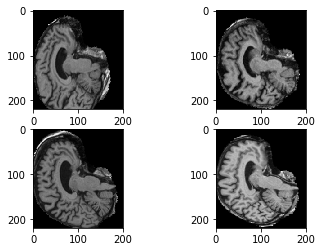

In [113]:
plt.figure(figsize=(20,8))
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(img[0][80,:,:], cmap='gray')
axs[0, 1].imshow(img[1][80,:,:], cmap='gray')
axs[1, 0].imshow(img[3][80,:,:], cmap='gray')
axs[1, 1].imshow(img[4][80,:,:], cmap='gray')


In [117]:
labels

tensor([[0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.]])